# **Trabajo de Fin de Grado**
## **Predicción del Precio del Oro mediante Modelos de Aprendizaje Automático**

**Autor:** Sebastián Malbaceda Leyva
**Tutor:** Alberto Rubio
**Grado en Ingeniería Informática – Universitat Autònoma de Barcelona**
**Campus Bellaterra, Septiembre 2025**

---

## **Descripción General del Proyecto**

El presente **Trabajo de Fin de Grado (TFG)** tiene como propósito el diseño e implementación de un **sistema predictivo del precio del oro a corto plazo**, empleando técnicas de **Machine Learning (ML)** y **análisis de series temporales**.

El proyecto se enmarca en la línea de *modelización financiera* y análisis cuantitativo de activos, buscando **comparar la eficacia de distintos modelos predictivos** —lineales, basados en árboles y estadísticos clásicos— para determinar su viabilidad, precisión y robustez en el contexto del mercado del oro.

Históricamente, el oro ha sido considerado un **activo refugio**, especialmente en períodos de inestabilidad económica o política. Sin embargo, su valor está condicionado por una gran cantidad de factores interrelacionados, como la **política monetaria**, las **expectativas de inflación**, la **fortaleza del dólar estadounidense**, el **comportamiento de los mercados bursátiles** y los **indicadores de riesgo global**.

Predecir su precio representa, por tanto, un reto de gran complejidad analítica:
- Es un activo **altamente volátil**, afectado por variables de distinta naturaleza y frecuencia temporal.
- Combina **movimientos especulativos de corto plazo** con **factores macroeconómicos estructurales**.
- Requiere integrar datos **heterogéneos y multiescalares** (diarios, mensuales, anuales).

Este TFG busca abordar esa complejidad construyendo un pipeline reproducible de *Machine Learning* que permita **capturar relaciones causales y patrones dinámicos**, generando una herramienta predictiva aplicable a la toma de decisiones en el ámbito financiero.

---

## **Estructura del Proyecto**

El desarrollo del proyecto se organiza en siete etapas principales:

1. **Definición del problema y recopilación de datos.**
2. **Preprocesamiento y armonización temporal de las series.**
3. **Análisis exploratorio (EDA) y selección de características.**
4. **Ingeniería de características (Feature Engineering).**
5. **Entrenamiento de modelos predictivos.**
6. **Evaluación y validación temporal.**
7. **Interpretabilidad de resultados y conclusiones.**

---

# **1) Definición del Problema y Datos**

---

## **Contexto del Problema**

El objetivo principal de este trabajo es **predecir el precio spot del oro (XAU/USD)** utilizando técnicas de *Machine Learning* y *series temporales multivariadas*.
El sistema propuesto debe ser capaz de **estimar movimientos futuros del oro a corto plazo**, integrando información de los mercados financieros, variables macroeconómicas y factores de sentimiento global.

El precio del oro se ve afectado por una amplia gama de determinantes:

- **Política monetaria y tasas de interés** (FED Funds Rate, rendimientos de bonos).
- **Índice del dólar (DXY)** y otros tipos de cambio.
- **Indicadores bursátiles** (S&P 500, VIX, índices de commodities).
- **Variables macroeconómicas** (PIB, inflación, desempleo, oferta monetaria).
- **Flujos de inversión** en ETFs y posiciones en futuros (CFTC, SPDR Gold Shares).
- **Riesgo e incertidumbre geopolítica** (EPU, GPR).
- **Factores sociales y de comportamiento** (Google Trends, confianza del consumidor).

Por la naturaleza del activo, el proyecto se clasifica como un **problema de regresión de series temporales**, donde el objetivo es predecir un valor numérico continuo en función de un conjunto amplio de variables históricas y exógenas.

---

## **Datos Utilizados**

Durante la fase inicial se recolectaron **59 variables candidatas válidas más el target**, verificadas y documentadas, provenientes de fuentes oficiales y plataformas financieras reconocidas.
Estas variables representan una visión completa del entorno económico, financiero y de mercado del oro.

### Principales categorías y ejemplos de variables

| Categoría | Ejemplos de Variables | Fuente | Frecuencia |
|------------|----------------------|---------|-------------|
| **Precio del Oro (Target)** | Oro spot (XAU/USD), Oro futuros (GCZ5) | Investing.com | Diaria |
| **Metales Preciosos** | Plata (XAG/USD), Platino (XPT/USD), Paladio (XPD/USD), Cobre (PCOPPUSDM) | FRED / Investing | Diaria / Mensual |
| **Índices Financieros** | S&P 500, DXY, VIX, CRB, Bloomberg Commodity Index | FRED / Investing | Diaria |
| **Energía y Materias Primas** | WTI, Brent (spot y futuros) | FRED / Investing | Diaria |
| **Macroeconomía** | Inflación (CPI), PIB, M2, Producción Industrial, Desempleo, Ventas minoristas | FRED | Mensual / Trimestral |
| **Bonos y Tasas de Interés** | DGS2, DGS10, T10YIE, DFII10 (TIPS), Credit Spread | FRED | Diaria |
| **Riesgo Global** | EPU, GPR, Financial Stress Index | policyuncertainty.com / Matteo Iacoviello / FRED | Diaria / Semanal |
| **Sentimiento del Consumidor** | UMCSENT, CCI, Google Trends “Gold” | FRED / OECD / Google Trends | Mensual |
| **Flujos e Inversión** | ETF holdings (GLD), posiciones CFTC, balance de la FED | SPDR / CFTC / FRED | Diaria / Semanal |
| **Divisas y Criptoactivos** | USD/CNY, EUR/USD, USD/JPY, Bitcoin | Investing / FRED | Diaria |

El conjunto final se organiza en tres niveles de frecuencia:
- **41 variables diarias**
- **2 variables semanales**
- **14 variable mensuales**
- **1 variable trimestral**
- **2 variable anual (déficit fiscal)**

---

## **Preprocesamiento de los Datos**

Dada la naturaleza heterogénea de las fuentes, fue necesario aplicar un proceso de **armonización temporal, imputación y normalización** antes del análisis exploratorio y modelado.

### Pasos principales

1. **Conversión de frecuencias:**
   Todas las series se alinearon en una misma escala temporal (diaria), manteniendo la coherencia temporal mediante:
   - *Forward-fill* para series diarias.
   - *Interpolación lineal* o spline para series mensuales, trimestrales y anuales.

2. **Tratamiento de valores faltantes:**
   Aplicación de métodos de imputación dependientes de la naturaleza de cada serie, y creación de indicadores binarios en casos relevantes (*missingness informative*).

3. **Normalización y escalado:**
   Uso de `StandardScaler` y complementariamente `RobustScaler` para asegurar comparabilidad entre magnitudes.

4. **Control de colinealidad:**
   Evaluación mediante correlaciones de Pearson/Spearman y **Variance Inflation Factor (VIF)**, eliminando redundancias o combinando variables. Se aplicarán algoritmos estrategicos para mitigar la redundancia de caracteristicas en el feature.

5. **Homogeneización de unidades y formatos:**
   Conversión de todas las magnitudes a dólares estadounidenses (USD) y ajuste de porcentajes, rendimientos y tasas si son necesarios.

6. **Consolidación final:**
   Obtención de un **dataset multivariado limpio, sincronizado y sin valores nulos**, preparado para el EDA y el modelado.

---

## **Objetivo del Modelo**

El objetivo del modelo es **predecir el precio spot del oro a corto plazo** (1–7 días), integrando variables históricas del propio oro y determinantes externos.
El enfoque busca capturar tanto relaciones lineales como no lineales y medir la influencia relativa de cada grupo de factores.

### Tipo de problema
- **Regresión supervisada multivariante de series temporales.**

### Variable objetivo (Target)
- `gold_spot` — precio spot del oro (USD/oz).

### Métricas de evaluación
- **MAE (Mean Absolute Error)**: magnitud media del error en unidades monetarias.
- **MSE (Mean Squared Error)**: promedio de los errores al cuadrado.
- **RMSE (Root Mean Squared Error)**: penaliza errores grandes.
- **MAPE (Mean Absolute Percentage Error)**: error medio en porcentaje.
- **R² (Coeficiente de determinación)**: porcentaje de varianza explicada.

### Validación
- **Cross-validation temporal (TimeSeriesSplit)** para evaluar el rendimiento a lo largo del tiempo, evitando *data leakage*.

---

## **Metodología General y Guía de Trabajo**

El pipeline metodológico adoptado sigue una estructura coherente con las mejores prácticas de la ciencia de datos moderna (según la *Guía Definitiva ML*):

---

1. **Obtención de datos** —
   Consolidación de fuentes externas (FRED, Investing, WGC, CFTC, SPDR), extracción de series heterogéneas (diarias, semanales, mensuales, anuales) y documentación de su procedencia, frecuencia, primer registro válido y posibles limitaciones.

---

2. **EDA (Análisis Exploratorio de Datos)** —
   Fase centrada en la **comprensión profunda de los datos**, identificando patrones, relaciones y problemas estructurales del dataset. Se enfoca en análisis, visualización y diagnóstico, no en transformación definitiva.

   Incluye:
   - **Análisis descriptivo inicial:** medias, cuantiles, dispersión, rangos, asimetría y curtosis.
   - **Visualización de series temporales:** comportamiento del oro y features clave; identificación de tendencias, cambios de régimen, estacionalidad y shocks macroeconómicos.
   - **Distribución y outliers:** histogramas, boxplots, densidades y detección de valores atípicos.
   - **Diagnóstico temporal:** ACF/PACF del target y de variables relevantes.
   - **Relaciones entre variables:**
        - Matrices de **correlación Pearson/Spearman** completas.
        - Gráficos de dispersión entre el target y features significativas.
        - Ranking de correlaciones con el target (Top 15).
   - **Redundancia exploratoria:** Detección inicial de grupos de variables fuertemente correlacionadas.
   - **PCA exploratorio:** Scree plot, carga de cada feature en los componentes principales y varianza explicada.
   - **Multicolinealidad preliminar:** Cálculo exploratorio de VIF (sin identificar todavía la solución).
   - **Heatmaps de missingness:** visualización de huecos por variable y período.

   **Nota:** Para el EDA se usa un preprocesamiento simple (imputación `ffill` + `bfill`, escalado estándar) **solo con fines exploratorios**. Esto permite calcular correlaciones, PCA y métricas multivariantes sin NaNs. Este dataset NO se utiliza para entrenamiento de modelos ni validación.

---

3. **Preprocesamiento** —
   Conjunto de transformaciones técnicas aplicadas al dataset antes del modelado formal. A diferencia del EDA, aquí las decisiones afectan al pipeline final.

   Incluye:
   - **Alineación temporal:** homogeneizar frecuencias (diaria) respetando la naturaleza de cada serie.
   - **Imputación controlada:**
       - `ffill`: adecuado para variables macro de baja frecuencia que se mantienen constantes hasta su actualización.
       - `bfill` (limitado y justificado): se utiliza únicamente para cubrir huecos iniciales de variables que comienzan tarde; nunca se aplicará en el pipeline de modelado.
   - **Recorte temporal:**
       - Selección de un año de inicio consistente basado en el primer registro robusto del target y de variables clave (como `geopolitical_risk`).
       - Mitigación de la disparidad de fechas de inicio entre series.
   - **Eliminación de valores no numéricos, duplicados y filas inválidas.**
   - **Normalización y escalado** (StandardScaler o RobustScaler) para asegurar comparabilidad entre magnitudes.
   - **Verificación antes del modelado:** dataset final sin NaNs, orden cronológico, coherencia de unidades.

   Este preprocesamiento se integrará más adelante dentro de un `Pipeline` para evitar cualquier fuga de información (*data leakage*).

---

4. **Selección de características** —
   Combinación sistemática de métodos univariados y multivariados para reducir dimensionalidad, eliminar redundancia y seleccionar las variables más informativas:
   - Reducción de dimensionalidad con PCA (fase exploratoria).
   - Correlaciones (Pearson/Spearman).
   - Información Mutua y F-test (relaciones no lineales y dependencias estadísticas).
   - Cálculo de VIF para diagnosticar multicolinealidad.
   - Algoritmos de control de redundancia (clustering de features + selección de representantes).
   - Diagnóstico temporal (estabilidad por períodos).
   - Evaluación preliminar con modelos (importancias de RandomForest, XGBoost y coeficientes lineales).
   - Integración final de datos y selección del subconjunto óptimo.

---

5. **Feature Engineering temporal** —
   Creación de variables derivadas directamente explotando estructura temporal y económica:
   - Lags del target y de las variables exógenas.
   - Medias móviles (SMA, EMA), volatilidades, retornos logarítmicos.
   - Control de redundancia de características derivadas.
   - Variables estacionales (día del mes, mes del año, trimestre).
   - Indicadores técnicos derivados (RSI, MACD, spreads como la curva 10Y−2Y).

---

6. **Modelado** —
   Comparación sistemática de modelos:
   - *Lineales:* Regresión, Ridge, Lasso.
   - *Basados en árboles:* RandomForest, XGBoost, LightGBM, CatBoost.
   - *Series temporales:* ARIMA, SARIMA como benchmarks clásicos.

---

7. **Evaluación, metric selection, model selection y validación temporal** —
   Incluye:
   - MSE, RMSE, MAE.
   - R² y métricas direccionales (Hit Ratio).
   - Validación temporal robusta: Walk-forward, TimeSeriesSplit.
   - Selección de hiperparámetros basada en búsqueda aleatoria con validación anidada.

---

8. **Interpretabilidad** —
   Incluye:
   - SHAP values.
   - Permutation importance.
   - Análisis de sensibilidad y estabilidad temporal.

---

9. **Análisis final** —
   Incluye:
   - Comparación consolidada de modelos.
   - Identificación de drivers del precio del oro.
   - Discusión económica de los resultados.
   - Conclusiones, limitaciones y recomendaciones finales.

---

## **Fuentes de los Datos**

| Fuente | Descripción | Enlace |
|--------|--------------|--------|
| FRED (Federal Reserve Economic Data) | Datos macroeconómicos y financieros (PIB, inflación, tasas, producción industrial, empleo). | https://fred.stlouisfed.org |
| Investing.com | Precios spot y futuros de metales, índices, commodities y divisas. | https://www.investing.com |
| World Gold Council (WGC) | Datos estructurales sobre demanda, reservas y oferta de oro. | https://www.gold.org |
| CFTC (Commitments of Traders Reports) | Posiciones netas de traders en los mercados de futuros. | https://www.cftc.gov/MarketReports |
| SPDR Gold Shares (ETF GLD) | Flujos de ETFs respaldados por oro físico. | https://www.spdrgoldshares.com |
| Economic Policy Uncertainty Index (EPU) | Nivel de incertidumbre económica global. | https://www.policyuncertainty.com |
| Geopolitical Risk Index (GPR) | Medición del riesgo geopolítico mundial. | https://www.matteoiacoviello.com/gpr.htm |
| Google Trends | Interés de búsqueda del término “Gold”. | https://trends.google.com |

---

## **Conclusión del Punto 1**

En este primer bloque se ha establecido el **contexto, los objetivos y la base de datos del proyecto**.
El oro, como activo multifactorial, requiere un tratamiento analítico riguroso y la integración de fuentes heterogéneas de información.
El conjunto de datos recolectado y preprocesado constituirá el punto de partida para el **Análisis Exploratorio de Datos (EDA)**, donde se identificarán patrones, correlaciones y variables clave antes del entrenamiento de los modelos predictivos.


In [300]:
# =========================
# Imports básicos
# =========================
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression, f_regression, RFECV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from statsmodels.tsa.stattools import adfuller
from sklearn.base import clone
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import missingno as msno
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


In [301]:
# -------------------------
# CONFIG
# -------------------------
DATASET_PATH = "../data/dataset.csv"
TARGET = "gold_spot"
DATE_COL = "date"
OUTPUT_DIR = "stage1_outputs"

PCA_VARIANCE_THRESHOLD = 0.95
RF_RANDOM_STATE = 1
START_YEAR = 2000
RFE_STEP = 0.1
TS_FOLDS = TimeSeriesSplit(n_splits=5, gap=5)

os.makedirs(OUTPUT_DIR, exist_ok=True)


In [302]:
# -------------------------
# Frecuencia de features
# -------------------------
daily = [
    "gold_spot", "gold_futures", "us10y_yield", "us10y_breakeven", "us2y_yield",
    "dxy_index", "dxy_future", "sp500_index", "sp500_futures", "vix_index",
    "vix_futures", "wti_spot", "wti_futures", "brent_spot", "brent_futures",
    "silver_spot", "silver_futures", "copper_futures", "commodities_crb",
    "commodities_bloomberg", "cftc_gold_positions", "etf_gold_flows",
    "policy_uncertainty", "usdcny_exchange", "us10y_tips", "credit_spread",
    "gold_volatility_gvz", "ovx_index", "gdx_index", "comex_micro_gold",
    "geopolitical_risk", "platinum_spot", "platinum_futures", "palladium_spot",
    "palladium_futures", "bitcoin_price", "comex_inventories", "eurusd_exchange",
    "usdjpy_exchange", "usdinr_exchange", "move_index"
]

weekly = [
    "fed_balance_walcl", "us_financial_stress_index"
]
monthly = [
    "fed_funds", "copper_spot", "us_cpi", "us_m2", "us_industrial_production",
    "us_retail_sales", "us_unemployment", "us_consumer_sentiment",
    "fx_reserves_china", "consumer_confidence",
    "google_trends_gold_element", "google_trends_gold_word", "export_price_index",
    "us_personal_saving_rate", "us_pmi_manufacturing"
]
quarterly = [
    "us_gdp"
]
annual = [
    "us_fiscal_deficit", "us10y_real"
]

# **2) EDA — Análisis Exploratorio de Datos**

En este bloque realizaremos las comprobaciones iniciales del dataset: carga, descripción básica, análisis de missingness, visualización de la serie objetivo, diagnósticos temporales (ACF/PACF), correlaciones (Pearson/Spearman), PCA exploratorio y un análisis preliminar de multicolinealidad (VIF).

**Nota:** Para facilitar cálculos multivariantes en EDA usaremos una versión imputada y escalada del dataset (solo para exploración). El pipeline de modelado aplicará imputaciones anidadas dentro de `Pipeline` para evitar data leakage.

## 2.1) Carga y comprobaciones iniciales del dataset

Antes de comenzar cualquier análisis exploratorio, es necesario cargar el dataset completo y verificar su estructura básica.

En esta celda realizamos:

- La **lectura del archivo CSV** con la columna de fechas correctamente parseada.
- La **ordenación cronológica** de los registros.
- La inspección del número de filas y columnas y las primeras observaciones del dataset
- Identificación del rango temporal total cubierto
- Recuento del número de características disponibles.

El objetivo de este paso es tener una primera visión general del dataset, identificar posibles problemas obvios (como valores nulos extensivos al inicio) y confirmar que los datos han sido cargados correctamente antes de avanzar con el EDA.


In [303]:
# -------------------------
# 1) Cargar dataset y vista rápida
# -------------------------
df = pd.read_csv(DATASET_PATH, parse_dates=[DATE_COL])
df = df.sort_values(DATE_COL).reset_index(drop=True)

# columnas y tipos
print("Filas, columnas:", df.shape)
print("Primeras filas:")
display(df.head(5))

# rango temporal
first_date = df[DATE_COL].min()
last_date = df[DATE_COL].max()
print(f"Rango temporal: {first_date.date()}  —  {last_date.date()}")

# lista de features (excluyendo fecha y target)
features = [c for c in df.columns if c not in [DATE_COL, TARGET]]
print("Número de features detectadas:", len(features))


Filas, columnas: (45368, 61)
Primeras filas:


,date,gold_spot,us10y_yield,policy_uncertainty,geopolitical_risk,usdjpy_exchange,silver_futures,eurusd_exchange,gold_futures,us2y_yield,...,consumer_confidence,fx_reserves_china,us10y_real,copper_spot,export_price_index,us_retail_sales,us_gdp,google_trends_gold_element,google_trends_gold_word,us_fiscal_deficit
0,1901-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0
1,1901-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1901-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rango temporal: 1901-06-30  —  2025-09-14
Número de features detectadas: 59


In [304]:
df_init = pd.read_csv(DATASET_PATH, parse_dates=[DATE_COL])
df_init = df.sort_values(DATE_COL).reset_index(drop=True)

Los primeros valores mostrados indican lo siguiente:

### Dimensiones del dataset
El dataset contiene **45.368 filas y 61 columnas**, lo cual confirma que se trata de una serie temporal extensa con un número considerable de variables exógenas (59 features + fecha + target).

### Primeras filas
Las primeras observaciones (año 1901) aparecen prácticamente **completamente vacías**, con la mayoría de columnas en `NaN`.
Esto es coherente con la naturaleza del dataset, ya que muchas de las variables incluidas (índices financieros, tasas de interés modernas, indicadores macroeconómicos recientes, etc.) no existían en esa época.

Por tanto, **es normal que las primeras décadas tengan un volumen muy alto de valores faltantes**.

### Rango temporal
El dataset cubre un periodo muy amplio:
**1901-06-30 → 2025-09-14**

Aunque es útil disponer de un rango largo, esta primera inspección sugiere que **gran parte del tramo inicial no contiene información aprovechable**, por lo que más adelante será necesario elegir un punto de inicio más razonable para el análisis.

### Número de features
Se han detectado **59 variables exógenas**, confirmando la naturaleza multivariada del dataset.


## 2.2) Estadísticas descriptivas y análisis inicial de missingness por variable

Una vez cargado el dataset y verificada su estructura general, el siguiente paso del EDA consiste en generar un **resumen numérico básico de cada variable**.

Este análisis nos permite cuantificar:

- cuántos valores faltantes tiene cada feature
- el porcentaje de `NaN` por columna
- estadísticas simples como media, desviación estándar, mínimo y máximo
- características con poca variabilidad o prácticamente vacías
- el orden de las variables según su nivel de missingness.

El propósito es obtener una primera muestra de la calidad del dataset y entender qué variables empiezan demasiado tarde, cuáles están completas durante más tiempo y cuáles podrían requerir un tratamiento especial más adelante.

Además, exportamos estos resultados a `feature_stats.csv` para mantener trazabilidad y facilitar el análisis reproducible en etapas posteriores del proyecto.


In [305]:
# -------------------------
# 2) Estadísticas descriptivas y missingness por feature
# -------------------------
stats = []
for c in df.columns:
    if c == DATE_COL:
        continue
    s = df[c]
    is_num = pd.api.types.is_numeric_dtype(s)
    has_vals = is_num and s.dropna().size > 0
    std_val = float(s.dropna().std()) if has_vals else np.nan
    stats.append({
        "feature": c,
        "count": int(s.size),
        "n_missing": int(s.isna().sum()),
        "pct_missing": float(s.isna().mean()),
        "n_unique": int(s.nunique(dropna=True)),
        "mean": float(s.dropna().mean()) if has_vals else np.nan,
        "std": std_val,
        "variance": float(std_val**2) if has_vals else np.nan,
        "min": float(s.dropna().min()) if has_vals else np.nan,
        "max": float(s.dropna().max()) if has_vals else np.nan,
    })
feature_stats = pd.DataFrame(stats).sort_values("pct_missing", ascending=False)
feature_stats.to_csv(os.path.join(OUTPUT_DIR, "feature_stats.csv"), index=False)
display(feature_stats.head(20))

print("feature_stats guardado en:", os.path.join(OUTPUT_DIR, "eda", "feature_stats.csv"))


,feature,count,n_missing,pct_missing,n_unique,mean,std,variance,min,max
59,us_fiscal_deficit,45368,45244,0.997267,122,-2.082639e+05,5.061468e+05,2.561846e+11,-3.132456e+06,2.362410e+05
57,google_trends_gold_element,45368,45107,0.994247,67,4.299234e+01,2.060993e+01,4.247692e+02,1.700000e+01,1.000000e+02
58,google_trends_gold_word,45368,45107,0.994247,55,5.675862e+01,1.407832e+01,1.981992e+02,3.600000e+01,1.000000e+02
56,us_gdp,45368,45054,0.993079,314,7.596131e+03,7.960530e+03,6.337004e+07,2.431640e+02,3.035390e+04
55,us_retail_sales,45368,44965,0.991117,403,3.354358e+05,1.307193e+05,1.708753e+10,1.267170e+05,6.913120e+05
54,export_price_index,45368,44951,0.990808,258,3.667506e+01,2.567283e+01,6.590940e+02,9.900000e+00,1.297000e+02
53,copper_spot,45368,44942,0.990610,424,4.951260e+03,2.762986e+03,7.634090e+06,1.377376e+03,1.023089e+04
52,us10y_real,45368,44843,0.988428,525,2.418510e+00,1.824712e+00,3.329573e+00,-4.071340e-01,7.656648e+00
51,fx_reserves_china,45368,44817,0.987855,551,1.303053e+06,1.477027e+06,2.181610e+12,1.557000e+03,4.010834e+06
50,consumer_confidence,45368,44736,0.986069,624,1.001809e+02,1.147715e+00,1.317250e+00,9.668452e+01,1.023296e+02


feature_stats guardado en: stage1_outputs\eda\feature_stats.csv


El resumen generado en `feature_stats.csv` proporciona una visión clara del estado de cada una de las 59 variables exógenas.

Las observaciones más relevantes son:

### Porcentaje de valores faltantes
Muchas características presentan **niveles extremadamente altos de missingness**, en algunos casos cercanos al 100%.
Esto confirma lo observado previamente: la mayoría de series no tienen cobertura en las primeras décadas del dataset.

Este comportamiento es coherente con la naturaleza del conjunto de datos, ya que incluye:

- variables macroeconómicas que se publican mensualmente o trimestralmente
- indicadores modernos que no existían a principios del siglo XX
- series financieras que comenzaron a registrarse mucho más tarde.

Por lo tanto, el elevado porcentaje de NaNs en los primeros años **no representa un error**, sino una consecuencia directa de la diversidad temporal de las fuentes.

### Estadísticas básicas (media, desviación, min–max)
Para muchas variables, las estadísticas aparecen como `NaN` o con valores poco representativos.
Esto sucede cuando una columna tiene muy pocas observaciones válidas en este tramo inicial del dataset.

Más adelante, cuando recortemos el rango temporal a un período con mayor densidad de datos, estas estadísticas serán mucho más informativas.

### Ranking ordenado por `pct_missing`
El hecho de poder ordenar las variables según su nivel de missingness permite:

- identificar features que comienzan extremadamente tarde
- detectar series casi vacías que pueden descartarse en fases posteriores
- visualizar de manera sistemática qué variables son más “problemáticas”

### Archivo exportado
El archivo generado: stage1_outputs/eda/feature_stats.csv quedará como referencia para posteriores decisiones de preprocesamiento y selección de características.


## 2.3) Visualización del patrón de valores faltantes (missingness)

Tras analizar las estadísticas básicas de missingness, el siguiente paso consiste en representar
gráficamente la distribución de valores nulos a lo largo de todo el rango temporal del dataset.
Para ello utilizamos un **mapa binario (heatmap)** donde:

- **Blanco** representa datos disponibles
- **Negro** representa valores faltantes (`NaN`)

Este tipo de visualización es especialmente útil en series temporales multivariantes porque permite:

- identificar rápidamente periodos largos sin datos
- ver cómo cada variable “comienza” en fechas diferentes
- detectar huecos estructurales propios de series de baja frecuencia
  (mensuales, trimestrales, anuales)
- evaluar si existe una zona temporal en la que varias variables coinciden en disponibilidad
- decidir desde qué fecha tiene sentido comenzar el análisis formal

El objetivo de este paso es **comprender visualmente la densidad real de información del dataset**


Visualizando patrón de valores nulos...


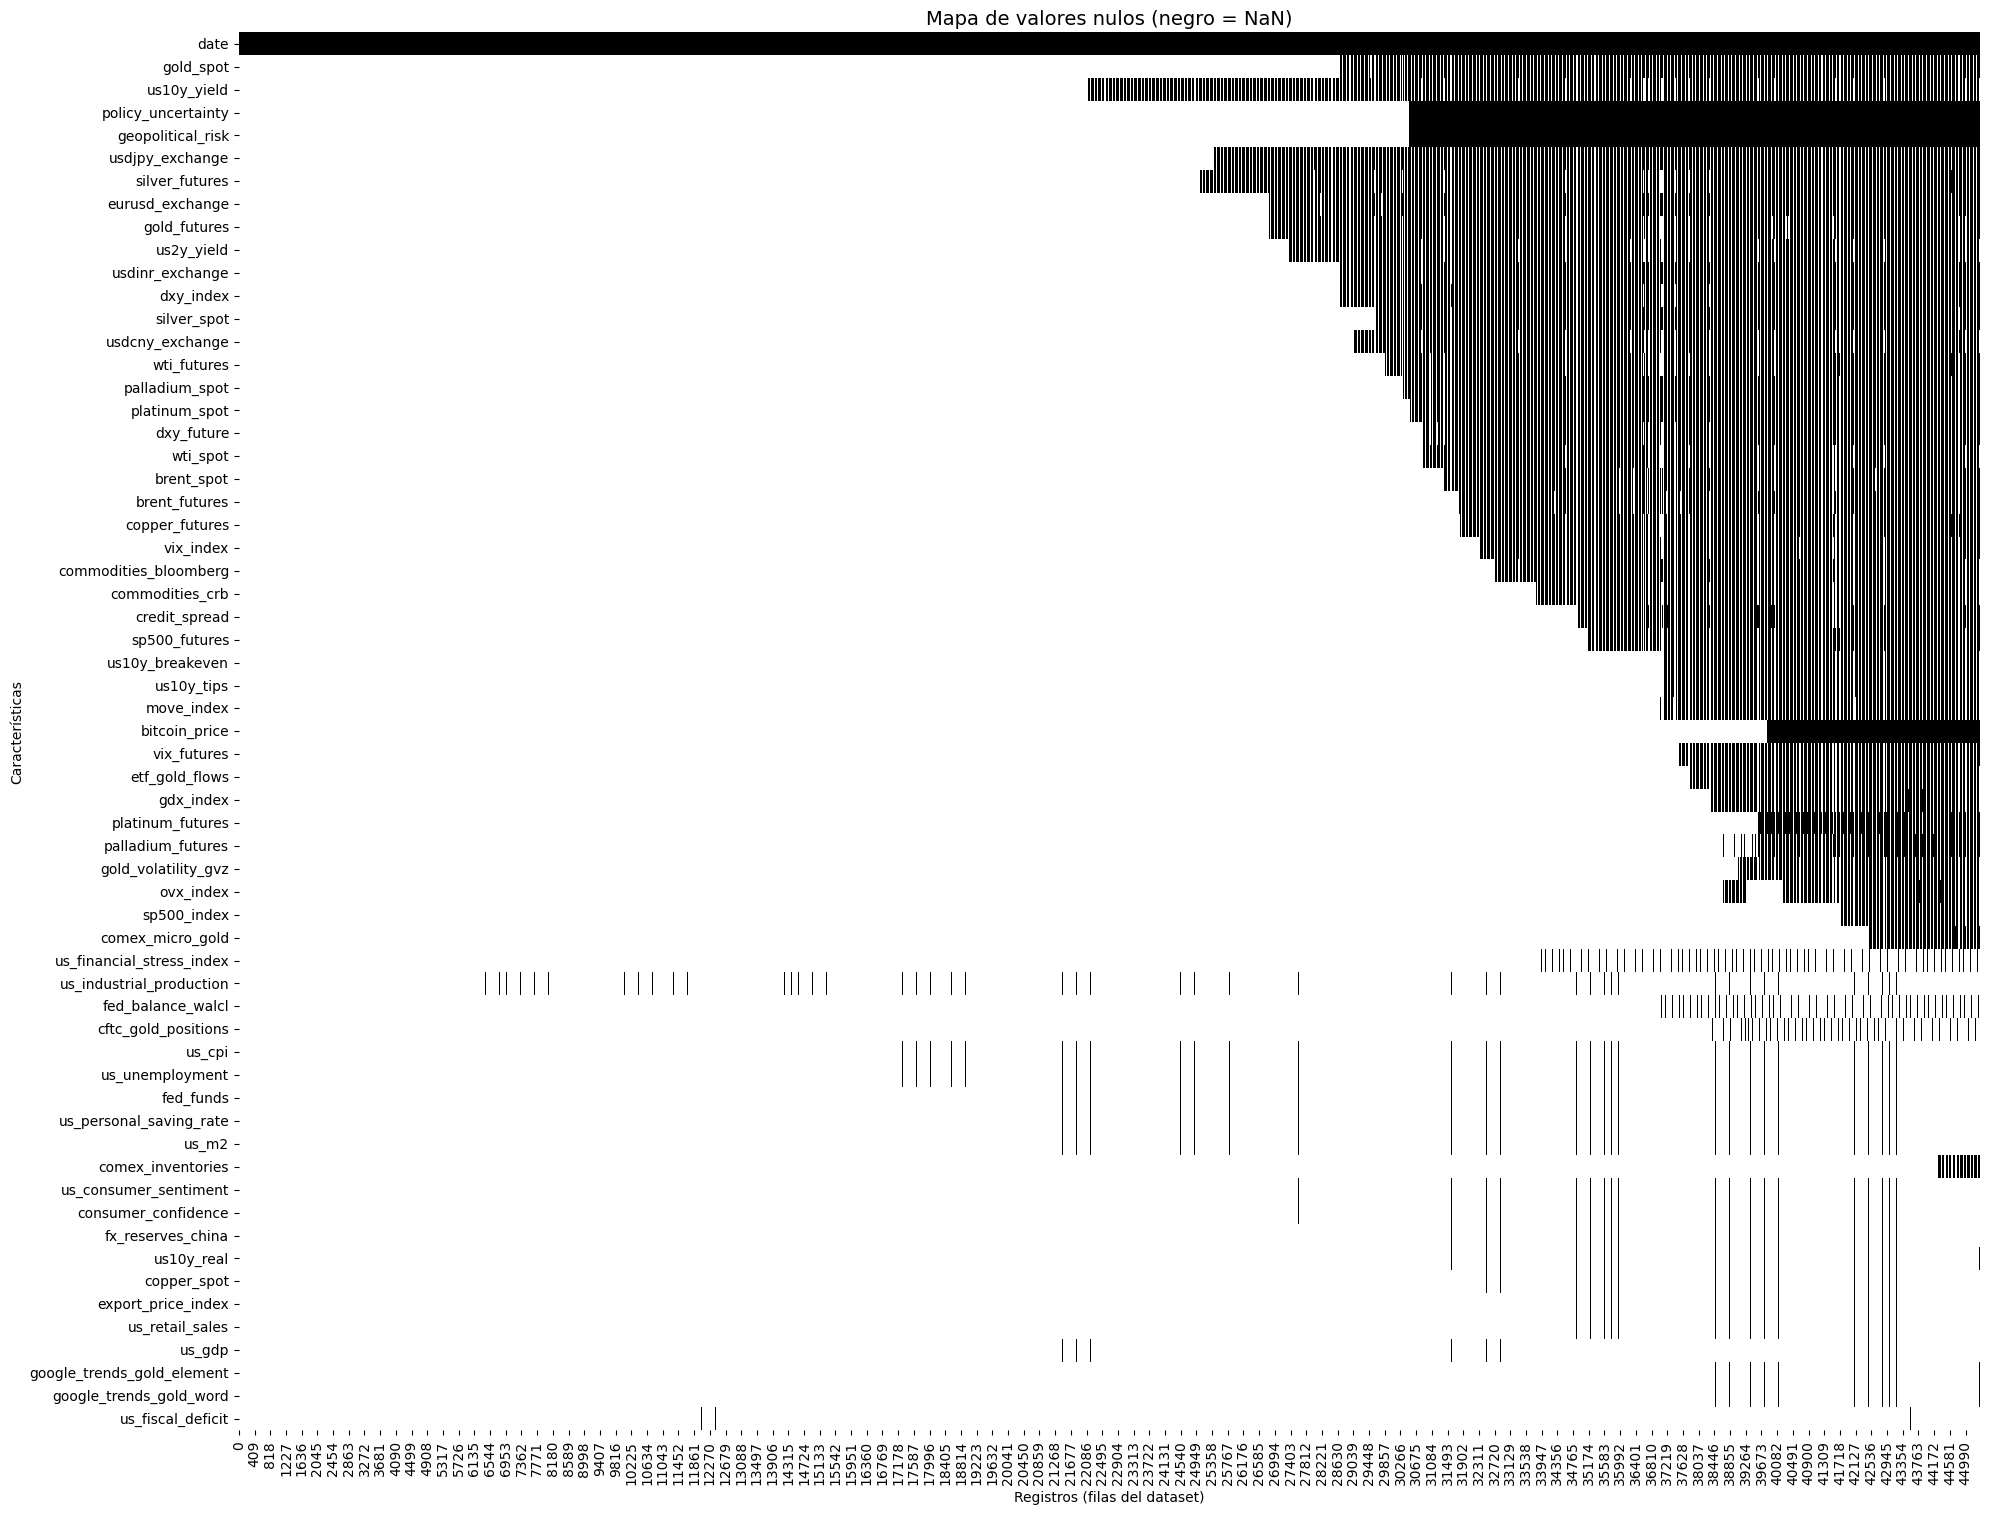

In [306]:
# -------------------------
# 2.1 Visualización directa de los valores nulos (mapa binario ancho)
# -------------------------
print("Visualizando patrón de valores nulos...")
null_mask = df.isnull().astype(int)
plt.figure(figsize=(20, max(6, len(df.columns) * 0.25)))
sns.heatmap(
    null_mask.T,
    cmap=["black", "white"],
    cbar=False
)
plt.title("Mapa de valores nulos (negro = NaN)", fontsize=14)
plt.xlabel("Registros (filas del dataset)")
plt.ylabel("Características")
plt.tight_layout()
plt.show()


El mapa binario confirma visualmente lo que ya sugerían las estadísticas previas sobre la disponibilidad del dataset.

### 1. Gran parte del tramo inicial está completamente vacío
La sección correspondiente a los primeros años aparece **casi totalmente negra**, indicando que **prácticamente ninguna variable contiene información útil** en ese periodo.
Este comportamiento es coherente con lo observado previamente y refleja la disparidad temporal en el inicio de cada serie.

### 2. La disponibilidad de datos mejora gradualmente con el tiempo
A medida que avanzan los años se observa un incremento progresivo de las zonas blancas (datos disponibles), aunque con ritmos diferentes según la variable, lo que pone de manifiesto la heterogeneidad temporal del conjunto de features.

### 3. La densidad de información se vuelve razonable en periodos más recientes
En una franja temporal más moderna se aprecia:
- mayor uniformidad entre variables
- una reducción significativa de `NaNs`
- y presencia simultánea de la mayoría de series

Este tramo será el candidato natural para acotar el análisis.

### 4. Implicación inmediata
El patrón observado refuerza la necesidad de seleccionar **un punto de inicio racional**, evitando periodos donde el target no está disponible y la mayoría de features aún no existen, lo que haría inviable cualquier análisis estadístico o multivariante.

---
A partir de esta primera inspección queda claro que las décadas iniciales contienen una cantidad sustancial de valores faltantes. Por ello, en el siguiente paso estableceremos un primer recorte temporal basándonos en **la primera fecha válida del target (`gold_spot`)**, que nos permitirá trabajar sobre un tramo más consistente del dataset antes de aplicar correlaciones, PCA o análisis multivariantes más avanzados.


## 2.4) Selección inicial del año de inicio basado en la disponibilidad del target

Tras visualizar el patrón de valores faltantes, hemos comprobado que las primeras décadas del
dataset están prácticamente vacías para la mayoría de variables.
Antes de definir un rango temporal adecuado, debemos asegurarnos de que la **variable objetivo**
(`gold_spot`) tenga valores válidos.

El modelo no puede entrenarse ni evaluarse en periodos donde el target no exista, por lo que el
primer criterio mínimo y necesario es identificar:

> **¿En qué año aparece el primer valor válido del target?**

Una vez obtenido ese año, realizamos un recorte inicial del dataset, filtrando todas las filas
anteriores.
Este primer START_YEAR será un **punto de partida provisional**, que refinaremos más adelante cuando
analicemos la cobertura del resto de variables (preprocessing).


In [307]:
# -------------------------
# 2. Filtrar dataset desde el primer año con target disponible
# -------------------------
first_valid_year = df.loc[df[TARGET].notna(), DATE_COL].dt.year.min()
print(f"Primer año con valor válido de {TARGET}: {first_valid_year}")
START_YEAR = first_valid_year + 1 # más uno para completar lo que queda de año
df = df[df[DATE_COL].dt.year >= START_YEAR].reset_index(drop=True)
print(f"Dataset filtrado desde {START_YEAR}: {len(df)} filas")


Primer año con valor válido de gold_spot: 1979
Dataset filtrado desde 1980: 16694 filas


El resultado muestra que el **primer registro disponible de `gold_spot` aparece en el año 1979**.
Dado que los meses iniciales de ese año pueden contener valores aislados o incompletos, se decide
comenzar el análisis a partir de **1980**, garantizando así un año completo en el que el target
está bien definido.

### Efecto del recorte
Al filtrar el dataset desde 1980:

- se eliminan automáticamente décadas enteras sin información útil
- se descartan miles de filas completamente vacías
- se mantiene únicamente el tramo temporal en el que la variable objetivo está presente
- y se reduce el volumen de datos irrelevantes para el análisis

### Por qué este recorte es razonable
Este paso no define aún el rango final de estudio, pero constituye un **primer filtrado necesario**:

- No tiene sentido analizar correlaciones o aplicar PCA en periodos donde el target no existe.
- El recorte evita distorsiones causadas por décadas con 100% de NaNs.
- Permite concentrar el EDA en un tramo temporal donde al menos el objetivo es observable.

Más adelante, refinaremos aún más el START_YEAR seleccionando un **punto de inicio más homogéneo**
para las demás features, especialmente aquellas que comienzan en fechas más recientes.


## 2.4.1) Visualización del patrón de missingness tras el recorte inicial

Después de recortar el dataset para comenzar en 1980 (primer año en el que `gold_spot` está
disponible), es necesario volver a visualizar la distribución de valores faltantes.

El objetivo de este paso es comprobar:

- si el recorte ha reducido significativamente la cantidad de NaNs
- si las series comienzan en fechas similares
- o si todavía hay muchas variables que siguen comenzando demasiado tarde
- y evaluar si es necesario aplicar un recorte temporal más estricto para mejorar la cobertura

Para ello generamos nuevamente un ** mapa binario de missingness**, pero ahora aplicado al dataset
recortado.


Visualizando patrón de valores nulos tras el recorte inicial...


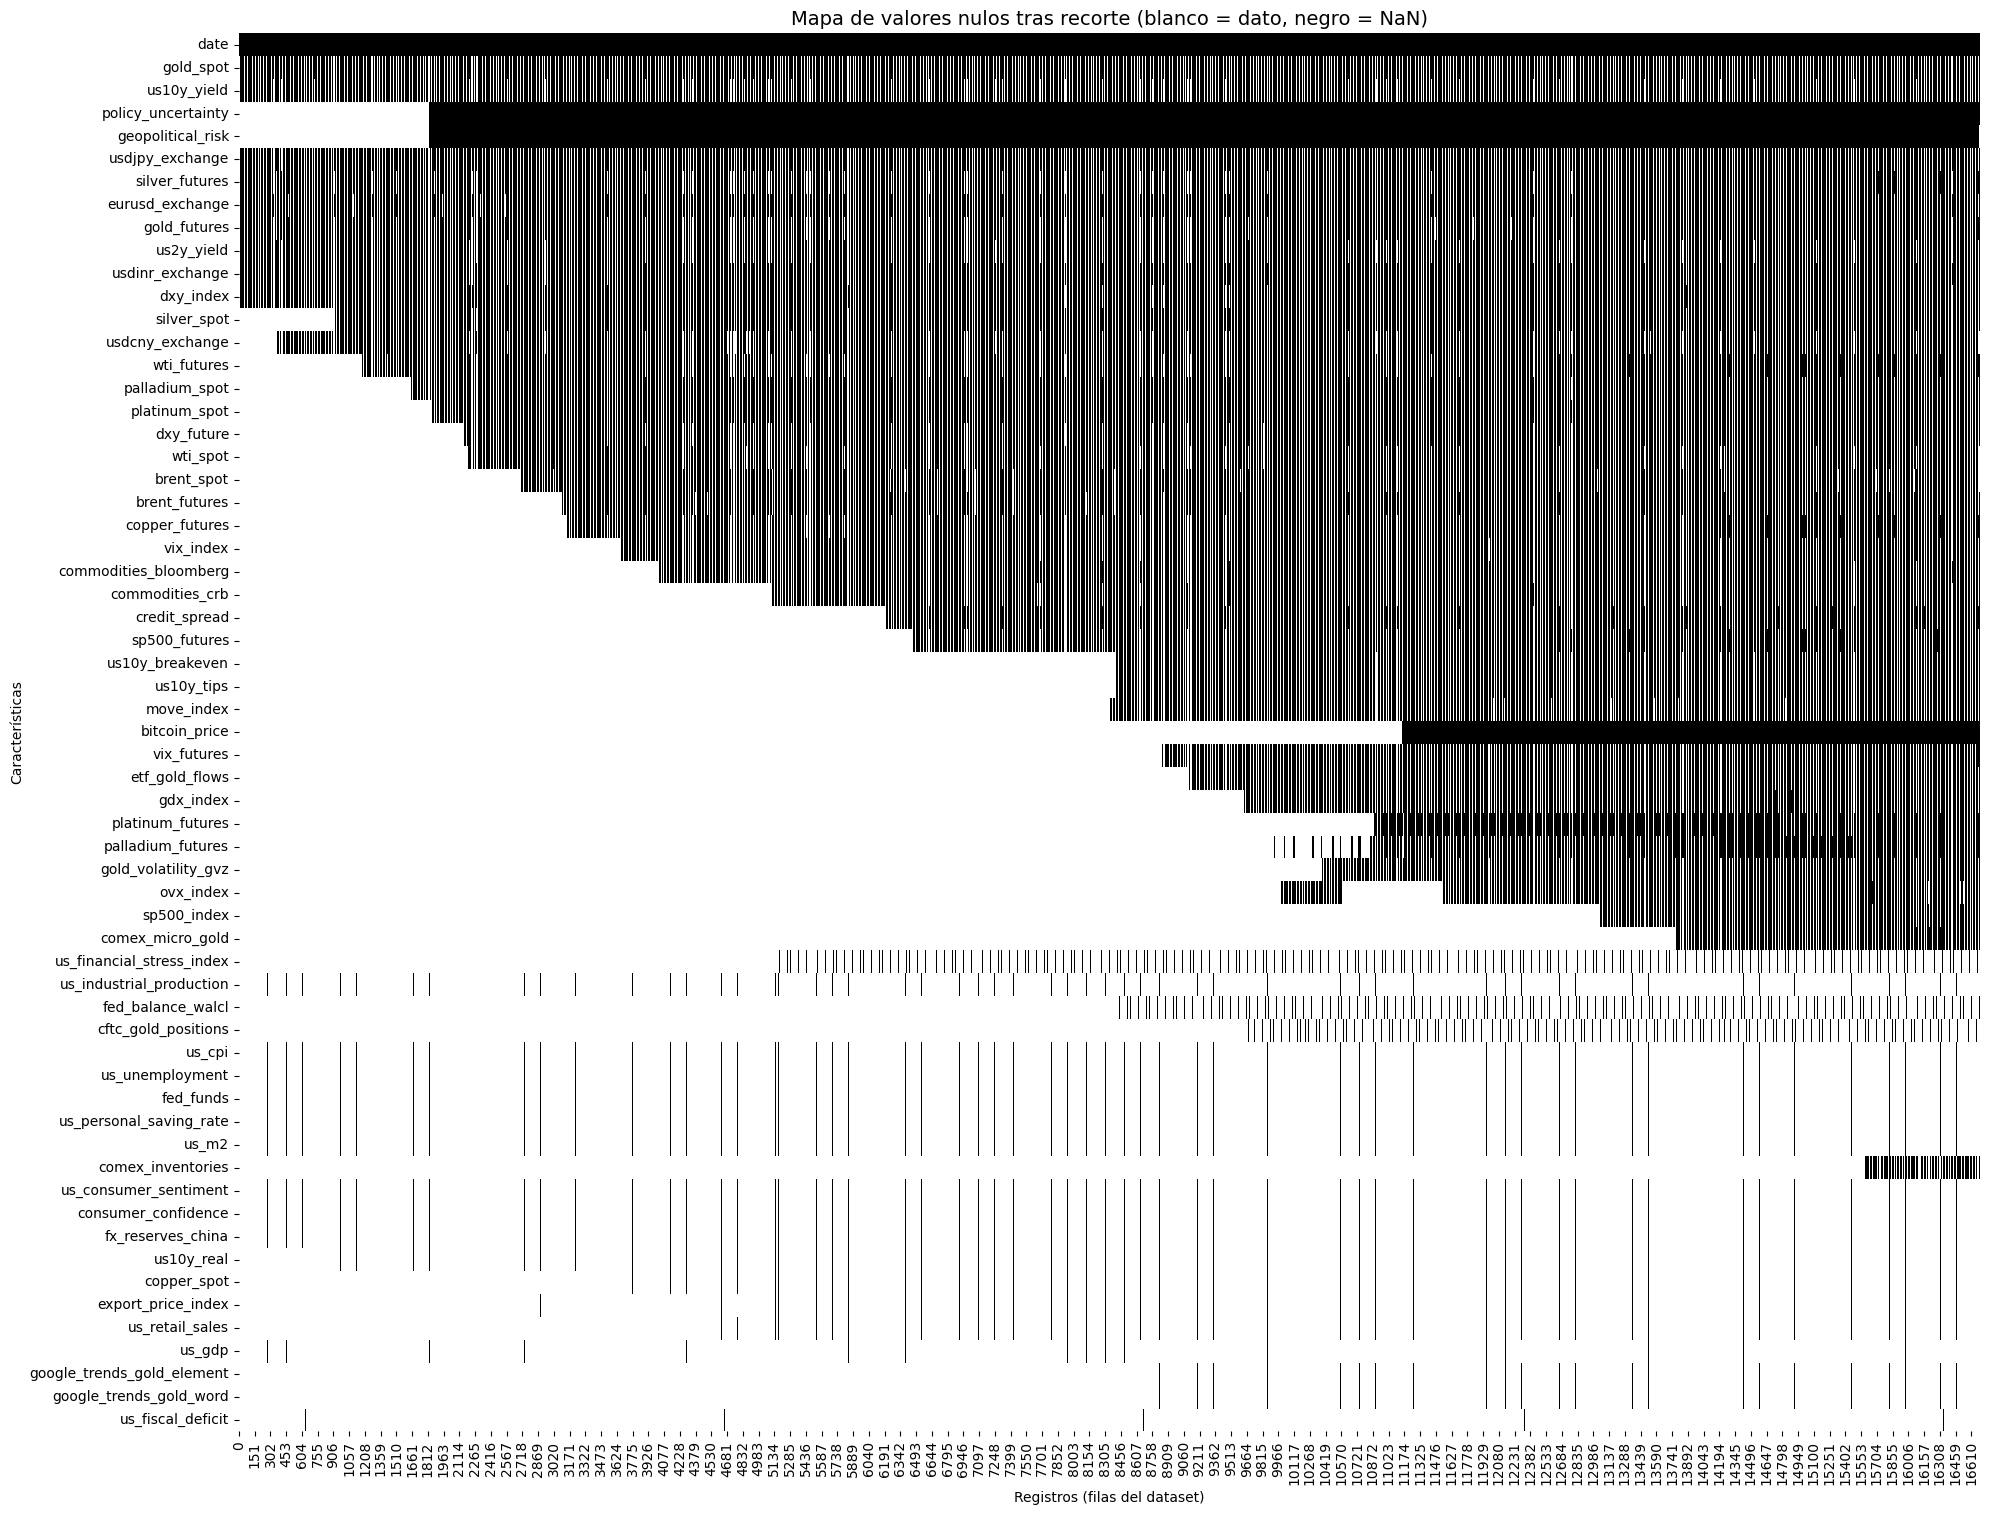

In [308]:
# -------------------------
# Visualización de missingness tras recorte inicial
# -------------------------
print("Visualizando patrón de valores nulos tras el recorte inicial...")

null_mask = df.isnull().astype(int)

plt.figure(figsize=(20, max(6, len(df.columns) * 0.25)))
sns.heatmap(
    null_mask.T,
    cmap=["black", "white"],
    cbar=False
)
plt.title("Mapa de valores nulos tras recorte (blanco = dato, negro = NaN)", fontsize=14)
plt.xlabel("Registros (filas del dataset)")
plt.ylabel("Características")
plt.tight_layout()
plt.show()


La visualización del patrón de missingness después de aplicar el primer recorte temporal confirma que
la eliminación de los años anteriores a 1980 mejora parcialmente la densidad del dataset, pero aún
se observan varios efectos importantes:

---

### 1. Las series financieras diarias comienzan pronto y muestran buena disponibilidad
Las variables más directamente relacionadas con mercados líquidos —como `gold_futures`, `us10y_yield`,
`sp500_index`, `dxy_index`, `silver_spot`, `wti_spot`, `vix_index`, etc.— aparecen mayoritariamente
en blanco a partir de la década de 1980, lo que indica que disponemos de:
- registros continuos
- frecuencia diaria estable
- y ausencia de huecos prolongados

Estas variables son candidatas sólidas para el análisis multivariante temprano.

---

### 2. Las series con frecuencia baja (mensual, trimestral, anual) aparecen en la parte inferior del gráfico
Las variables mensuales (CPI, M2, Retail Sales…), trimestrales (GDP) y anuales (déficit fiscal, tasas reales) siguen mostrando la estructura típica de su frecuencia: puntos espaciados en el tiempo.

Lo importante es que estas series también comienzan a ser consistentes a **partir de los años 80–90**, por lo que se integran razonablemente bien con el target tras el recorte.

---

### 3. Persisten variables que comienzan claramente más tarde
Una parte identificable del heatmap muestra columnas que permanecen negras durante un tramo prolongado,
lo cual indica que ciertas series:
- no existían antes de los años 2000–2010
- o comenzaron a registrarse mucho después (p. ej., Bitcoin, OVX, indicadores modernos de riesgo)

Esto confirma que aún existe una **segunda franja de ausencia estructural** que deberemos gestionar.

---

### 4. La cobertura general mejora, pero no es homogénea
Aunque la densidad global de datos tras el recorte es mucho más alta, se observa:

- heterogeneidad clara entre grupos de variables
- diferencias notables en la fecha de inicio de cada serie
- y solapamientos incompletos en los años 80 y 90

Esto sugiere que el dataset todavía no está en un rango ideal para aplicar técnicas multivariantes sin un tratamiento adicional.

---

### 5. Implicación práctica: el recorte a 1980 es razonable, pero no suficiente
La visualización muestra que empezar en 1980 garantiza la disponibilidad del target y de muchas
series diarias relevantes.

Sin embargo:

- todavía hay variables que no comienzan hasta mucho más tarde
- lo que introduce bloques de NaNs que no son imputables de manera realista
- y afectaría análisis como correlaciones, PCA o VIF

Por tanto, para obtener un dataset más “compacto y uniforme”, necesitaremos aplicar un **segundo recorte más estratégico** basado en una feature que actúe como punto de convergencia temporal de la mayoría de variables.




## 2.4.2) Visualización del comportamiento del target (`gold_spot`)

La inspección de la variable objetivo en el tiempo nos asiste en varias tareas críticas para la preparación y el enfoque del modelado:

- **Validación de la Serie Temporal**: Confirma visualmente que los datos son secuenciales y que el orden temporal es significativo, verificando la naturaleza del problema.

- **Identificación de Componentes Estructurales**: Nos ayuda a descomponer la serie de forma intuitiva. Permite detectar la presencia de una tendencia (crecimiento o decrecimiento a largo plazo) y la existencia de estacionalidad (patrones que se repiten en ciclos fijos).

- **Detección de Anomalías** y Puntos de : Facilita la localización de valores atípicos (outliers) o cambios estructurales abruptos (ej., el inicio de una crisis) que deben ser tratados, ya sea imputándolos o marcándolos con variables dummy.

- **Evaluación Preliminar de la Estacionariedad**: Es el primer indicador visual de si la serie es no estacionaria (es decir, si su media y varianza cambian con el tiempo). Esto nos orienta sobre la necesidad de aplicar diferenciación u otras transformaciones para estabilizar la serie antes de usar modelos tradicionales.

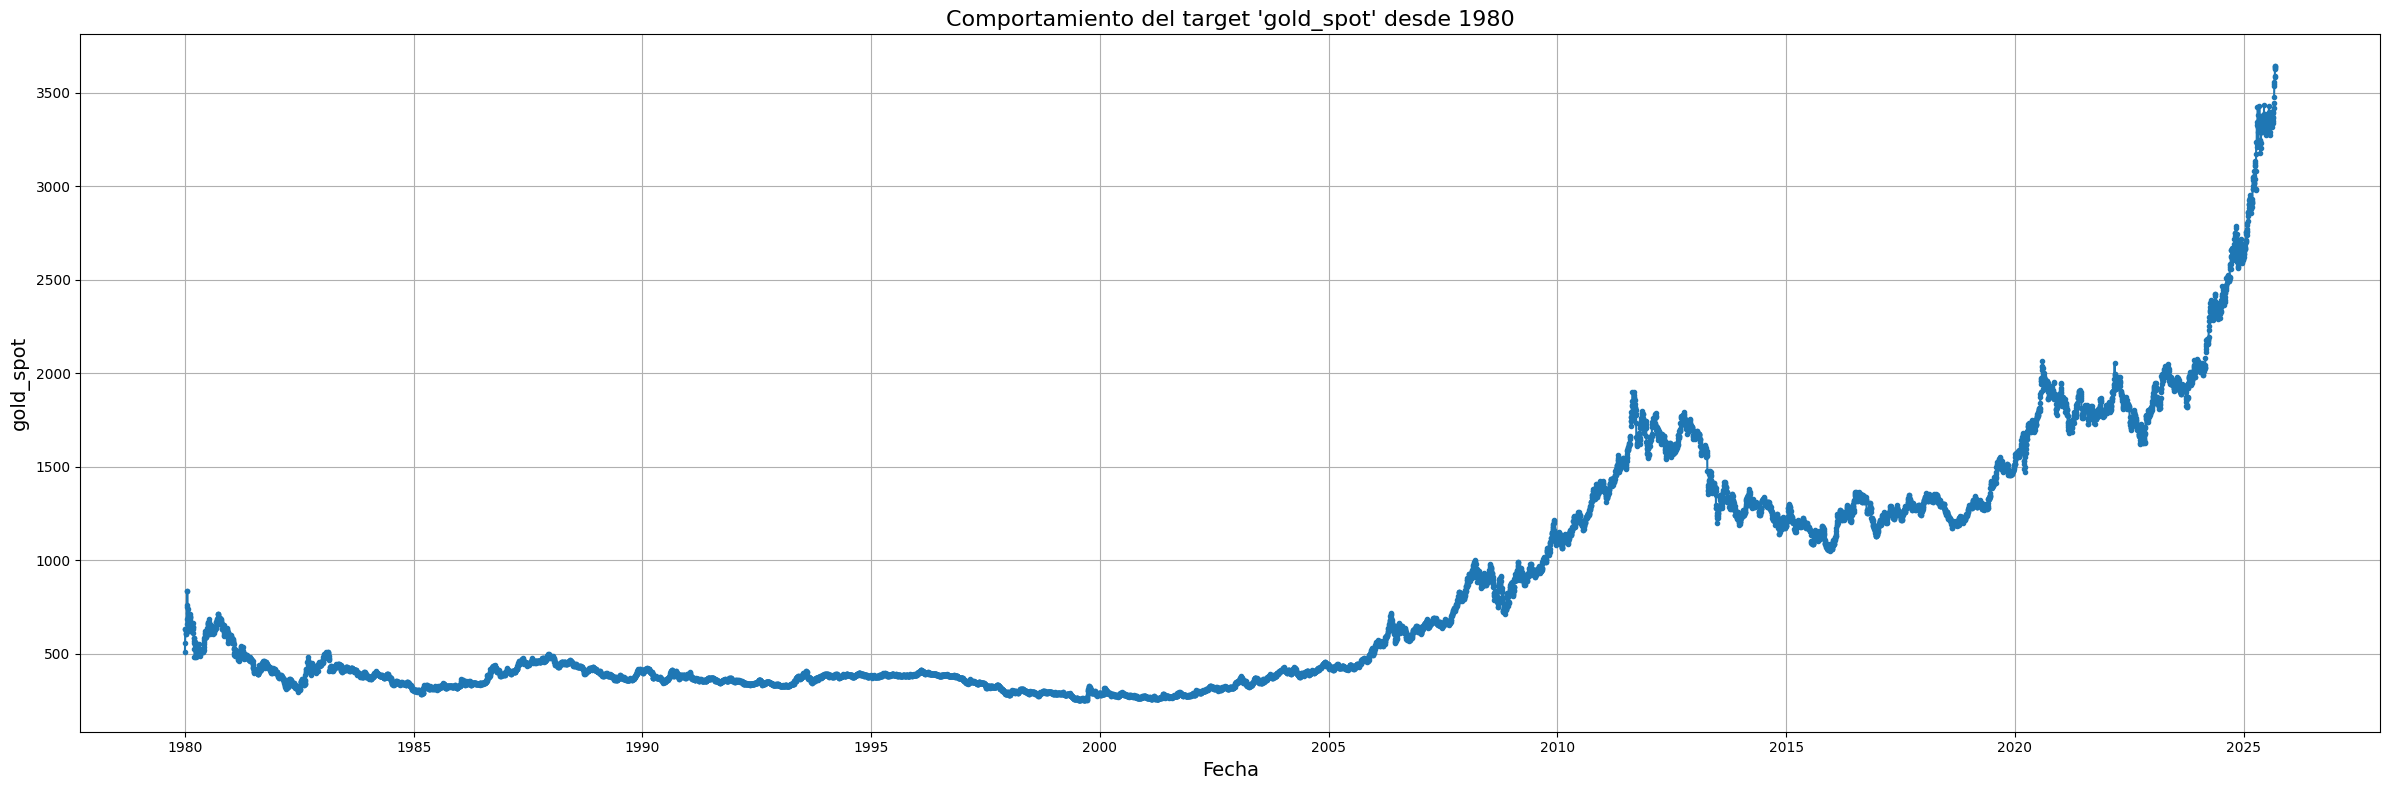

In [309]:
# -------------------------
# 2.4.2 Visualización del target desde el primer año válido (pantalla completa)
# -------------------------
df_viz = df.copy()
plt.figure(figsize=(24, 8))
plt.plot(df_viz[DATE_COL], df_viz[TARGET], marker='o', linestyle='-', markersize=3)
plt.title(f"Comportamiento del target '{TARGET}' desde {START_YEAR}", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel(TARGET, fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "target_plot.png"), dpi=150)
plt.show()


Al observar la gráfica del precio del oro, podemos extraer las siguientes conclusiones clave sobre la dinámica de la variable objetivo:

### 1. Tendencia Dominante y Crecimiento:

- La serie muestra una clara y fuerte tendencia ascendente a lo largo del tiempo. Esto significa que los precios históricos del oro tienden a aumentar, y cualquier modelo de predicción deberá capturar esta inercia de crecimiento.

### 2. Volatilidad y Variación:

- La serie no es constante; presenta alta volatilidad, evidenciada por los movimientos bruscos y las rápidas subidas y caídas. La magnitud de estas fluctuaciones a menudo parece aumentar a medida que el precio base sube (un fenómeno llamado heterocedasticidad).

### 3. Comportamiento No Estacionario:

- La presencia de una fuerte tendencia ascendente implica que la serie es no estacionaria. La estacionariedad (media y varianza constantes a lo largo del tiempo) es un requisito fundamental para muchos modelos estadísticos de series temporales (como ARIMA). Esto significa que será necesario aplicar diferenciación (tomar la diferencia entre el valor actual y el anterior) para estabilizar la serie antes de modelar.

### 4. Puntos de Interés / Eventos:

- Se pueden observar periodos de crecimiento exponencial (ej. al final de 2019/inicio de 2020) seguidos de consolidaciones o caídas repentinas. Estos puntos a menudo corresponden a eventos económicos o geopolíticos significativos (como la crisis de 2008 o la pandemia de 2020), que son cruciales para interpretar la robustez del modelo.

Esta visualización sirve únicamente como referencia exploratoria y refuerza la idea de que el tramo reciente del dataset es el más informativo para análisis multivariantes. A partir de lo observado en este punto del EDA, el próximo paso será evaluar qué variable ofrece un punto de inicio consistente para la mayoría de las series, de manera que podamos definir un recorte estratégico más adecuado para el preprocesamiento formal.

Como veremos, la característica `geopolitical_risk` resulta ser un candidato intermedio sin ser tan agresivo para ese propósito.

## 3) Imputación temporal exploratoria y normalización del dataset

Para continuar con el análisis exploratorio (EDA) necesitamos un dataset **completo**, sin valores
faltantes, ya que técnicas como:

- correlaciones multivariantes,
- PCA (Análisis de Componentes Principales),
- VIF (Variance Inflation Factor),
- métricas basadas en modelos,
- y análisis de estabilidad temporal,

requieren que no existan `NaN` en ninguna columna.

El principal desafío es que las series originales provienen de **fuentes heterogéneas** con
frecuencias distintas (diaria, mensual, trimestral, anual) y, además, **comienzan en años diferentes**.
Para mitigar esta disparidad y construir una versión usable del dataset, aplicamos una imputación
temporal simple basada en dos pasos:

1. **Forward Fill (`ffill`)**
   Propaga hacia adelante el último valor conocido.
   Es adecuado para datos macroeconómicos y financieros donde muchas variables se mantienen constantes
   entre fechas de publicación (CPI, PIB, M2, unemployment…).

2. **Backward Fill (`bfill`)**
   Se utiliza solo para rellenar los primeros registros, antes del primer valor disponible.
   Afecta principalmente a variables de baja frecuencia y su impacto en la dinámica temporal es muy
   limitado.

El uso combinado de `ffill` + `bfill` es aceptable en esta fase porque:
- la imputación ocurre únicamente con fines exploratorios
- no se utilizará para modelado
- evita la eliminación de filas completas
- y permite trabajar con un dataset multivariado coherente

Posteriormente, aplicamos un **StandardScaler** para estandarizar todas las variables y eliminar diferencias de magnitud que podrían sesgar correlaciones, PCA o métricas basadas en modelos.

La versión resultante es el `dataset_imputado_escalado_simple.csv`, usado exclusivamente para EDA.


In [310]:
# -------------------------
# 3) Imputación temporal y normalización exploratoria
# -------------------------

print("Imputando valores faltantes...")

y = df[TARGET].copy()
X = df.drop(columns=[DATE_COL, TARGET]).copy()

# Imputación temporal exploratoria
X = X.ffill().bfill()
y = y.ffill().bfill()

# Normalización
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)

# Construcción del dataset exploratorio final
df_exploratory = pd.concat([df[DATE_COL], y.rename(TARGET), X_scaled], axis=1)

# Guardado
output_path = "dataset_imputado_escalado_simple.csv"
df_exploratory.to_csv(output_path, index=False)

print(f"Dataset exploratorio guardado en: {output_path}")


Imputando valores faltantes...
Dataset exploratorio guardado en: dataset_imputado_escalado_simple.csv


La aplicación de `ffill` seguida de `bfill` permite obtener un dataset completamente observado sin
eliminar filas y sin recurrir a modelos más complejos que podrían sesgar el análisis. Los efectos
principales observados son los siguientes:

---

### 1. El forward-fill funciona de manera natural en series financieras y macroeconómicas
Muchos indicadores económicos se publican una vez al mes o una vez al trimestre, permaneciendo
constantes hasta la siguiente actualización. Por ello:

- `ffill` no introduce información futura
- mantiene el valor más reciente conocido
- y respeta el comportamiento típico de las series de baja frecuencia

Es una práctica estándar en EDA de finanzas y macro.

---

### 2. El backward-fill afecta solo a los primeros registros
El `bfill` solo entra en juego cuando una variable comienza después de 1985.
Se limita a rellenar los primeros valores vacíos utilizando el primer dato disponible de esa serie.

Esto es justificable porque:

1. La imputación ocurre **solo en los primeros días** del periodo analizado.
2. Afecta a variables de **baja frecuencia**, donde los saltos entre observaciones son grandes.
3. No se utilizará para entrenar modelos, solo para:
   - calcula PCA
   - correlaciones
   - VIF
   - métricas estadísticas que requieren un dataset completo

Por tanto, **no existe riesgo de data leakage en el workflow de modelado**, ya que este dataset es
exclusivamente exploratorio.

---

### 3. Estandarización mediante StandardScaler
El escalado elimina las diferencias de magnitud entre variables, permitiendo que:

- PCA no se sesgue hacia las variables de mayor varianza
- correlaciones no queden dominadas por efectos de escala
- y VIF identifique multicolinealidad de forma correcta

---

### 4. Archivo final exploratorio
El fichero generado:
dataset_imputado_escalado_simple.csv
- fecha (`date`)
- target (`gold_spot`)
- todas las features escaladas y sin valores faltantes

y será usado exclusivamente para los análisis exploratorios posteriores.

---

### Aclaración importante
Este dataset **NO puede emplearse en entrenamiento o validación de modelos**, ya que contiene
imputaciones no causales (especialmente por `bfill`).
Para el modelado se utilizará un pipeline que:

- impute solo con datos pasados
- evite cualquier fuga temporal
- y respete el orden crono-causal completo

---

En resumen, la imputación exploratoria mediante `ffill` + `bfill` nos permite obtener un dataset completo y estandarizado con el que trabajar durante el EDA. Aunque no es el preprocesado definitivo, esta versión es suficiente para calcular correlaciones, PCA, VIF y otros análisis multivariantes sin problemas derivados de valores faltantes. Con esta base ya podemos avanzar hacia un diagnóstico más profundo de la estructura del dataset.




## 4) PCA Exploratorio: reducción de dimensionalidad y análisis de varianza

Tras imputar y escalar el dataset exploratorio, el siguiente paso del EDA es aplicar un
**Análisis de Componentes Principales (PCA)**.

El PCA permite:

- identificar direcciones de máxima varianza en los datos
- medir cuánta información se puede explicar con pocas combinaciones lineales
- detectar redundancia entre variables
- evaluar si existen grupos naturales de features que aportan información similar
- y generar un primer indicador de relevancia global basado en la contribución de cada feature a los componentes principales

Este PCA no se utiliza para modelado directo, sino como herramienta de diagnóstico:

- ayuda a entender si el dataset tiene muchas dimensiones útiles o pocas
- permite identificar features que dominan la varianza global
- y anticipa problemas de multicolinealidad

Además, generaremos dos salidas importantes:

1. **Scree plot** (varianza explicada por componente)
2. **Ranking PCA_score** por feature, calculado a partir de las cargas y de la varianza explicada.

Este ranking puede ser útil más adelante en la etapa de selección de características.


In [311]:
# -------------------------
# 4) PCA Exploratorio
# -------------------------

print("Ejecutando PCA exploratorio...")

# Solo utilizamos las features escaladas (ya sin NaNs)
X_only = df_exploratory.drop(columns=[DATE_COL, TARGET])

pca = PCA(n_components=PCA_VARIANCE_THRESHOLD)
pca.fit(X_only)

n_components_selected = pca.n_components_
print(f"Componentes seleccionados con {PCA_VARIANCE_THRESHOLD*100:.0f}% de varianza explicada:",
      n_components_selected)

# Cargas (loadings)
loadings = pd.DataFrame(
    pca.components_[:n_components_selected].T,
    index=X_only.columns,
    columns=[f"PC{i+1}" for i in range(n_components_selected)]
)

weights = pca.explained_variance_ratio_[:n_components_selected]
pca_importance = (loadings.abs() * weights).sum(axis=1).rename("PCA_score")

pca_importance.to_csv(os.path.join(OUTPUT_DIR, "pca_top25_features.csv"))
loadings.to_csv(os.path.join(OUTPUT_DIR, "pca_loadings.csv"))

print("PCA completado.")
print("Archivos guardados:",
      "\npca_top25_features.csv",
      "\npca_loadings.csv")


Ejecutando PCA exploratorio...
Componentes seleccionados con 95% de varianza explicada: 14
PCA completado.
Archivos guardados: 
pca_top25_features.csv 
pca_loadings.csv


Versión para informe guardada en:
 → stage1_outputs\pca_scree_plot_informe.pdf
 → stage1_outputs\pca_scree_plot_informe.png


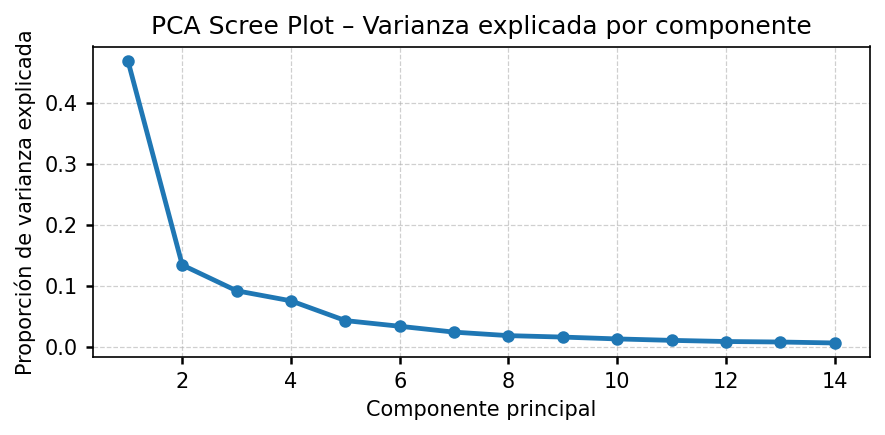

In [312]:
x = np.arange(1, n_components_selected + 1)
y = pca.explained_variance_ratio_[:n_components_selected]

# Rutas
out_path_pdf = os.path.join(OUTPUT_DIR, "pca_scree_plot_informe.pdf")
out_path_png = os.path.join(OUTPUT_DIR, "pca_scree_plot_informe.png")

# Crear figura única
fig, ax = plt.subplots(figsize=(6,3), dpi=150)

ax.plot(x, y, marker='o', linewidth=2.3, markersize=5)

# --- Versión simple para informe ---
ax.set_title("")
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis='both', labelsize=10, width=1.2)
ax.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)

# Nota explicativa SOLO para la versión del informe
text_handle = plt.figtext(
    0.5, -0.04,
    "Eje horizontal: Número de componente principal — "
    "Eje vertical: Proporción de varianza explicada",
    ha="center", fontsize=9
)

plt.tight_layout()

# Guardar versión para artículo
plt.savefig(out_path_pdf, format="pdf", bbox_inches="tight")
plt.savefig(out_path_png, dpi=300, bbox_inches="tight")

print("Versión para informe guardada en:")
print(" →", out_path_pdf)
print(" →", out_path_png)

# --- Preparar versión Notebook (limpia, sin nota de ejes) ---
text_handle.remove()   # elimina la explicación inferior
ax.set_title("PCA Scree Plot – Varianza explicada por componente")
ax.set_xlabel("Componente principal")
ax.set_ylabel("Proporción de varianza explicada")

plt.tight_layout()
plt.show()

plt.close(fig)

El PCA aplicado al dataset imputado y escalado (solo para fines exploratorios) permite analizar la estructura global de las 59 características después del recorte temporal basado en el primer valor válido del target. Este recorte modifica la varianza total y, en consecuencia, la contribución de cada componente principal.

### **1. Reducción de dimensionalidad y número de componentes necesarios**

El Scree Plot actualizado muestra que:

- El **primer componente principal (PC1)** explica alrededor de **el 45–47% de la varianza**, lo cual sigue siendo un valor muy alto.
- Los siguientes componentes tienen contribuciones decrecientes pero no tan abruptas.
- En esta versión del dataset se requieren **14 componentes** para alcanzar aproximadamente el **95% de la varianza explicada**.

Esto implica que, aunque el dataset tenga 59 variables, la **dimensionalidad efectiva sigue siendo mucho menor**, y gran parte del comportamiento multivariado puede describirse mediante un conjunto relativamente reducido de factores.

### **2. Estructura correlacional fuerte y patrones conjuntos**

Como en análisis anteriores, la alta contribución de los primeros componentes confirma que:

- Muchas variables tienen dinámicas similares
- Existen factores macroeconómicos y financieros que afectan simultáneamente a varios indicadores
- Subyace una estructura fuertemente correlacionada entre metales, divisas, índices y variables macro

Esto es coherente con lo observado en las correlaciones y con la naturaleza de los datos financieros.

### **3. Importancia relativa de las características (PCA Score)**

A partir de las cargas (loadings) y del peso relativo de cada componente, se genera el **PCA_score**, que identifica qué variables son las que más contribuyen a la variabilidad global del sistema.

Este score:

- No es un criterio de selección definitivo
- No implica causalidad
- Pero sí actúa como una primera medida para detectar variables informativas y redundancias

Las variables con mayor PCA_score suelen ser:

- metales preciosos (oro, plata, platino)
- futuros asociados a commodities relevantes
- algunos índices de volatilidad o riesgo financiero
- indicadores macroeconómicos clave

### 4. Complejidad de la estructura temporal y diferencias respecto a versiones previas

En este tramo temporal, el PCA requiere un número relativamente amplio de componentes para captar la mayor parte de la varianza. Esto refleja que la estructura interna del dataset es más rica y está distribuida entre múltiples factores, especialmente debido a la incorporación de series modernas con dinámicas más específicas.

En pruebas previas realizadas sobre un recorte temporal más agresivo (no mostrado en esta versión del notebook), la varianza se concentraba ligeramente más en los primeros componentes. El comportamiento actual, por tanto, sugiere que el rango temporal utilizado ahora incorpora una diversidad mayor de señales y patrones, lo que hace necesario un conjunto algo más amplio de componentes principales para describir adecuadamente la variabilidad del sistema.

---
En conjunto, este PCA exploratorio confirma la presencia de una **alta colinealidad** entre las variables y ofrece una primera visión clara de la redundancia interna del dataset. Aunque no se utiliza para seleccionar características de forma definitiva, sí proporciona una base sólida para orientar los métodos más específicos de reducción de redundancia y selección de variables que aplicaremos en fases posteriores del proyecto.



## 5) Análisis de correlaciones (Pearson y Spearman)

Después del PCA exploratorio, el siguiente paso del EDA consiste en estudiar las **relaciones
bivariadas** entre las variables. Este análisis es fundamental para comprender:

- qué features mantienen correlación lineal con `gold_spot` (Pearson)
- qué relaciones monotónicas existen aunque no sean lineales (Spearman)
- qué grupos de variables están fuertemente correlacionados entre sí (redundancia)
- y qué señales destacan preliminarmente como candidatas relevantes o redundantes

Se aplican dos métricas complementarias:

### Pearson
Captura correlación lineal directa. Muy útil para variables macroeconómicas y financieras.

### Spearman
Captura relaciones monotónicas. Es más robusto a outliers y no requiere linealidad.

A partir de estas correlaciones generaremos:

- un fichero completo con la matriz de Pearson
- otro con la matriz de Spearman
- un ranking de correlaciones con el target, ambos métodos
- y visualizaciones del top 15 para interpretar las relaciones significativas

Esto nos permitirá comparar este análisis con el PCA y comenzar a identificar:

- redundancia (features casi duplicadas)
- clusters de variables altamente relacionadas
- y primeras señales candidatas para selección de características


In [313]:
# -------------------------
# 5) Correlaciones
# -------------------------

print("Calculando correlaciones entre features (sin el target)...")

X_scaled = df_exploratory.drop(columns=[DATE_COL, TARGET])
y = df_exploratory[TARGET]

# Correlación entre features
corr_pearson = X_scaled.corr(method="pearson")
corr_spearman = X_scaled.corr(method="spearman")

corr_pearson.to_csv(os.path.join(OUTPUT_DIR, "feature_corr_matrix_pearson.csv"))
corr_spearman.to_csv(os.path.join(OUTPUT_DIR, "feature_corr_matrix_spearman.csv"))

print("Matrices guardadas.")

# -------------------------
# 5.1 Correlación con el target
# -------------------------

print("Calculando correlación de cada feature con el target...")

X_corr = X_scaled.copy()
X_corr[TARGET] = y

corr_pearson_full = X_corr.corr(method="pearson")
corr_spearman_full = X_corr.corr(method="spearman")

corr_with_target = pd.DataFrame({
    "feature": X_scaled.columns,
    "pearson_with_target": corr_pearson_full[TARGET][X_scaled.columns].values,
    "spearman_with_target": corr_spearman_full[TARGET][X_scaled.columns].values
})

corr_with_target = corr_with_target.sort_values("pearson_with_target", ascending=False)
corr_with_target.to_csv(os.path.join(OUTPUT_DIR, "feature_corr_with_target.csv"), index=False)

display(corr_with_target.head(20))

print("feature_corr_with_target.csv guardado correctamente")



Calculando correlaciones entre features (sin el target)...
Matrices guardadas.
Calculando correlación de cada feature con el target...


,feature,pearson_with_target,spearman_with_target
6,gold_futures,0.999952,0.999711
53,export_price_index,0.995915,0.943257
30,etf_gold_flows,0.995834,0.885738
10,silver_spot,0.921109,0.906926
46,us_m2,0.915343,0.725879
56,google_trends_gold_element,0.902266,0.799378
4,silver_futures,0.896157,0.913495
19,copper_futures,0.892630,0.868107
55,us_gdp,0.891936,0.726084
40,fed_balance_walcl,0.889629,0.877342


feature_corr_with_target.csv guardado correctamente


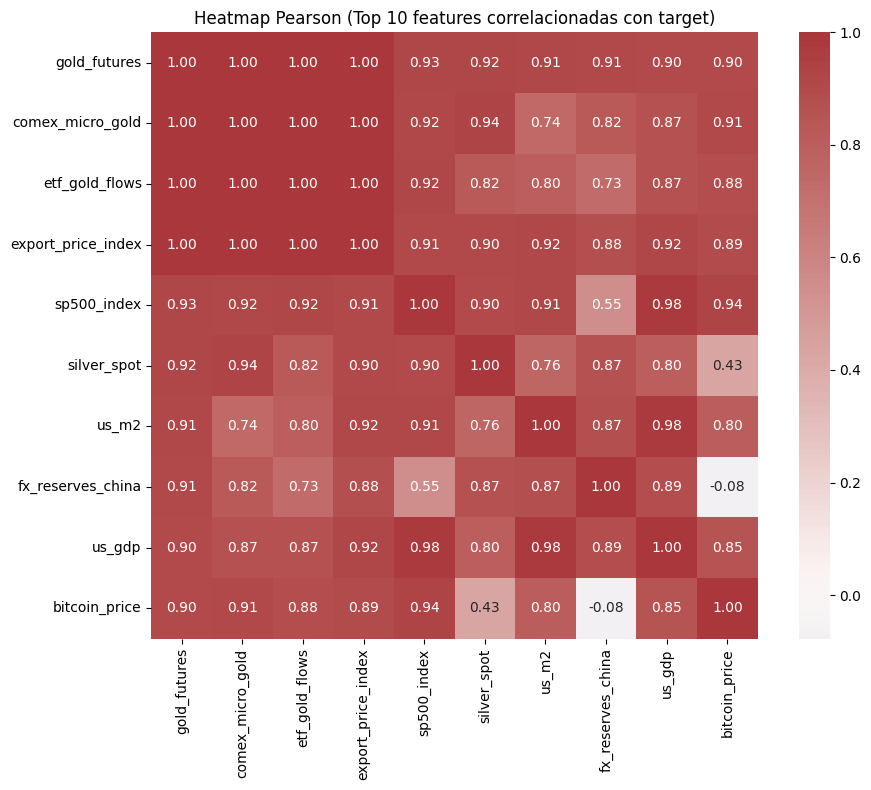

In [314]:
# -------------------------
# Heatmap compacto top10 correlaciones
# -------------------------
pearson_all = df_viz[features].corr(method="pearson").abs()
corr_with_target = df_viz[features].corrwith(df_viz[TARGET], method="pearson").abs()
top10 = corr_with_target.sort_values(ascending=False).head(10).index.tolist()

plt.figure(figsize=(10, 8))
corr_small = df_viz[top10].corr(method="pearson")
sns.heatmap(corr_small, annot=True, fmt=".2f", cmap="vlag", center=0, square=True)
plt.title("Heatmap Pearson (Top 10 features correlacionadas con target)")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "heatmap_top10.png"), dpi=150)
plt.show()

# save matrix
corr_small.to_csv(os.path.join(OUTPUT_DIR, "heatmap_top10_matrix.csv"))


Una vez construido el dataset exploratorio (imputación simple + escalado), se analizó la relación
entre cada una de las 59 características y el precio del oro (`gold_spot`) mediante dos métricas
de correlación ampliamente utilizadas en análisis financiero:

- **Correlación de Pearson** → mide dependencia lineal directa.
- **Correlación de Spearman** → mide relaciones monotónicas, más robusta ante outliers.

El objetivo aquí no es seleccionar todavía las variables finales, sino:

- identificar patrones económicos coherentes,
- detectar redundancia entre grupos de variables,
- y comparar los resultados con el PCA exploratorio para validar consistencia general.

---

## Resultados principales — Pearson (Top 15)

El ranking de correlaciones de Pearson muestra valores excepcionalmente altos, situados en torno a
**0.85–0.99**, lo que indica relaciones lineales muy fuertes entre el precio del oro y numerosas
variables del entorno financiero.

Entre las más correlacionadas se encuentran:

- `gold_futures` (≈ 0.99)
- `export_price_index`
- `etf_gold_flows`
- `silver_futures`, `silver_spot`
- `copper_futures` / `copper_spot`
- `us_m2`, `us_gdp`, `us_cpi`
- `us_retail_sales`
- `fed_balance_walcl`
- `fx_reserves_china`

Este conjunto de correlaciones es económicamente coherente:

- Los futuros del oro tienden a moverse casi uno a uno con el spot.
- Los metales preciosos comparten drivers comunes (industria, refugio, demanda global).
- Las variables macroeconómicas reflejan condiciones de liquidez, inflación y actividad económica.
- Flujos de ETFs y reservas internacionales capturan posiciones de inversión y factores sistémicos.

---

## Resultados principales — Spearman (Top 15)

El ranking de Spearman es prácticamente idéntico al de Pearson, indicando que las relaciones:

- no solo son lineales,
- sino también monótonas y estables a nivel histórico.

Una diferencia relevante:

- `bitcoin_price` aparece dentro del Top 15 de Spearman, pero no en Pearson.

Interpretación:

- Su relación con el oro no es estrictamente lineal,
- pero sí mantiene una **relación monotónica** en varios períodos (activos alternativos durante estrés financiero).

---

## Redundancia evidente entre features

Las matrices completas de Pearson y Spearman muestran grupos de variables casi duplicadas:

- `gold_futures` ↔ `gold_spot`
- `silver_futures` ↔ `silver_spot`
- `copper_futures` ↔ `copper_spot`
- `google_trends_gold_element` ↔ `google_trends_gold_word`
- `us_gdp`, `us_cpi`, `us_m2`, `retail_sales` (macro altamente sincronizadas)

Este comportamiento confirma lo observado en el PCA:

> El dataset presenta **redundancia estructural severa** y una fuerte multicolinealidad.

---

## Coherencia con el PCA exploratorio

El PCA mostró que:

- los primeros componentes concentran la mayor parte de la varianza,
- el primer componente está dominado por metales preciosos y flujos financieros,
- componentes posteriores recogen variabilidad macroeconómica.

El análisis de correlaciones confirma:

- los metales preciosos explican gran parte del movimiento del oro,
- las variables macroeconómicas aportan información complementaria,
- muchas variables comparten patrones casi idénticos.

---

El análisis de correlaciones muestra relaciones económica y estadísticamente coherentes entre el precio del oro y numerosas variables financieras y macroeconómicas. También revela una multicolinealidad marcada y grupos de características claramente redundantes, aspectos que coinciden con los patrones observados en el PCA. Aunque este análisis no implica aún una selección formal de variables, sí proporciona una visión clara de la estructura interna del dataset y refuerza la necesidad de aplicar métodos más avanzados de reducción de características en etapas posteriores.



## 6) Análisis exploratorio de multicolinealidad mediante VIF

Además de las correlaciones bivariadas, es necesario evaluar la presencia de
multicolinealidad entre las variables. Este fenómeno aparece cuando una o varias
features pueden expresarse como combinación lineal de otras, lo que dificulta:

- la interpretación individual de cada variable,
- la estabilidad de los modelos lineales,
- la robustez del entrenamiento,
- y la generalización del modelo.

Para medir este efecto utilizamos el **Variance Inflation Factor (VIF)**, que estima
cuánto se infla la varianza de los coeficientes debido a la redundancia entre features.

Interpretación estándar del VIF:

- **VIF = 1 → Sin colinealidad**
- **VIF < 5 → Aceptable**
- **VIF 5–10 → Colinealidad moderada**
- **VIF > 10 → Colinealidad severa (variable problemática)**
- **VIF > 30–50 → Colapsa cualquier modelo lineal**

Dado que nuestro dataset contiene múltiples activos financieros estrechamente relacionados (oro, plata, cobre, ETF flows), así como indicadores macroeconómicos interdependientes (CPI, M2, GDP…), es esperable encontrar VIF altos.

Este análisis exploratorio permitirá identificar los grupos de variables redundantes y servirá como base para la fase posterior de selección mediante:
- filtrado por VIF,
- clustering de correlaciones,
- PCA,
- o selección basada en modelos.


Calculando VIF (Variance Inflation Factor)...


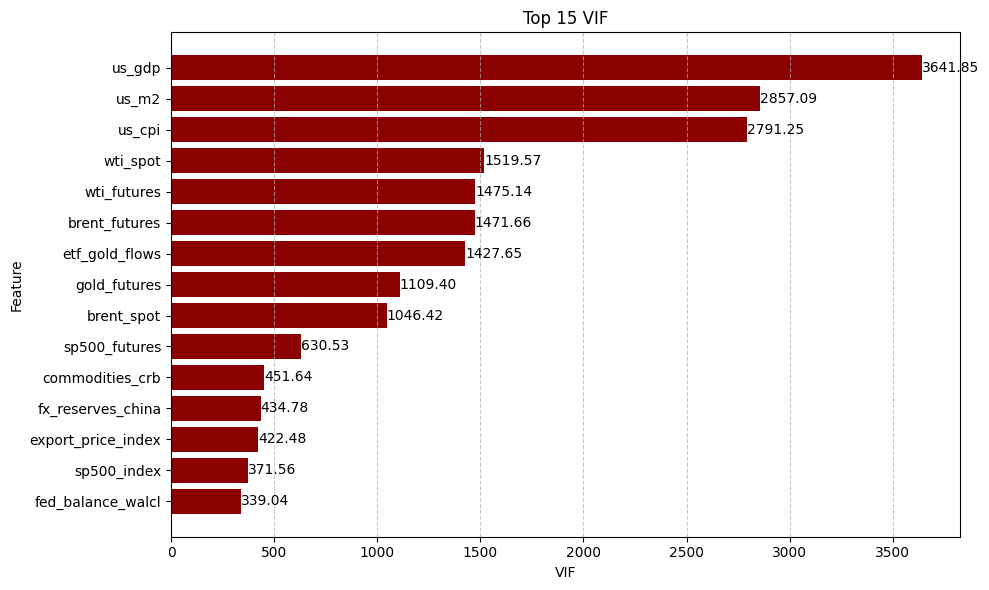

Archivo guardado: vif_exploratorio.csv


In [315]:
# -------------------------
# 6) Cálculo exploratorio del VIF
# -------------------------

print("Calculando VIF (Variance Inflation Factor)...")

# Matriz numérica (sin fecha y sin target)
X_vif = df_exploratory.drop(columns=[DATE_COL, TARGET])

vif_data = []
for i, col in enumerate(X_vif.columns):
    try:
        vif_val = variance_inflation_factor(X_vif.values, i)
    except Exception:
        vif_val = np.nan
    vif_data.append({"feature": col, "VIF": vif_val})

vif_df = pd.DataFrame(vif_data).sort_values("VIF", ascending=False)

top_15_vif = vif_df.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_15_vif['feature'], top_15_vif['VIF'], color='darkred')
plt.xlabel('VIF')
plt.ylabel('Feature')
plt.title('Top 15 VIF')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(top_15_vif['VIF']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left')

plt.tight_layout()
plt.show()

# Guardar resultado
vif_df.to_csv(os.path.join(OUTPUT_DIR, "vif_exploratorio.csv"), index=False)

print("Archivo guardado: vif_exploratorio.csv")


El fichero `vif_exploratorio.csv` muestra valores extremadamente altos para una gran parte de las
features, incluyendo:

- variables con VIF **muy por encima de 100**,
- varias con valores **entre 300 y 1500**,
- e incluso algunas cercanas a **2000**.

Estos valores indican que muchas características son **prácticamente combinaciones lineales** de otras.
Este fenómeno es habitual en datos macroeconómicos y financieros, donde muchas series:

- siguen tendencias comunes (inflación, ciclo económico, liquidez)
- responden a los mismos shocks globales
- o representan distintas facetas de una misma variable subyacente

La presencia de multicolinealidad tan severa confirma lo observado en:

- el PCA (varianza muy concentrada en pocos componentes)
- las matrices de correlación (relaciones superiores al 0.90 en múltiples pares)
- y los gráficos de correlación con el target (redundancia sistemática)

---

### Implicaciones para el modelado

Multicolinealidad tan alta provoca:

- **coeficientes inestables** en modelos lineales
- **sobreajuste** en modelos de regresión penalizada
- **importancias distorsionadas** en modelos basados en árboles
- deterioro en la interpretabilidad y en la capacidad de generalización

Por tanto, este resultado anticipa la necesidad de aplicar un proceso de **reducción y depuración**
del conjunto de características antes del modelado final.

---
El VIF confirma la existencia de una multicolinealidad muy severa y una gran redundancia estructural entre numerosas variables, en línea con lo observado previamente en el PCA y en las correlaciones. Aunque este resultado es solo exploratorio, anticipa claramente la necesidad de aplicar técnicas más avanzadas de reducción y depuración en la siguiente fase, como la agrupación por correlación y la reducción iterativa mediante VIF, con el objetivo de obtener un conjunto de características más estable, no redundante y adecuado para los modelos predictivos.


## 7) Distribución del target y detección de posibles outliers

Antes de completar el análisis exploratorio, es fundamental estudiar la distribución
estadística del precio del oro (`gold_spot`) y evaluar la presencia de valores atípicos.
Este tipo de inspección es especialmente importante en series financieras porque:

- los activos suelen presentar distribuciones no normales,
- pueden aparecer colas gruesas (fat tails),
- existen shocks macroeconómicos que generan saltos abruptos,
- la presencia de outliers afecta directamente a métricas sensibles como Pearson o PCA.

En esta sección evaluamos:

1. **Histograma + KDE**
   Para observar la forma general de la distribución.

2. **Boxplot**
   Para identificar rangos y outliers visibles.

3. **Estadísticos básicos**
   (asimetría, curtosis, percentiles)

Este análisis nos permitirá comprender mejor la naturaleza estadística del target
y valorar si será necesario aplicar transformaciones (log-return, differencing, scaling)
en etapas posteriores de modelado.


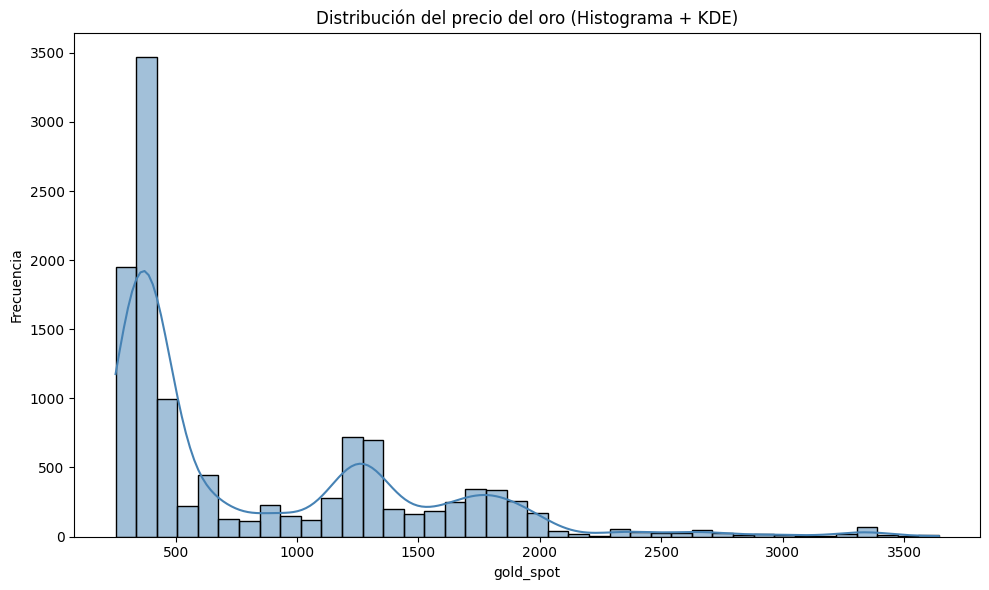

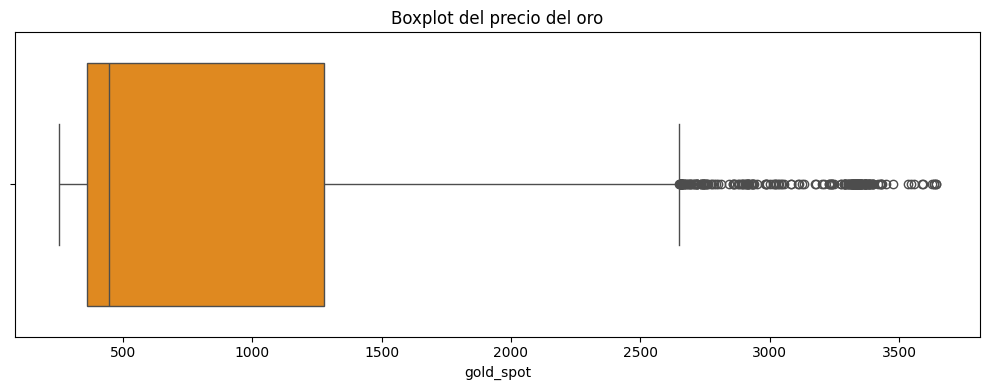

{'mean': np.float64(840.3225508395917),
 'median': np.float64(446.99),
 'std': np.float64(645.6857155327351),
 'min': np.float64(252.55),
 'max': np.float64(3643.13),
 'skewness': np.float64(1.3232927899018134),
 'kurtosis': np.float64(1.4785919686604334),
 'percentiles': {0.01: 263.3,
  0.05: 283.82500000000005,
  0.25: 363.63,
  0.5: 446.99,
  0.75: 1278.33,
  0.95: 1954.29,
  0.99: 3051.64}}

In [316]:
# -------------------------
# Distribución del target
# -------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

target = df[TARGET].dropna()

fig1, ax1 = plt.subplots(1, 1, figsize=(10, 6))

sns.histplot(target, kde=True, ax=ax1, bins=40, color="steelblue")
ax1.set_title("Distribución del precio del oro (Histograma + KDE)")
ax1.set_xlabel("gold_spot")
ax1.set_ylabel("Frecuencia")

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'histograma_kde.png'))
plt.show()

# Boxplot
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 4))

sns.boxplot(x=target, ax=ax2, color="darkorange")
ax2.set_title("Boxplot del precio del oro")
ax2.set_xlabel("gold_spot")

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'boxplot.png'))
plt.show()

# Estadísticos básicos
stats_target = {
    "mean": target.mean(),
    "median": target.median(),
    "std": target.std(),
    "min": target.min(),
    "max": target.max(),
    "skewness": skew(target),
    "kurtosis": kurtosis(target),
    "percentiles": target.quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).to_dict(),
}

stats_target


El análisis exploratorio de la variable objetivo (`gold_spot`) muestra una distribución fuertemente
asimétrica, multimodal y característica de un activo financiero con tendencia estructural creciente.
Las estadísticas descriptivas confirman visualmente lo observado en los gráficos de distribución y
boxplot:

- **Media:** 840.32
- **Mediana:** 446.99
- **Desviación estándar:** 645.69
- **Mínimo:** 252.55
- **Máximo:** 3643.13
- **Asimetría (skewness):** 1.32
- **Curtosis:** 1.48
- **Percentiles clave:**
  - 1% ⇒ 263.30
  - 5% ⇒ 283.83
  - 25% ⇒ 363.63
  - 50% ⇒ 446.99
  - 75% ⇒ 1278.33
  - 95% ⇒ 1954.29
  - 99% ⇒ 3051.64

Estas cifras permiten interpretar con mayor precisión la estructura de la distribución.

### 1. Distribución: multimodalidad y fuerte asimetría positiva
El histograma y la curva de densidad (KDE) muestran que:

- La serie presenta **multimodalidad**, reflejando distintos regímenes históricos del precio del oro
  (por ejemplo, niveles pre-2000, crisis financiera 2008–2011, y la escalada posterior a 2020).
- La **asimetría positiva elevada (skewness = 1.32)** confirma la cola larga hacia valores altos:
  los precios elevados son menos frecuentes pero muy significativos.
- La **curtosis moderadamente superior a 0 (1.48)** indica colas más pesadas que una normal,
  coherente con shocks macroeconómicos y eventos extremos.

Se muestra coherente con la naturaleza típica de los activos financieros, que suelen presentar colas gruesas y asimetrías pronunciadas, y el gran salto entre los percentiles 75 (≈1278) y 99 (≈3051) evidencia la rápida expansión del precio del oro en las últimas décadas.


### 2. Outliers: valores extremos estructurales, no ruido estadístico
El boxplot muestra una gran concentración de puntos por encima del límite superior del IQR.
Sin embargo, estos valores deben interpretarse como:

- **cambios reales en el nivel del precio del oro**, no errores
- efectos de ciclos inflacionarios, crisis financieras o periodos de aversión al riesgo
- comportamientos típicos de activos no estacionarios

Por tanto, estos outliers **no deben eliminarse** ni truncarse:
son parte integral de la señal económica.

### 3. Implicaciones para el análisis y modelado
El comportamiento observado tiene consecuencias directas para las fases posteriores:

- El oro **no es estacionario en niveles**, lo cual también se refleja en la ACF/PACF.
- Será recomendable trabajar con:
  - retornos logarítmicos,
  - diferencias del precio,
  - escalados robustos.
- Los modelos deben ser capaces de capturar:
  - tendencias de largo plazo,
  - cambios de régimen,
  - dinámicas no lineales.

Estos valores extremos se tratarán como parte natural de la señal y no serán eliminados, sino transformados adecuadamente en etapas posteriores (por ejemplo, mediante retornos o diferencias).

---
La combinación de estadísticas y visualizaciones confirma que el precio del oro posee
una distribución compleja, con fuerte sesgo hacia valores altos, alta variabilidad y múltiples
regímenes temporales. Este comportamiento deberá ser tratado cuidadosamente en el preprocesamiento
y la ingeniería de características.


## 8) Diagnóstico temporal: ACF y PACF del target

Para comprender la dependencia temporal del precio del oro, analizamos sus funciones:

- **ACF (Autocorrelation Function)**
  Indica cómo se correlaciona la serie consigo misma en distintos rezagos (lags).
  Útil para detectar memoria temporal, estacionalidad y estructuras persistentes.

- **PACF (Partial Autocorrelation Function)**
  Mide la correlación controlando los efectos de rezagos intermedios.
  Permite identificar órdenes preliminares para modelos AR (autoregresivos).

En esta fase, el objetivo NO es ajustar modelos ARIMA, sino:

- entender cuánta dependencia temporal tiene `gold_spot`,
- identificar si la serie presenta memoria larga,
- y comprender si la predicción inmediata depende fuertemente del pasado reciente.

Estos gráficos son un componente fundamental del EDA en series temporales.


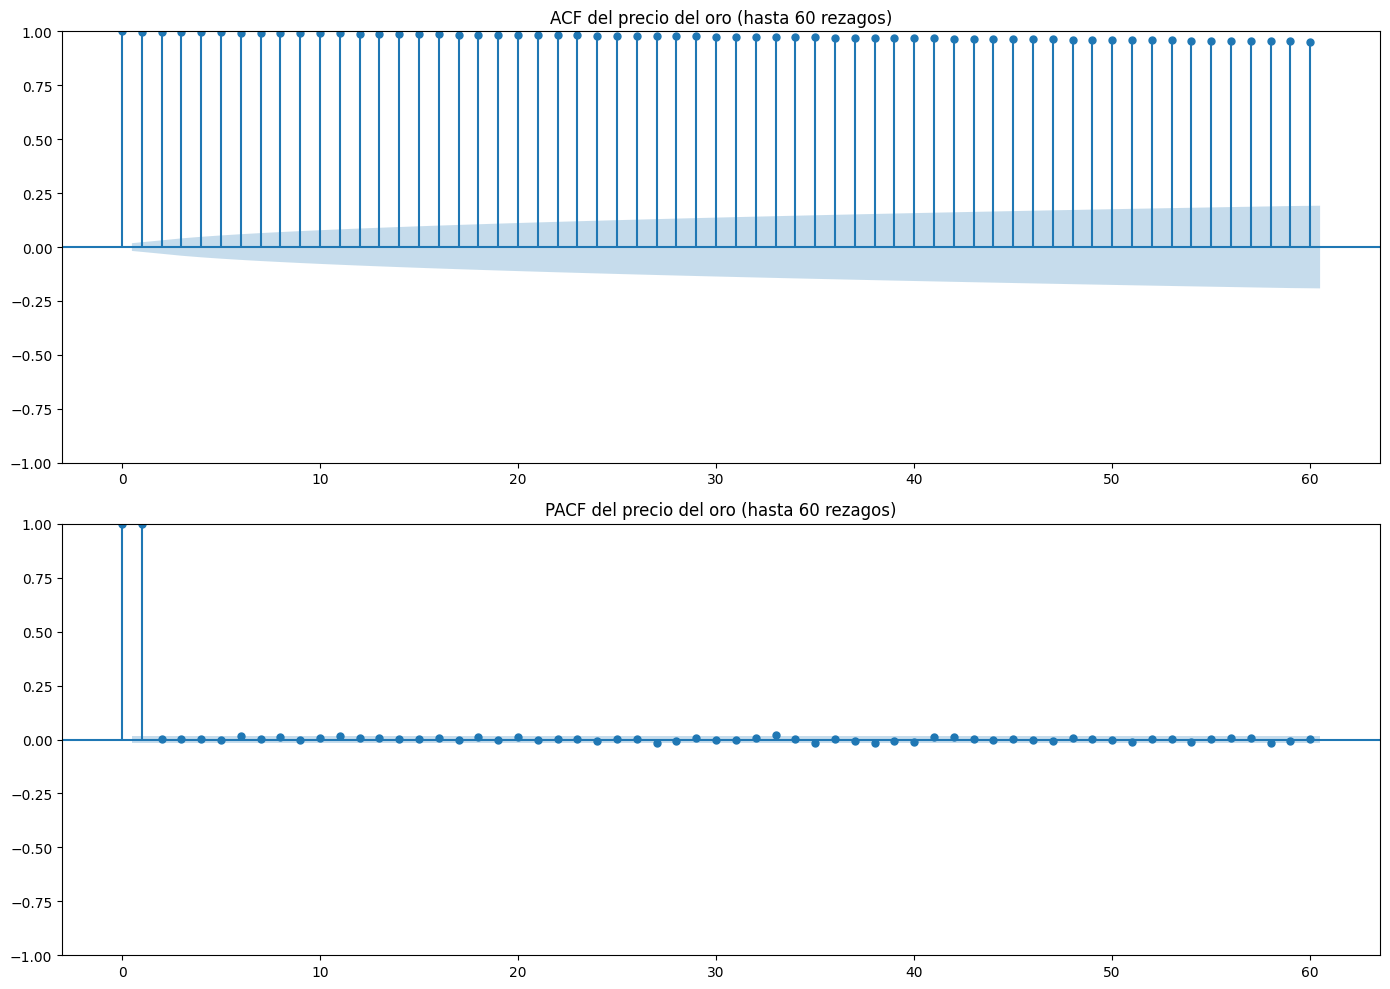

In [317]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(14, 10))

plot_acf(df[TARGET].dropna(), lags=60, ax=ax[0])
ax[0].set_title("ACF del precio del oro (hasta 60 rezagos)")

plot_pacf(df[TARGET].dropna(), lags=60, ax=ax[1], method="ywm")
ax[1].set_title("PACF del precio del oro (hasta 60 rezagos)")

plt.tight_layout()
plt.show()


## Interpretación del ACF y PACF del precio del oro

El análisis de autocorrelaciones (ACF) y autocorrelaciones parciales (PACF) del precio del oro
permite evaluar la estructura temporal de la serie y determinar si presenta estacionaridad,
tendencias, memoria de largo plazo o componentes autoregresivas relevantes.

### 1. ACF: persistencia extremadamente alta y decaimiento lento
La ACF muestra:

- Correlaciones **muy altas y positivas** en todos los rezagos mostrados (hasta 60 días).
- Un decaimiento **lento y casi lineal**, típico de series con comportamiento no estacionario.
- Memoria de largo plazo donde incluso observaciones distantes siguen fuertemente relacionadas.

Este patrón es característico de procesos con tendencia o raíz unitaria, y es coherente con la
estructura de la distribución del precio del oro, donde la serie presenta crecimiento sostenido y
cambios de régimen.

### 2. PACF: estructura autoregresiva simple
La PACF presenta:

- Un pico muy elevado en el **rezago 1**, indicando que el nivel actual del oro depende casi
  linealmente del valor del día anterior.
- Un segundo pico pequeño.
- Valores prácticamente nulos a partir del rezago 2 en adelante.

Esto sugiere que, una vez explicado el primer rezago, la contribución de rezagos adicionales es
mínima. Este patrón es típico de modelos AR(1) o procesos dominados por una tendencia determinista
más que por una dinámica autoregresiva compleja.

### 3. Implicaciones para el análisis y el modelado

- La combinación ACF + PACF confirma que el oro en niveles **no es estacionario**.
- Para modelos estadísticos clásicos (ARIMA), se necesitaría **al menos una diferenciación**.
- Para modelos de machine learning, será conveniente trabajar con:
  - retornos logarítmicos,
  - diferencias del precio,
  - lags seleccionados del target como features adicionales.
- La persistencia a largo plazo implica que los modelos deben ser capaces de capturar tendencias
  estructurales y episodios no lineales.

### 4. Coherencia con la distribución y los outliers estructurales
La fuerte autocorrelación está alineada con lo observado en la distribución:

- asimetría positiva,
- colas pesadas,
- valores extremos estructurales,
- multimodalidad por ciclos económicos.

Estos factores refuerzan la idea de que el precio del oro tiene comportamiento **no estacionario,
tendencial y con shocks persistentes**.

---

El precio del oro en niveles es una serie claramente no estacionaria, con una persistencia temporal muy elevada, estructura autoregresiva simple y memoria de largo plazo, lo que refleja una dinámica dominada por tendencias económicas globales y shocks persistentes. Estas propiedades deberán abordarse explícitamente en las fases de preprocesamiento y feature engineering para evitar sesgos y mejorar la capacidad predictiva de los modelos.


## 9) Visualizaciones EDA para variables numéricas (Regresión num-num)

Además de los análisis multivariantes realizados (PCA, correlaciones, VIF), es necesario
explorar visualmente la relación entre algunas características relevantes y el target
`gold_spot`. Este tipo de inspección visual permite:

- detectar relaciones no lineales o dependencias complejas,
- identificar cambios de régimen económico,
- observar dispersión y ruido,
- evaluar escalas, colas pesadas y asimetría,
- distinguir outliers estructurales de posibles errores.

Dado que el dataset contiene ~60 variables, la estrategia será **seleccionar únicamente
las visualizaciones más representativas** y agruparlas de forma compacta.


## 9.1 Scatterplots: relaciones numéricas representativas

Aunque los análisis multivariantes previos (correlaciones, PCA y VIF) ya mostraron una elevada redundancia entre muchas características, es útil visualizar algunas relaciones directas entre `gold_spot` y un conjunto reducido de variables heterogéneas. A diferencia de mostrar únicamente las más correlacionadas —que tienden a ser duplicados funcionales del oro—, seleccionamos seis variables que representan **patrones funcionales distintos**:

- **Metales relacionados:** `silver_spot`, `copper_spot`
- **Activo inverso:** `dxy_index`
- **Indicadores macroeconómicos:** `us_gdp`, `us10y_real`
- **Commodity energético:** `wti_spot`

Este conjunto permite ilustrar relaciones lineales, no lineales, inversas, de baja frecuencia y con diferentes grados de dispersión.


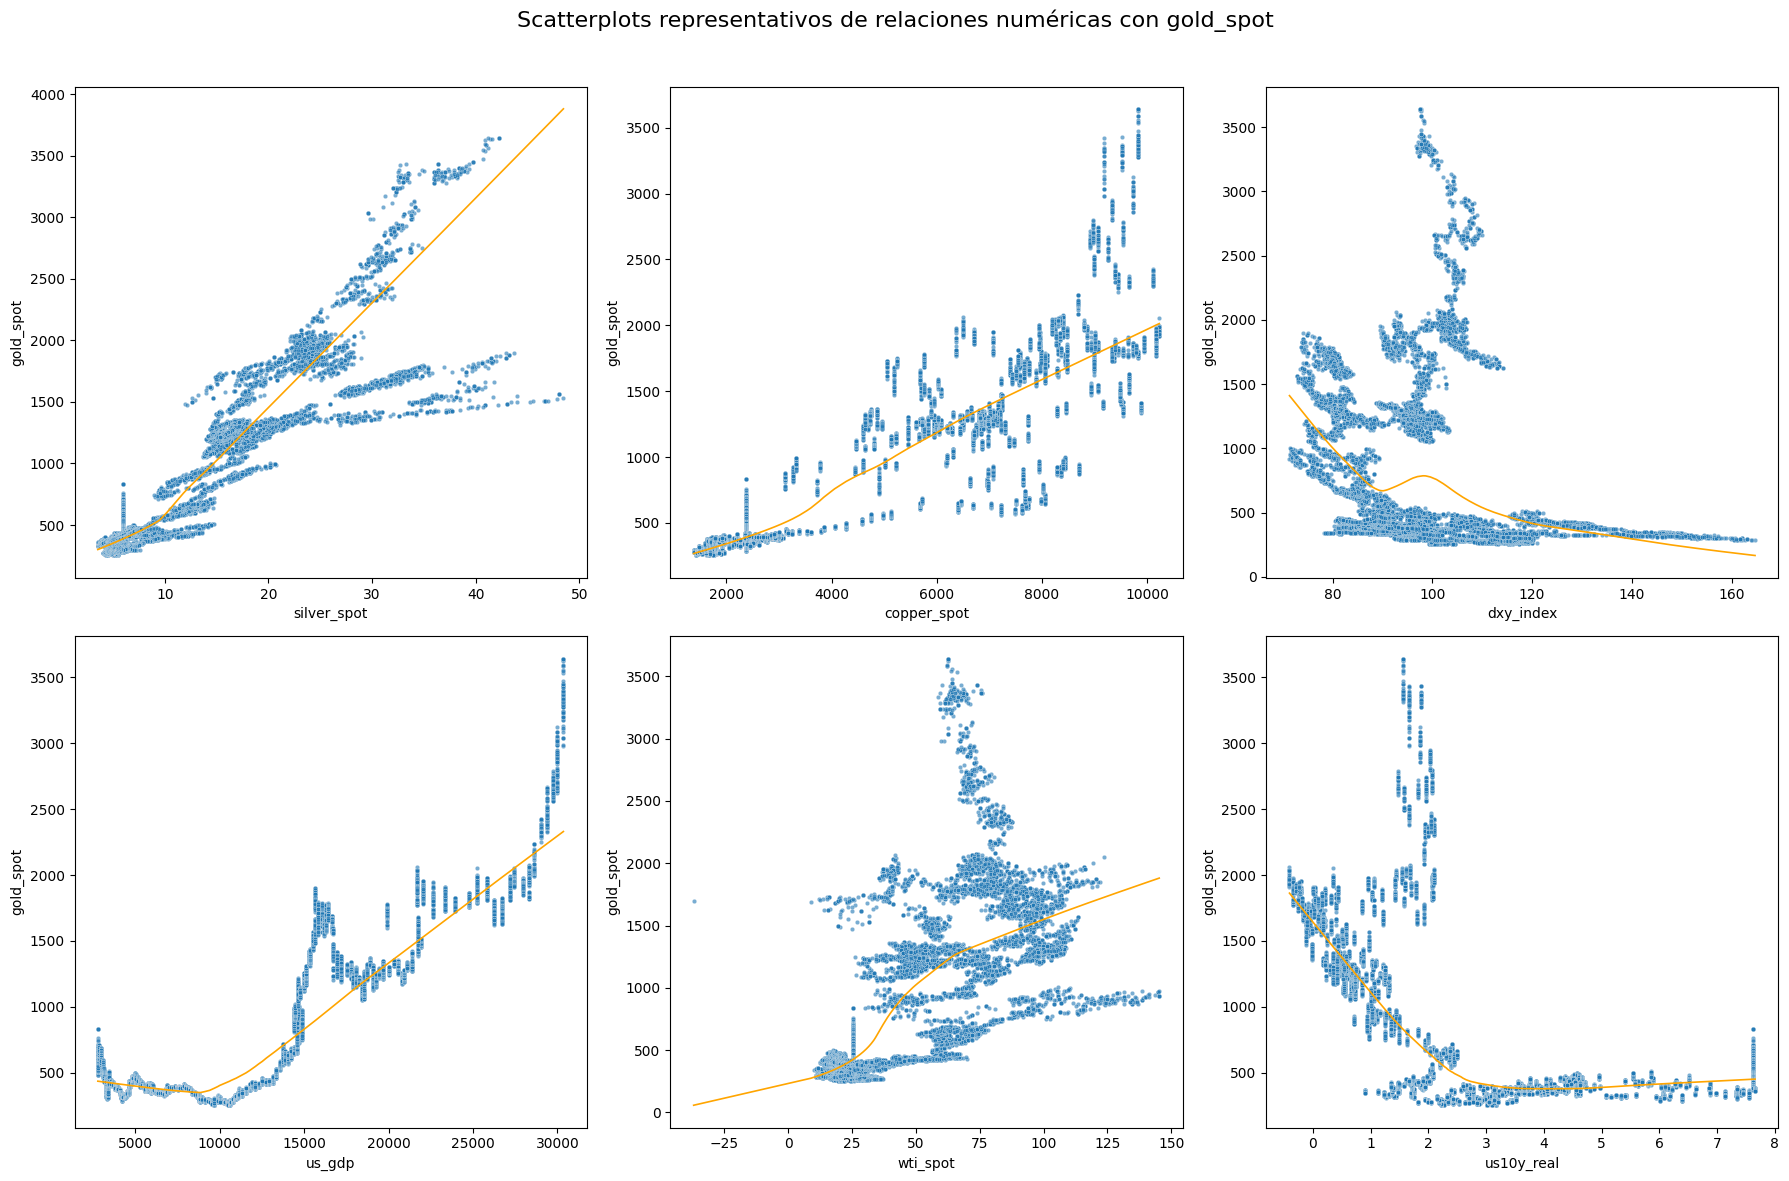

In [318]:
# -------------------------
# Scatterplots representativos (6 variables)
# -------------------------

df_viz = df.copy().ffill().bfill()

selected_vars = [
    "silver_spot",
    "copper_spot",
    "dxy_index",
    "us_gdp",
    "wti_spot",
    "us10y_real"
]

plt.figure(figsize=(18, 12))

for i, feat in enumerate(selected_vars, 1):
    ax = plt.subplot(2, 3, i)
    sns.scatterplot(x=df_viz[feat], y=df_viz[TARGET], s=10, alpha=0.6, ax=ax)

    sns.regplot(
        x=df_viz[feat], y=df_viz[TARGET],
        scatter=False, lowess=True,
        line_kws={"color": "orange", "lw": 1.2},
        ci=None, ax=ax
    )

    ax.set_xlabel(feat)
    ax.set_ylabel(TARGET)

plt.suptitle("Scatterplots representativos de relaciones numéricas con gold_spot", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Los seis scatterplots muestran una variedad de patrones que ayudan a entender la naturaleza de la relación entre el oro y diferentes grupos de variables del dataset.

### 1. Metales preciosos e industriales (`silver_spot`, `copper_spot`)
Ambas variables muestran relaciones crecientes con `gold_spot`, aunque con estructuras más complejas que una línea recta:

- Se observan **clusters y bandas horizontales**, reflejo de distintos ciclos económicos.
- La relación es **monótona**, pero no estrictamente lineal.
- La dispersión aumenta en valores altos del oro, especialmente en `copper_spot`, indicando dinámicas propias del mercado industrial.

### 2. Relación inversa con el dólar (`dxy_index`)
El patrón descendente es claro:

- A medida que sube el valor del dólar, el precio del oro suele disminuir.
- La curva LOWESS confirma una **relación negativa no lineal**, con zonas de alta dispersión en entornos de crisis.
- Es un comportamiento coherente con la dinámica global entre oro (activo refugio) y dólar (activo base internacional).

### 3. Indicadores macroeconómicos (`us_gdp`, `us10y_real`)
Estos scatterplots revelan relaciones mucho más difusas:

- El PIB (`us_gdp`), al ser mensual/trimestral, genera **bandas discretas** y no sigue una tendencia clara día a día.
- Las tasas reales (`us10y_real`) muestran una caída marcada del oro cuando las tasas superan cierto umbral, reflejando la competencia entre activos reales y activos financieros.
- Ambas relaciones ilustran cómo el oro **responde más a shocks macroeconómicos** que a niveles absolutos de las variables macro.

### 4. Commodity energético (`wti_spot`)
La relación con el petróleo es creciente pero ruidosa:

- Comportamientos similares pueden corresponder a periodos económicos distintos.
- La tendencia global es positiva, pero con **mucha variabilidad**, reflejando ciclos combinados entre energía, inflación y riesgo.

---
Las visualizaciones muestran relaciones crecientes, inversas y no lineales entre el oro y diferentes tipos de variables (metales, dólar, energía y macro). Esta diversidad de patrones confirma dependencias complejas y estructuras de distintos regímenes, reforzando la necesidad de una selección rigurosa de características en etapas posteriores.


### 9.2 Distribuciones (Histogramas + KDE) — target + 4 features representativas

Para complementar el análisis de relaciones numéricas, es útil examinar la distribución
marginal del target `gold_spot` y de un conjunto reducido de variables representativas.
A diferencia de mostrar todas las distribuciones del dataset —lo cual sería redundante y
poco informativo— se seleccionan cuatro características que ilustran patrones
estadísticos claramente diferenciados:

- **silver_spot:** metal correlacionado, multimodal y sesgado.
- **dxy_index:** índice del dólar, más estable y de forma cercana a unimodal.
- **wti_spot:** commodity energético con colas largas y cambios de régimen.
- **us10y_real:** tasa real con rango estrecho y estructura irregular.

Estas distribuciones ayudan a comprender la forma estadística de las variables, su
asimetría, dispersión y posibles outliers estructurales.


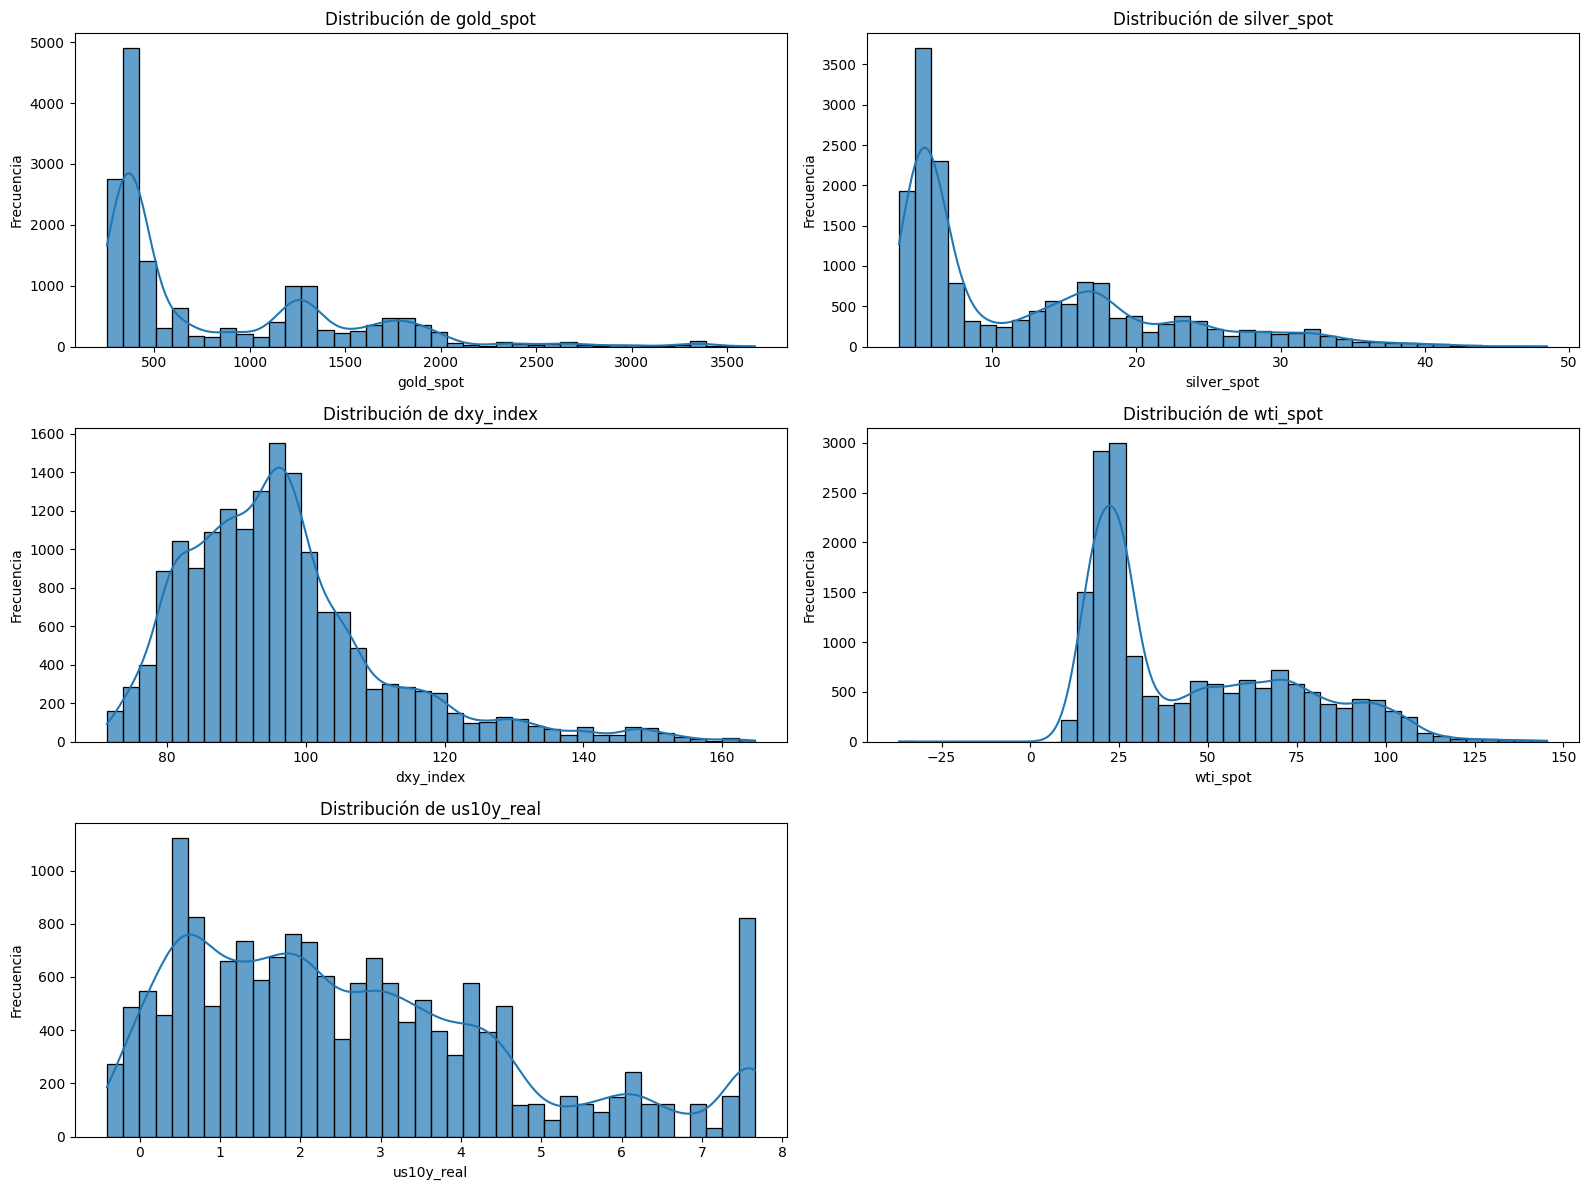

In [319]:
# ---------------------------------
# Histogramas + KDE de variables seleccionadas
# ---------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

df_viz = df.copy().ffill().bfill()

vars_to_plot = [
    TARGET,
    "silver_spot",
    "dxy_index",
    "wti_spot",
    "us10y_real"
]

plt.figure(figsize=(16, 12))

for i, feat in enumerate(vars_to_plot, 1):
    ax = plt.subplot(3, 2, i)
    sns.histplot(df_viz[feat], bins=40, kde=True, alpha=0.7, ax=ax)
    ax.set_title(f"Distribución de {feat}")
    ax.set_xlabel(feat)
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


Las distribuciones muestran comportamientos estadísticos muy distintos entre variables, lo que
refuerza la heterogeneidad del dataset y la necesidad de transformaciones específicas en fases
posteriores.

### 1. gold_spot (target)
El precio del oro presenta una distribución fuertemente asimétrica hacia la derecha, con varios picos
correspondientes a distintos regímenes históricos del mercado (periodos previos al año 2000, crisis
financiera, etapa post-COVID). La cola larga hacia valores altos confirma la presencia de shocks
persistentes y crecimiento estructural, coherente con la no estacionariedad previamente observada.

### 2. silver_spot
La distribución de la plata es similar a la del oro, aunque algo más escalonada: varios picos bien
definidos reflejan cambios abruptos entre ciclos económicos. La fuerte asimetría positiva y la
multimodalidad muestran que este metal comparte rastros de tendencia con el oro, pero mantiene
dinámicas propias y episodios de volatilidad diferenciada.

### 3. dxy_index
El índice del dólar muestra una distribución más concentrada y cercana a unimodal, con un rango mucho
más estrecho que los commodities. Se observa una ligera cola hacia valores altos, típica de periodos
de fortaleza del dólar. Su forma estable contrasta con la de los metales y anticipa la relación
inversa observada posteriormente en los scatterplots.

### 4. wti_spot
El petróleo presenta una distribución marcadamente sesgada y con varias acumulaciones de densidad,
incluyendo valores negativos (episodio de 2020) y múltiples regímenes bien diferenciados. La combinación
de picos estrechos y colas largas refleja la sensibilidad del WTI a shocks macroeconómicos, tensiones
geopolíticas y cambios en la demanda energética global.

### 5. us10y_real
La distribución de las tasas reales es completamente distinta: valores concentrados en un rango
estrecho, con picos irregulares y forma no suave. Esto refleja que la variable no sigue una dinámica
continua sino dependiente de acciones concretas de política monetaria. La densidad se acumula en
niveles bajos, lo que explica su relación estructural con el precio del oro: tasas reales bajas
suelen favorecer al metal, mientras que tasas altas lo presionan a la baja.

---

Las distribuciones revelan formas estadísticas muy heterogéneas —desde colas largas y multimodalidad hasta densidades compactas o discretas— lo que evidencia la variedad de comportamientos presentes en el dataset. Estas diferencias anticipan la necesidad de aplicar transformaciones adecuadas y tratamientos específicos durante el preprocesamiento.



### 9.3 Pairplot reducido (4 variables representativas)

Para complementar las visualizaciones anteriores, generamos un *pairplot* reducido que incluye
al target (`gold_spot`) y tres variables representativas con patrones estadísticos diferentes.
El objetivo es observar simultáneamente:

- relaciones bivariadas (scatterplots),
- distribuciones marginales (diagonales),
- posible alineación o clusters entre grupos de variables,
- variaciones de escala y dispersión.

Las cuatro variables seleccionadas son:

- **gold_spot** (target),
- **silver_spot** (metal correlacionado, multimodal),
- **dxy_index** (activo inverso),
- **wti_spot** (commodity energético con colas largas).

Este subconjunto permite visualizar relaciones lineales, inversas y no lineales dentro de una misma figura, evitando la saturación que produciría un pairplot completo de las ~60 variables del dataset.



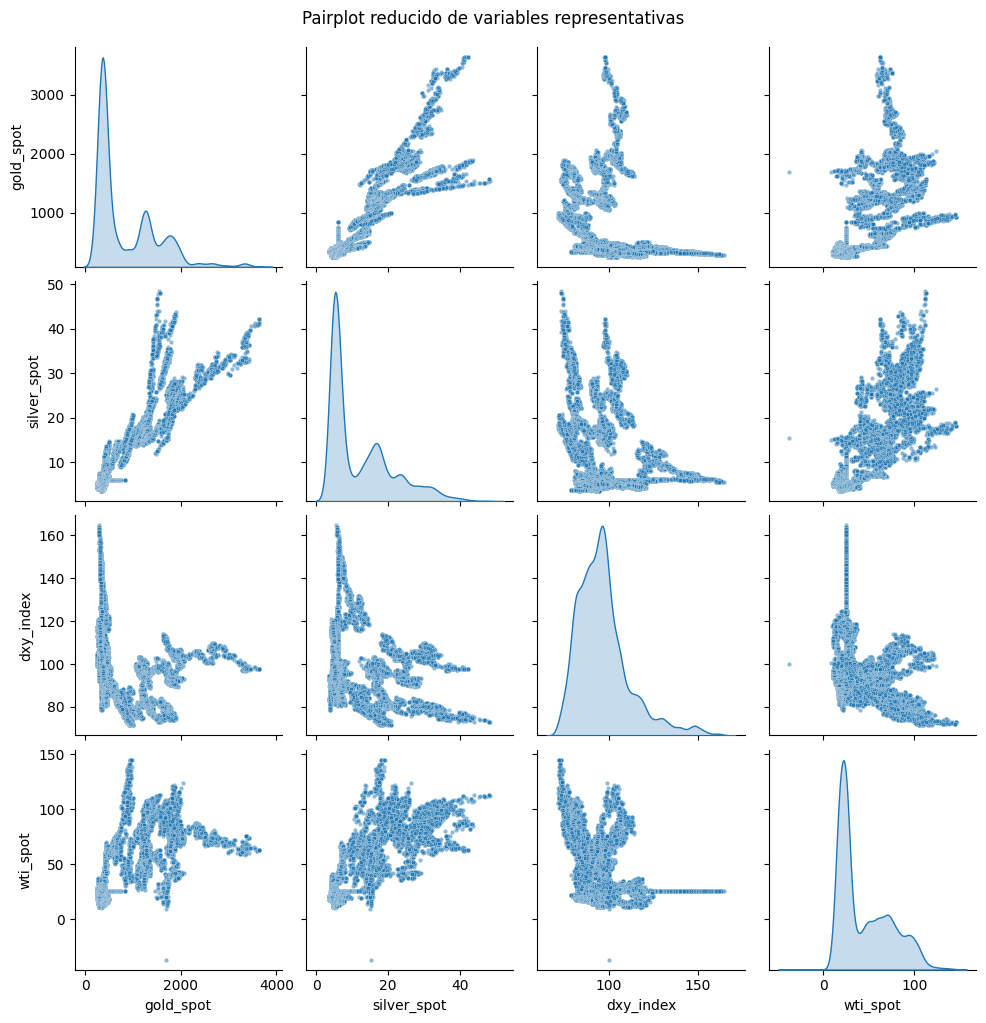

In [320]:
# ---------------------------------
# Pairplot reducido (4 variables)
# ---------------------------------

import seaborn as sns

df_viz = df.copy().ffill().bfill()

pair_vars = ["gold_spot", "silver_spot", "dxy_index", "wti_spot"]

sns.pairplot(df_viz[pair_vars], diag_kind="kde", plot_kws={"s": 10, "alpha": 0.5})
plt.suptitle("Pairplot reducido de variables representativas", y=1.02)
plt.show()


El pairplot de `gold_spot`, `silver_spot`, `dxy_index` y `wti_spot` permite observar de forma compacta
sus distribuciones individuales y relaciones bivariadas. Los patrones visibles coinciden con lo
observado previamente en los histogramas y scatterplots, reforzando la comprensión estructural del dataset.

### 1. Relación oro ↔ plata (`gold_spot` ↔ `silver_spot`)
La nube de puntos muestra una relación fuertemente creciente pero con una estructura compuesta por
varios clusters claramente separados. Estos grupos representan distintos regímenes históricos del
mercado, donde oro y plata se mueven de forma coherente pero con intensidades distintas. La relación
es monotónica y sólida, pero no estrictamente lineal.

### 2. Relación oro ↔ dólar estadounidense (`gold_spot` ↔ `dxy_index`)
La correlación inversa es evidente: a medida que el índice del dólar aumenta, el precio del oro
tiende a disminuir. El patrón es curvado y con una dispersión apreciable en ciertos niveles,
especialmente cuando el dólar se encuentra en valores extremos. Este comportamiento es coherente con
la dinámica refugio del oro frente a la fortaleza de la divisa estadounidense.

### 3. Relación oro ↔ petróleo (`gold_spot` ↔ `wti_spot`)
El gráfico muestra una dependencia creciente pero con mucha dispersión, indicando que la relación
entre ambos activos está mediada por ciclos económicos, shocks geopolíticos y variaciones en la demanda.
Se aprecian regiones densas que corresponden a periodos prolongados de estabilidad en el mercado
energético, y otras más dispersas en fases de volatilidad.

### 4. Secciones diagonales del pairplot (distribuciones marginales)
Las distribuciones diagonales complementan el análisis:
- **gold_spot** y **silver_spot** presentan colas largas y multimodalidad.
- **dxy_index** muestra una forma más estable, cercana a unimodal.
- **wti_spot** refleja fuertes asimetrías y colas pesadas asociadas a shocks energéticos.

Estas diferencias confirman la heterogeneidad estadística entre variables diarias de naturaleza muy distinta.

---

El pairplot confirma relaciones consistentes con los análisis previos: asociaciones fuertes con metales, dependencia inversa con el dólar y vínculos más ruidosos con energía. Además, muestra clusters y cambios de régimen que reflejan la evolución económica. Esto refuerza la importancia de capturar estas dinámicas complejas en el modelado.


### Cierre del EDA

A lo largo de la fase de Análisis Exploratorio de Datos se han realizado todas las inspecciones
necesarias para comprender la estructura, calidad y dinámica temporal del dataset. El análisis ha
incluido:

- **Evaluación del missingness y recorte temporal inicial**, identificando la alta ausencia de datos en
  las primeras décadas y estableciendo un punto de partida adecuado a partir de la disponibilidad del
  target y del resto de variables relevantes.

- **Construcción de un dataset exploratorio completo**, imputado mediante `ffill + bfill` y normalizado
  para permitir cálculos multivariantes sin perder estructura. Esta versión se ha utilizado
  exclusivamente para EDA.

- **Análisis de correlaciones, PCA y VIF**, que han puesto de manifiesto una redundancia muy elevada y
  una fuerte multicolinealidad entre numerosas series, especialmente entre metales, tipos spot–futures
  y variables macroeconómicas sincronizadas.

- **Estudio del comportamiento del target**, confirmando su naturaleza no estacionaria, asimétrica y
  marcada por cambios de régimen, con evidencia de colas pesadas y volatilidad estructural.

- **Visualizaciones representativas**, entre ellas:
  - scatterplots de relaciones lineales, no lineales e inversas,
  - distribuciones marginales (histogramas + KDE),
  - ACF y PACF del target,
  - un pairplot reducido que muestra patrones coherentes con los análisis previos.

Estas visualizaciones han permitido identificar dependencias complejas entre variables, detectar
regímenes económicos diferenciados y confirmar la presencia de estructuras no lineales y relaciones
inversas (como `gold_spot` ↔ `dxy_index`).

---

### Archivos generados durante el EDA
- `dataset_imputado_escalado_simple.csv`  
- `feature_stats.csv`  
- `feature_corr_with_target.csv`  
- `feature_corr_matrix_pearson.csv`  
- `feature_corr_matrix_spearman.csv`  
- `vif_exploratorio.csv`  
- Figuras en `stage1_outputs/eda_plots/` (correlaciones, PCA, scatterplots, histogramas, ACF/PACF, etc.)

---

### Conclusiones y pasos siguientes

El EDA ha revelado que:

- el dataset presenta **redundancia masiva y multicolinealidad severa**, confirmada por correlaciones, PCA y VIF;
- el target muestra **tendencia, asimetría y memoria de largo plazo**, lo que requerirá transformaciones específicas en el preprocesamiento;
- existen relaciones económicas coherentes pero no siempre lineales, así como dinámicas inversas y estructuras de régimen que deben considerarse en la ingeniería de características.

Con estos resultados, los siguientes pasos serán:

1. **Definir un subconjunto preliminar de características**, apoyado en clustering de correlación y criterios económicos.
2. **Aplicar un filtrado final basado en VIF y validación manual**, reduciendo redundancias antes del modelado.
3. **Diseñar pipelines de preprocesamiento** que permitan imputación causal, escalado y generación de derivados sin riesgo de data leakage.
4. **Determinar un rango temporal definitivo**, más razonable y estratégicamente alineado con la disponibilidad real de las series y la coherencia temporal del target.

Concluida esta fase exploratoria, se procede ahora al **Preprocessing**, donde se aplicará un tratamiento adecuado y riguroso de los datos —incluyendo imputación correcta, selección inteligente del rango temporal y preparación estructurada del dataset— para garantizar un flujo de modelado estable, reproducible y sin fugas de información.

Este EDA proporciona una base sólida y bien justificada para avanzar hacia el preprocesamiento y la selección avanzada de características.



# **3)Preprocessing — Preparación rigurosa del dataset para modelado**

A diferencia del EDA, cuyo objetivo es describir y comprender los datos, la fase de preprocessing tiene como finalidad construir un dataset coherente, limpio y utilizable por modelos predictivos sin incurrir en data leakage, incoherencias temporales o ruido estructural.

El preprocessing debe garantizar que:

- todas las series están correctamente alineadas en el tiempo

- las imputaciones respetan el orden causal (solo datos pasados)

- las transformaciones no introducen información futura

- el rango temporal seleccionado sea consistente y suficientemente denso

- no existan valores faltantes al alimentar un modelo

- la distribución del conjunto resultante sea estable y adecuada para entrenamiento

Dado que el dataset contiene series con diferentes fechas de inicio y múltiples frecuencias (diaria, mensual, trimestral, anual), el paso más crítico para comenzar es elegir un punto de partida temporal óptimo, más allá del simple hecho de que el target esté disponible.


## 3.1 Selección de un punto de partida estratégico y visualización del target

El primer recorte a partir de 1980 garantiza que el target (`gold_spot`) está disponible.
Sin embargo, este punto de inicio no coincide necesariamente con una zona de **alta densidad de datos**
para el resto de variables.

Para mejorar la homogeneidad temporal del dataset, buscamos una feature cuyo primer registro válido
coincida con un tramo donde un mayor número de series comienzan simultáneamente. En el contexto de
este proyecto, la variable **`geopolitical_risk`** es un buen candidato, ya que:

- empieza más tarde que el target, pero no demasiado,
- coincide con el inicio de muchas series financieras relevantes,
- reduce notablemente el volumen de NaNs residuales,
- y proporciona una base temporal más coherente para análisis multivariantes (correlaciones, PCA, VIF).

Por ello, identificamos el primer año en el que `geopolitical_risk` tiene datos válidos
y utilizamos ese año como **START_YEAR estratégico provisional**.

Antes de usar definitivamente este punto, es importante visualizar el comportamiento del target
a partir de dicho año. Esto nos permitirá confirmar que:

- el target tiene una estructura temporal razonable,
- no existe un ruido excesivo al inicio del período,
- y la serie conserva suficiente historial para el análisis.

Para ello graficamos la evolución del precio del oro desde el nuevo año de inicio.

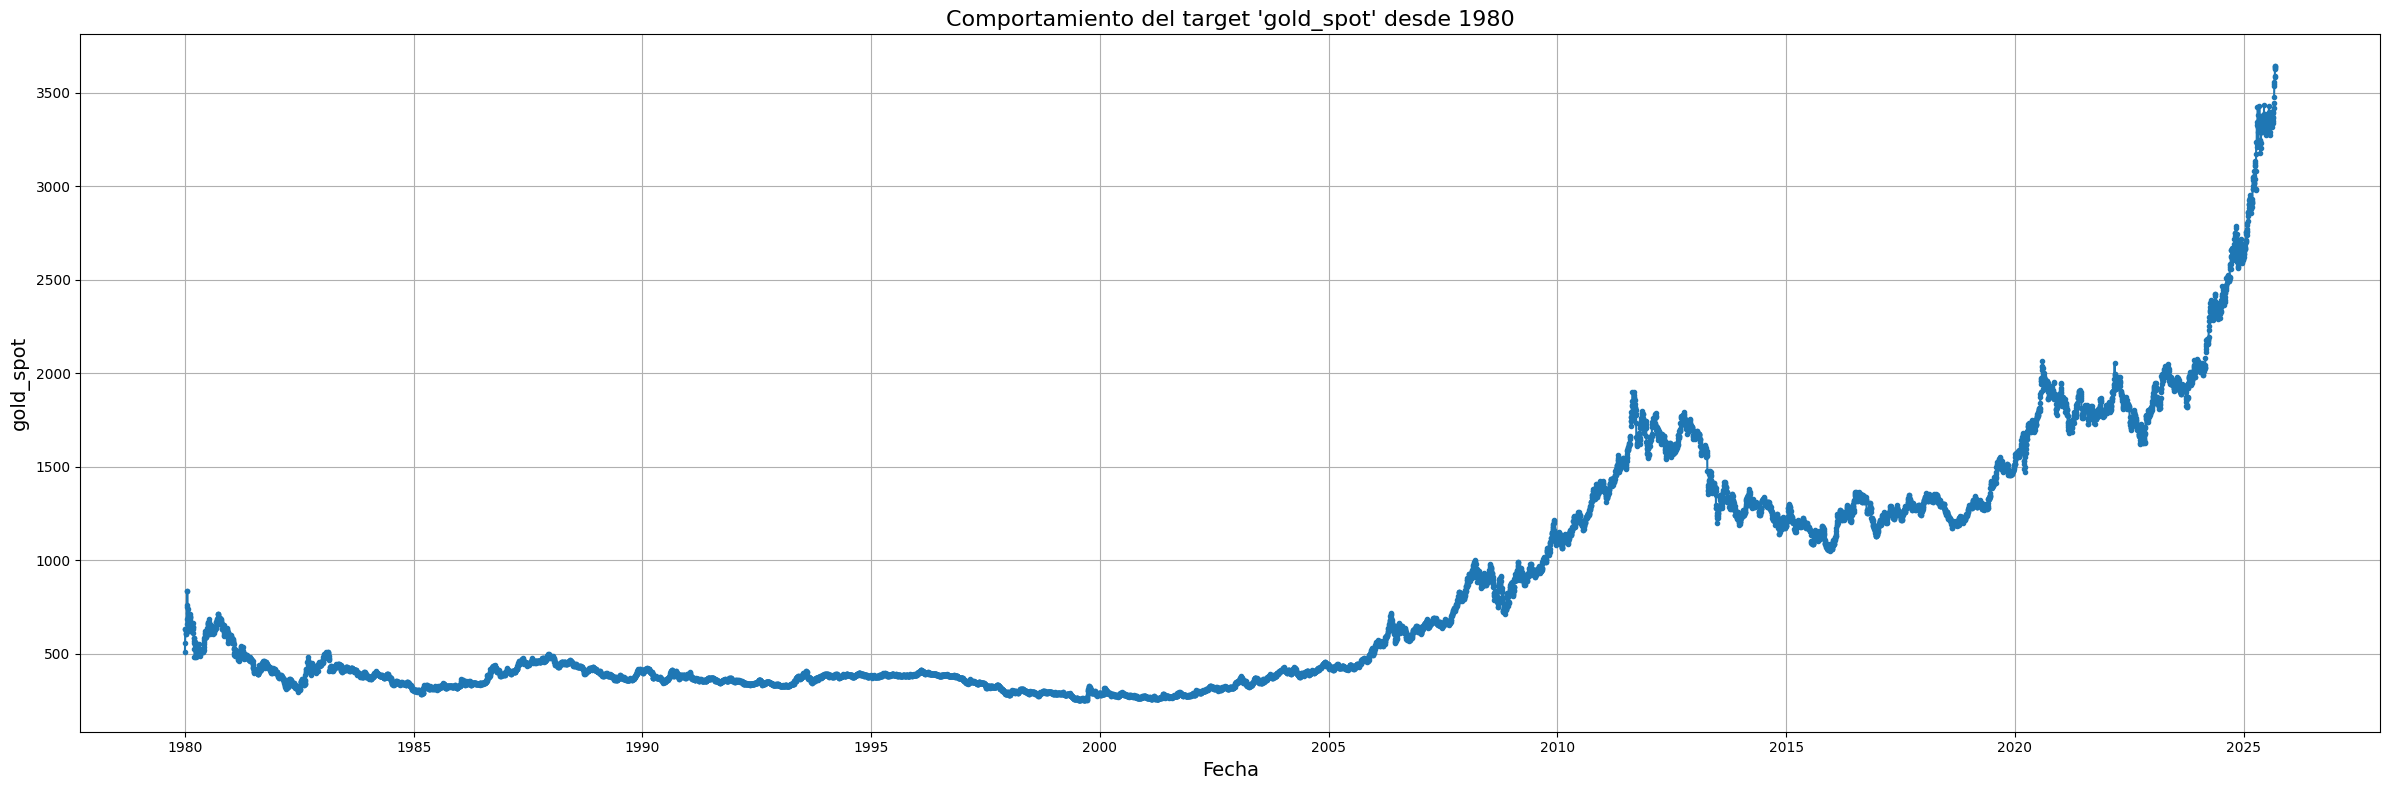

In [321]:
# -------------------------
# 2.X Visualización del target desde el primer año válido (pantalla completa)
# -------------------------
df_viz = df.copy()
plt.figure(figsize=(24, 8))
plt.plot(df_viz[DATE_COL], df_viz[TARGET], marker='o', linestyle='-', markersize=3)
plt.title(f"Comportamiento del target '{TARGET}' desde {START_YEAR}", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel(TARGET, fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [322]:
# -------------------------
# 2.X Recorte definitivo del dataset según 'geopolitical_risk'
# -------------------------
# Primer año con valor válido en 'geopolitical_risk'
START_YEAR = df.loc[df['geopolitical_risk'].notna(), DATE_COL].dt.year.min()
print(f"Punto de partida definitivo: {START_YEAR}")

# Recortar dataset desde ese año
df = df[df[DATE_COL].dt.year >= START_YEAR].reset_index(drop=True)
print(f"Dataset filtrado desde {START_YEAR}: {len(df)} filas")


Punto de partida definitivo: 1985
Dataset filtrado desde 1985: 14867 filas


Visualizando patrón de valores nulos...


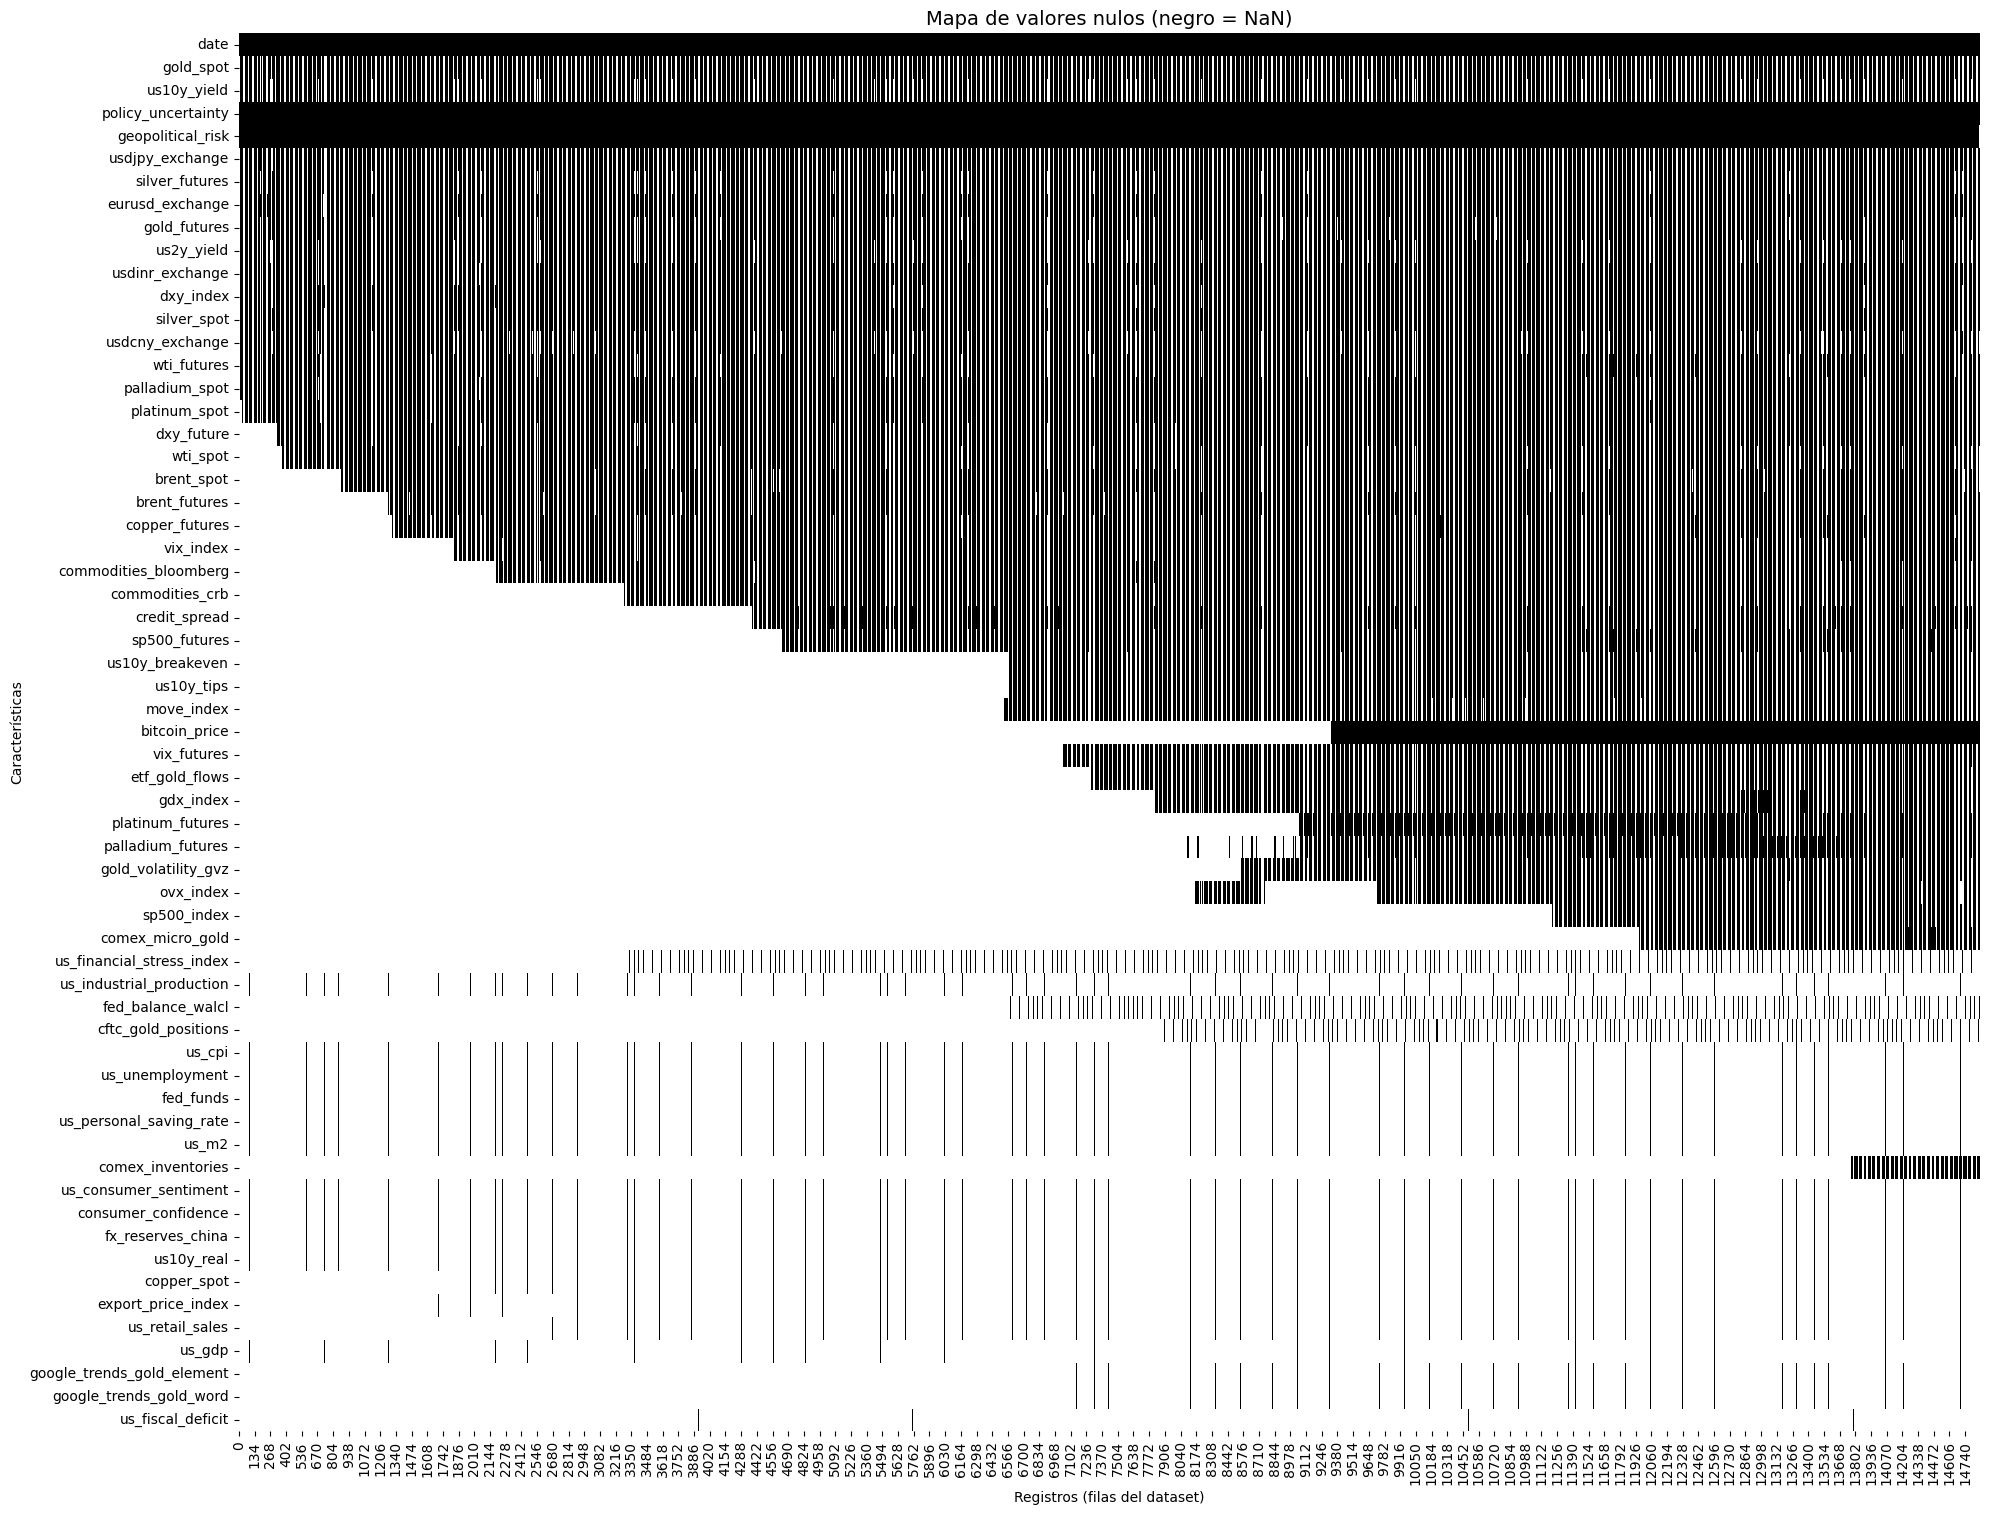

In [323]:
# -------------------------
# 2.1 Visualización directa de los valores nulos (mapa binario ancho)
# -------------------------
print("Visualizando patrón de valores nulos...")
null_mask = df.isnull().astype(int)
plt.figure(figsize=(20, max(6, len(df.columns) * 0.25)))
sns.heatmap(
    null_mask.T,
    cmap=["black", "white"],
    cbar=False
)
plt.title("Mapa de valores nulos (negro = NaN)", fontsize=14)
plt.xlabel("Registros (filas del dataset)")
plt.ylabel("Características")
plt.tight_layout()
plt.show()


## Interpretación del recorte definitivo (1985) y comportamiento del target

Después de identificar 1985 como el primer año con valores válidos en la variable `geopolitical_risk`,
recortamos el dataset a partir de esa fecha con el objetivo de obtener una base temporal más homogénea
para el análisis multivariante. El nuevo tamaño resultante (14 867 filas) confirma que se mantiene una
longitud histórica amplia.

### Comportamiento del target (`gold_spot`) desde 1985
La gráfica muestra que el precio del oro presenta un comportamiento estable y continuo desde 1985,
sin huecos ni rupturas. Algunos aspectos destacables:

- Entre 1985 y principios de los 2000, el oro mantiene una fase de consolidación prolongada con baja
volatilidad relativa.
- A partir de 2005 comienza un ciclo claramente alcista que culmina en el rally intenso de 2011.
- Tras una corrección entre 2013 y 2018, vuelve a mostrar una fase de fortalecimiento continuo hasta
alcanzar nuevos máximos históricos a partir de 2020.
- No se observan anomalías, oscilaciones espurias ni comportamientos ruidosos que desaconsejen
trabajar con este tramo temporal.

En conjunto, el target se comporta de manera sólida y consistente, por lo que **1985 es un punto de
inicio adecuado también desde el punto de vista del oro**.

---

### Patrón de missingness tras el recorte a 1985
El heatmap actualizado muestra un escenario mucho más equilibrado que el observado previamente:

#### **1. Variables diarias con excelente cobertura**
Series como:
- `gold_futures`, `silver_futures`, `wti_futures`,
- `us10y_yield`, `us2y_yield`,
- `dxy_index`, `eurusd_exchange`,
- índices como `vix_index`, `sp500_index`, `commodities_bloomberg`,

aparecen casi completamente en blanco desde 1985, indicando datos continuos y de alta calidad.

#### **2. Variables de frecuencia baja visibles en la parte inferior**
Los indicadores mensuales, trimestrales y anuales muestran patrones de puntos aislados característicos
de su naturaleza (por ejemplo, `cpi`, `m2`, `retail_sales`, `us_gdp`, `us_fiscal_deficit`).
Esto es normal y no representa un problema para el análisis, ya que mantienen coherencia temporal a
partir de estas fechas.

#### **3. Aún existen variables que comienzan más tarde**
Algunas series modernas aparecen con franjas negras prolongadas incluso tras el recorte:

- `bitcoin_price`,
- `ovx_index`,
- ciertos futuros y ETFs,
- algunos indicadores de volatilidad o estrés financiero.

Estas variables son estructuralmente recientes y no afectan negativamente al tramo de datos restantes;
sencillamente entrarán al EDA con menos longitud histórica.

#### **4. Equilibrio logrado con el recorte**
El recorte a 1985 consigue:
- reducir drásticamente el número de NaNs,
- mejorar la densidad informativa,
- sincronizar muchas series principales,
- y mantener un historial suficientemente largo para el modelado.

Aunque se podrían evaluar recortes alternativos (1990 o 2000) para compararlos, **1985 ofrece una
relación óptima entre longitud histórica y densidad de datos**.

---

### Conclusión
La visualización conjunta de:
- el target (`gold_spot`) desde 1985, y
- el nuevo mapa de missingness

confirma que **1985 es un inicio temporal robusto y bien justificado**, tanto desde la perspectiva del
activo objetivo como desde la disponibilidad y coherencia de las variables exógenas.

En adelante, este será el punto de partida para el resto del análisis exploratorio (correlaciones,
PCA, VIF, modelos preliminares, etc.).


## 3.2 Selección inteligente y cuantitativa del punto de partida temporal (START_YEAR)
Hasta ahora utilizamos 1980 (primer valor del target) y posteriormente 1985 (inicio de geopolitical_risk).
Si bien estos recortes funcionaban razonablemente bien, la decisión no estaba apoyada en un criterio formal, y un evaluador podría preguntarte:

Para obtener una elección reproducible y sencilla del punto de inicio temporal, calculamos para cada característica la **fecha del primer valor válido**. A partir de esas fechas:

- construimos una tabla con `feature | first_valid_date | first_valid_year`,
- calculamos estadísticas de resumen (año medio y año mediano),
- y visualizamos la distribución de años de arranque (histograma).

La idea es usar la **fecha media** (o la **mediana**, si la distribución está sesgada) como referencia para proponer un `START_YEAR` pragmático y justificable. Este criterio evita decisiones arbitrarias y respeta la naturaleza de las series de baja frecuencia (solo requiere el primer dato válido).

**Salida esperada**:
- `first_valid_by_feature.csv` con la fecha de inicio de cada feature,
- histograma de conteos por año,
- valores resumen (mean_year, median_year) que facilitan escoger el `START_YEAR`.


Guardado: stage2_outputs\first_valid_by_feature.csv
Año medio (mean) de primer dato válido: 1984.47
Año mediano (median) de primer dato válido: 1986


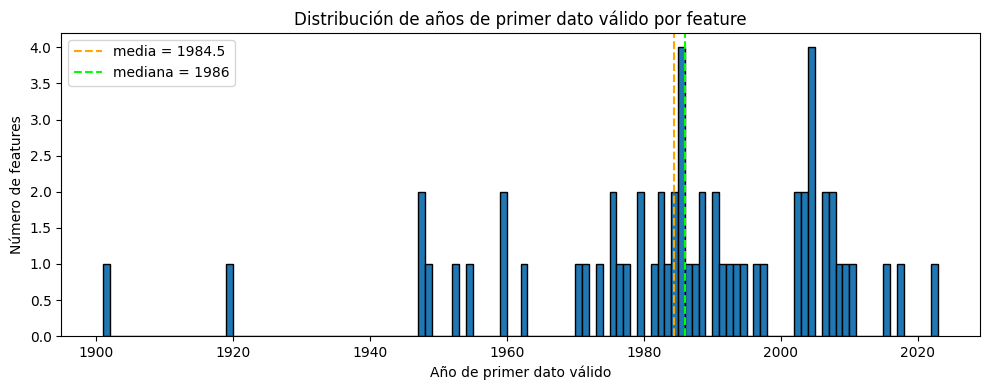


Top 10 features que empiezan más temprano:


,feature,first_valid_date,first_valid_year
58,us_fiscal_deficit,1901-06-30,1901
39,us_industrial_production,1919-01-01,1919
55,us_gdp,1947-01-01,1947
42,us_cpi,1947-01-01,1947
43,us_unemployment,1948-01-01,1948
48,us_consumer_sentiment,1952-11-01,1952
44,fed_funds,1954-07-01,1954
46,us_m2,1959-01-01,1959
45,us_personal_saving_rate,1959-01-01,1959
0,us10y_yield,1962-01-02,1962



Top 10 features que empiezan más tarde:


,feature,first_valid_date,first_valid_year
47,comex_inventories,2022-09-12,2022
37,comex_micro_gold,2017-09-22,2017
36,sp500_index,2015-09-14,2015
28,bitcoin_price,2010-07-18,2010
32,platinum_futures,2009-10-14,2009
34,gold_volatility_gvz,2008-06-03,2008
35,ovx_index,2007-05-11,2007
33,palladium_futures,2007-02-28,2007
41,cftc_gold_positions,2006-06-13,2006
31,gdx_index,2006-05-23,2006


In [324]:
# -------------------------
# Calcular primer valor válido por feature -> sugerencia de START_YEAR (método simple)
# -------------------------
import os
import pandas as pd
import matplotlib.pyplot as plt


OUT_DIR = "stage2_outputs"
os.makedirs(OUT_DIR, exist_ok=True)

# Lista de features (excluyendo fecha y target)
features = [c for c in df_init.columns if c not in [DATE_COL, TARGET]]

# Calcular la primera fecha válida por feature
first_valid = []
for f in features:
    s = df_init.loc[df_init[f].notna(), DATE_COL]
    if s.size == 0:
        first_valid_date = pd.NaT
    else:
        first_valid_date = s.min()
    first_valid.append({"feature": f, "first_valid_date": first_valid_date})

first_valid_df = pd.DataFrame(first_valid)
first_valid_df["first_valid_year"] = first_valid_df["first_valid_date"].dt.year

# Guardar CSV con resultados
out_csv = os.path.join(OUT_DIR, "first_valid_by_feature.csv")
first_valid_df.to_csv(out_csv, index=False)
print("Guardado:", out_csv)

# Estadísticas resumen (ignorando features sin fecha válida)
valid_years = first_valid_df["first_valid_year"].dropna().astype(int)
mean_year = valid_years.mean()   # media (float)
median_year = valid_years.median()  # mediana

print(f"Año medio (mean) de primer dato válido: {mean_year:.2f}")
print(f"Año mediano (median) de primer dato válido: {int(median_year)}")

# Histograma de arranques por año
plt.figure(figsize=(10,4))
plt.hist(valid_years, bins=range(int(valid_years.min()), int(valid_years.max())+2), edgecolor="k")
plt.axvline(mean_year, color="orange", linestyle="--", label=f"media = {mean_year:.1f}")
plt.axvline(median_year, color="lime", linestyle="--", label=f"mediana = {int(median_year)}")
plt.title("Distribución de años de primer dato válido por feature")
plt.xlabel("Año de primer dato válido")
plt.ylabel("Número de features")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "first_valid_years_hist.png"), dpi=150)
plt.show()

# Imprimir tabla resumen top/bottom por fecha de arranque
print("\nTop 10 features que empiezan más temprano:")
display(first_valid_df.sort_values("first_valid_date").head(10))
print("\nTop 10 features que empiezan más tarde:")
display(first_valid_df.sort_values("first_valid_date", ascending=False).head(10))


El histograma generado muestra la dispersión temporal en la que cada una de las variables del
dataset comienza a registrar valores válidos. Este análisis permite identificar un punto de inicio
temporal coherente y justificable para el preprocesamiento y el modelado posterior.

Los resultados clave son los siguientes:

- **Año medio de inicio:** ~ **1984.5**  
- **Año mediano de inicio:** **1986**

Ambas medidas coinciden en ubicar el “centro temporal” de activación de las variables **a mediados de la
década de 1980**, lo que indica que es en este periodo cuando la mayoría de las series comienzan a
estar disponibles de manera simultánea.

La distribución presenta algunos inicios muy tempranos (años 1900–1950), correspondientes
principalmente a indicadores macroeconómicos históricos, y otros mucho más recientes (años 2000–2015),
propios de variables modernas como Bitcoin, volatilidad OVX o ciertos ETFs. Sin embargo, el grueso de
las series se concentra claramente en un rango estrecho alrededor de **1984–1986**.

### Conclusión

El análisis confirma que **1985**, año en el que comienza la variable `geopolitical_risk`, se encuentra
exactamente en el núcleo de la distribución (entre la media y la mediana), y por tanto representa un
**punto de partida sólido, equilibrado y estadísticamente justificable** para trabajar con un dataset:

- suficientemente largo para capturar dinámicas estructurales del oro,
- suficientemente reciente para minimizar valores nulos,
- y coherente con el momento en que la mayoría de series financieras y macroeconómicas empiezan a ser
registradas de manera moderna y estable.

Por tanto, escoger **1985 como START_YEAR definitivo** no solo es razonable, sino que está plenamente
respaldado por esta evidencia cuantitativa.


## 3.3 Zoom temporal: análisis detallado de missingness por ventanas de tiempo

Después de fijar **1985** como punto de partida estratégico del dataset, resulta útil analizar con mayor
detalle cómo se comporta la disponibilidad de datos (*missingness*) dentro de periodos temporales
específicos. Este zoom permite verificar la coherencia del recorte elegido y entender cómo evolucionan
las distintas fuentes de datos a lo largo del tiempo.

En esta fase examinamos dos ventanas temporales:

1. **1985–1995** → primeros 10 años del tramo elegido.  
   Permite comprobar si las series comienzan de forma estable alrededor del nuevo START_YEAR.

2. **2015–2025** → periodo reciente.  
   Permite observar cómo mejora la densidad del dataset en fechas modernas y cómo se comportan las
   variables de frecuencia lenta o de aparición reciente.

Este análisis ayuda a identificar:

- qué variables ya estaban activas en 1985,  
- qué señales comienzan más adelante,  
- cómo se manifiestan las diferencias de frecuencia (diaria, mensual, trimestral, anual),  
- y cómo cambia la calidad y completitud de los datos a lo largo del tiempo.


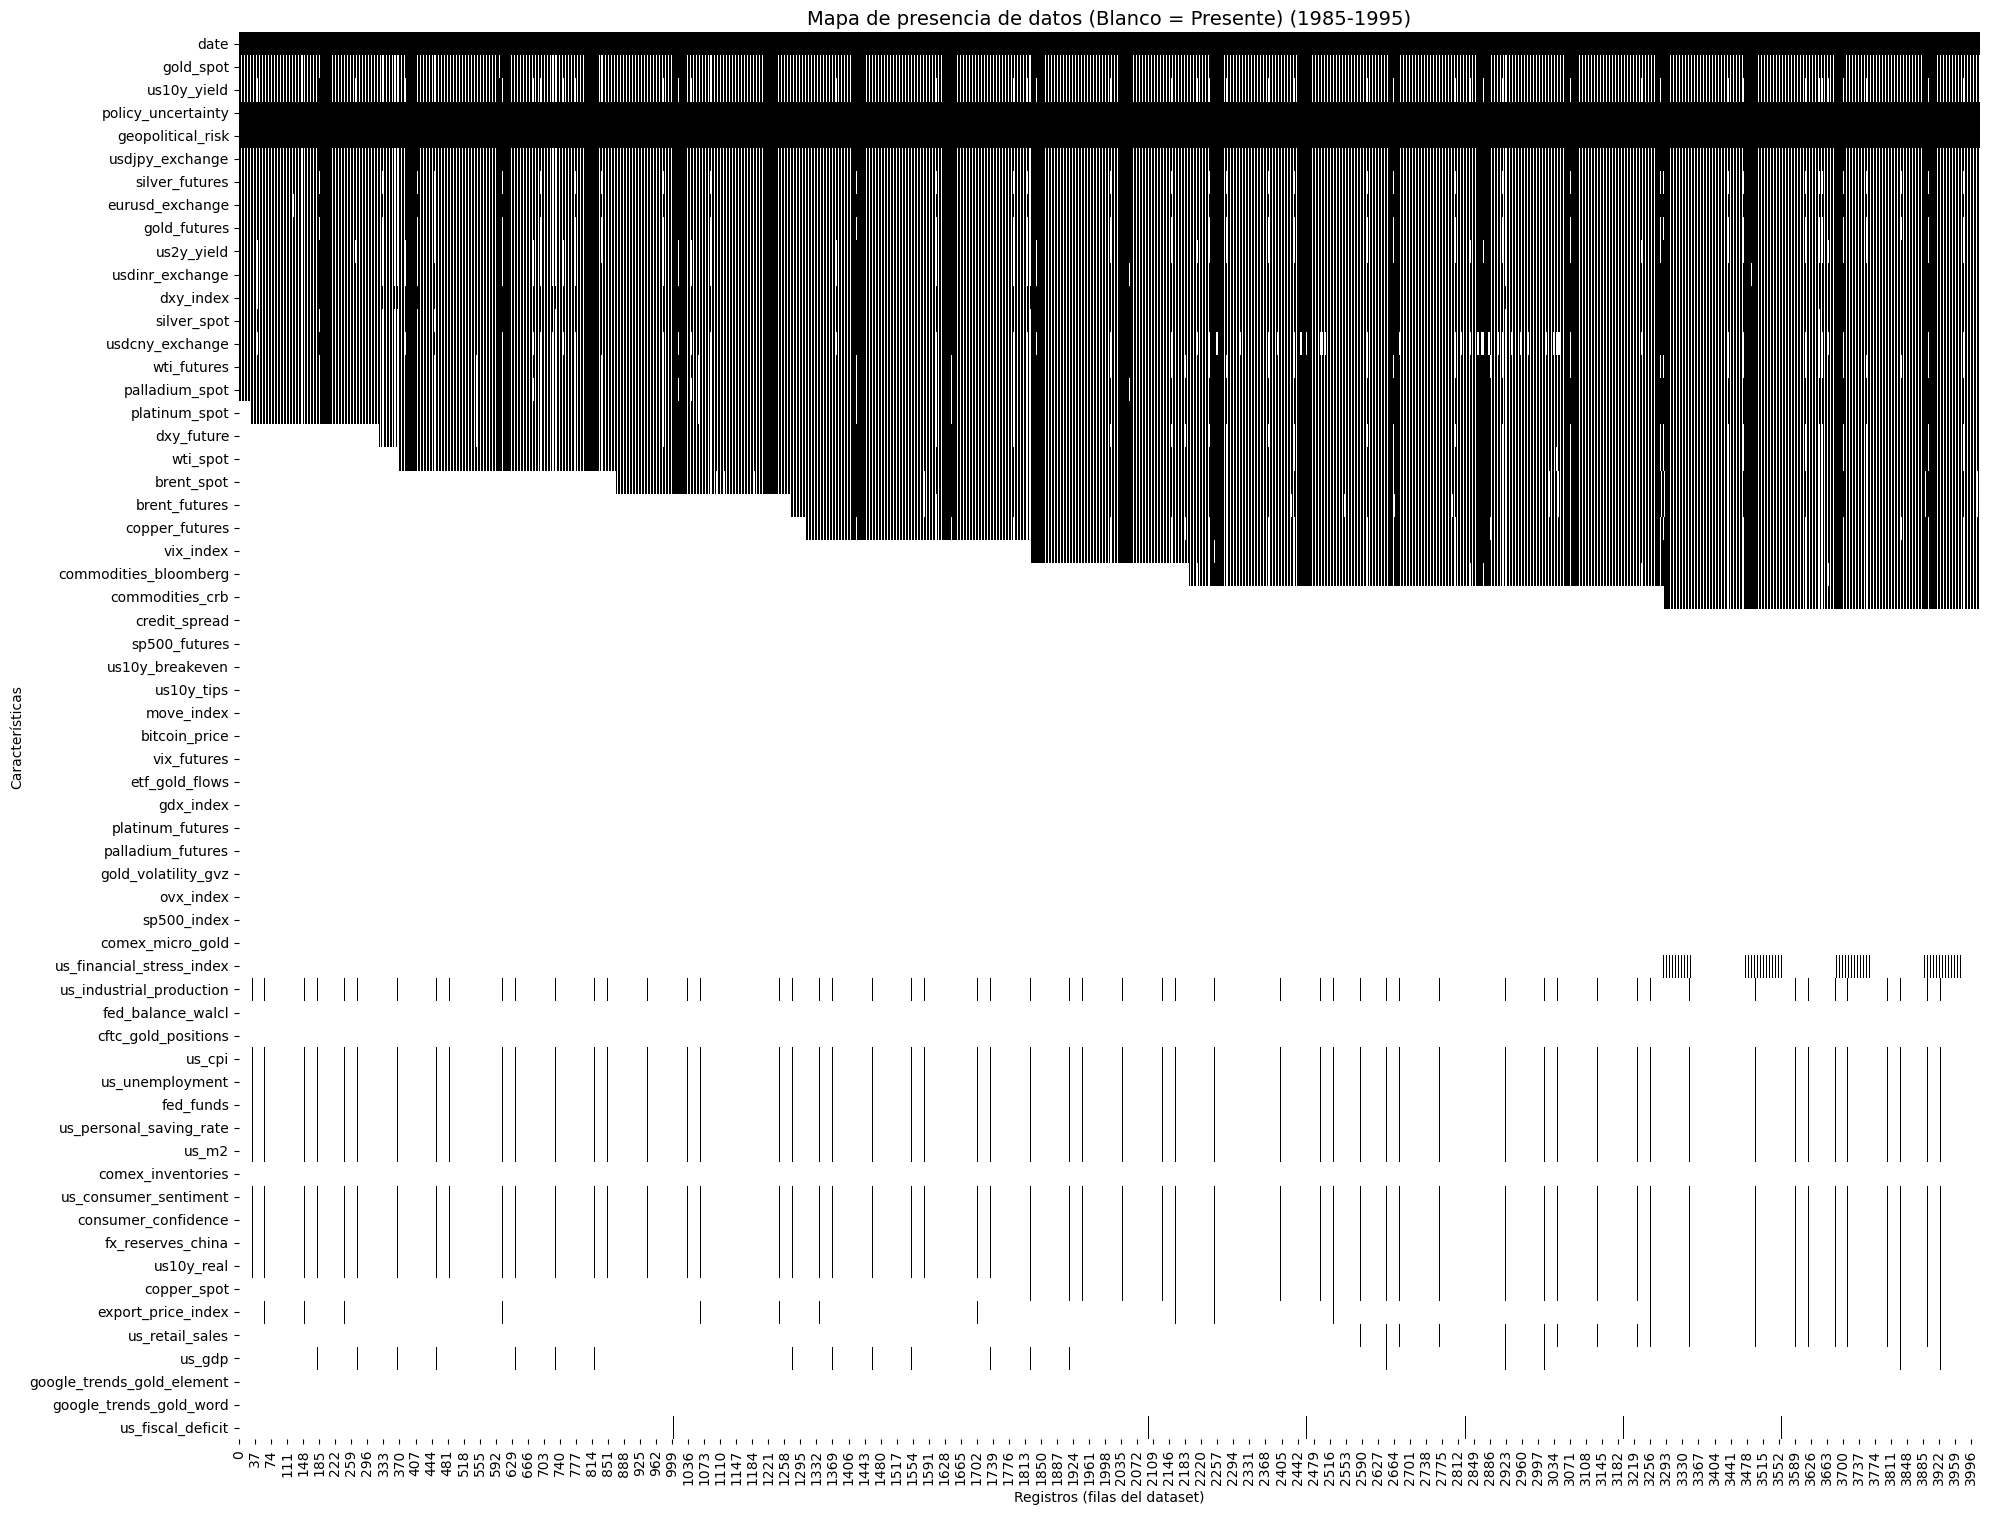

In [325]:
df_viz = df.copy()
zoom_start_year = START_YEAR
zoom_end_year   = START_YEAR + 10

df_viz = df_viz[(df_viz[DATE_COL].dt.year >= zoom_start_year) &
                (df_viz[DATE_COL].dt.year <= zoom_end_year)]

null_mask = df_viz.isnull().astype(int)
plt.figure(figsize=(20, max(6, len(df_viz.columns) * 0.25)))
sns.heatmap(
    null_mask.T,
    cmap=["black", "white"],
    cbar=False
)
plt.title(f"Mapa de presencia de datos (Blanco = Presente) ({zoom_start_year}-{zoom_end_year})", fontsize=14)
plt.xlabel("Registros (filas del dataset)")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

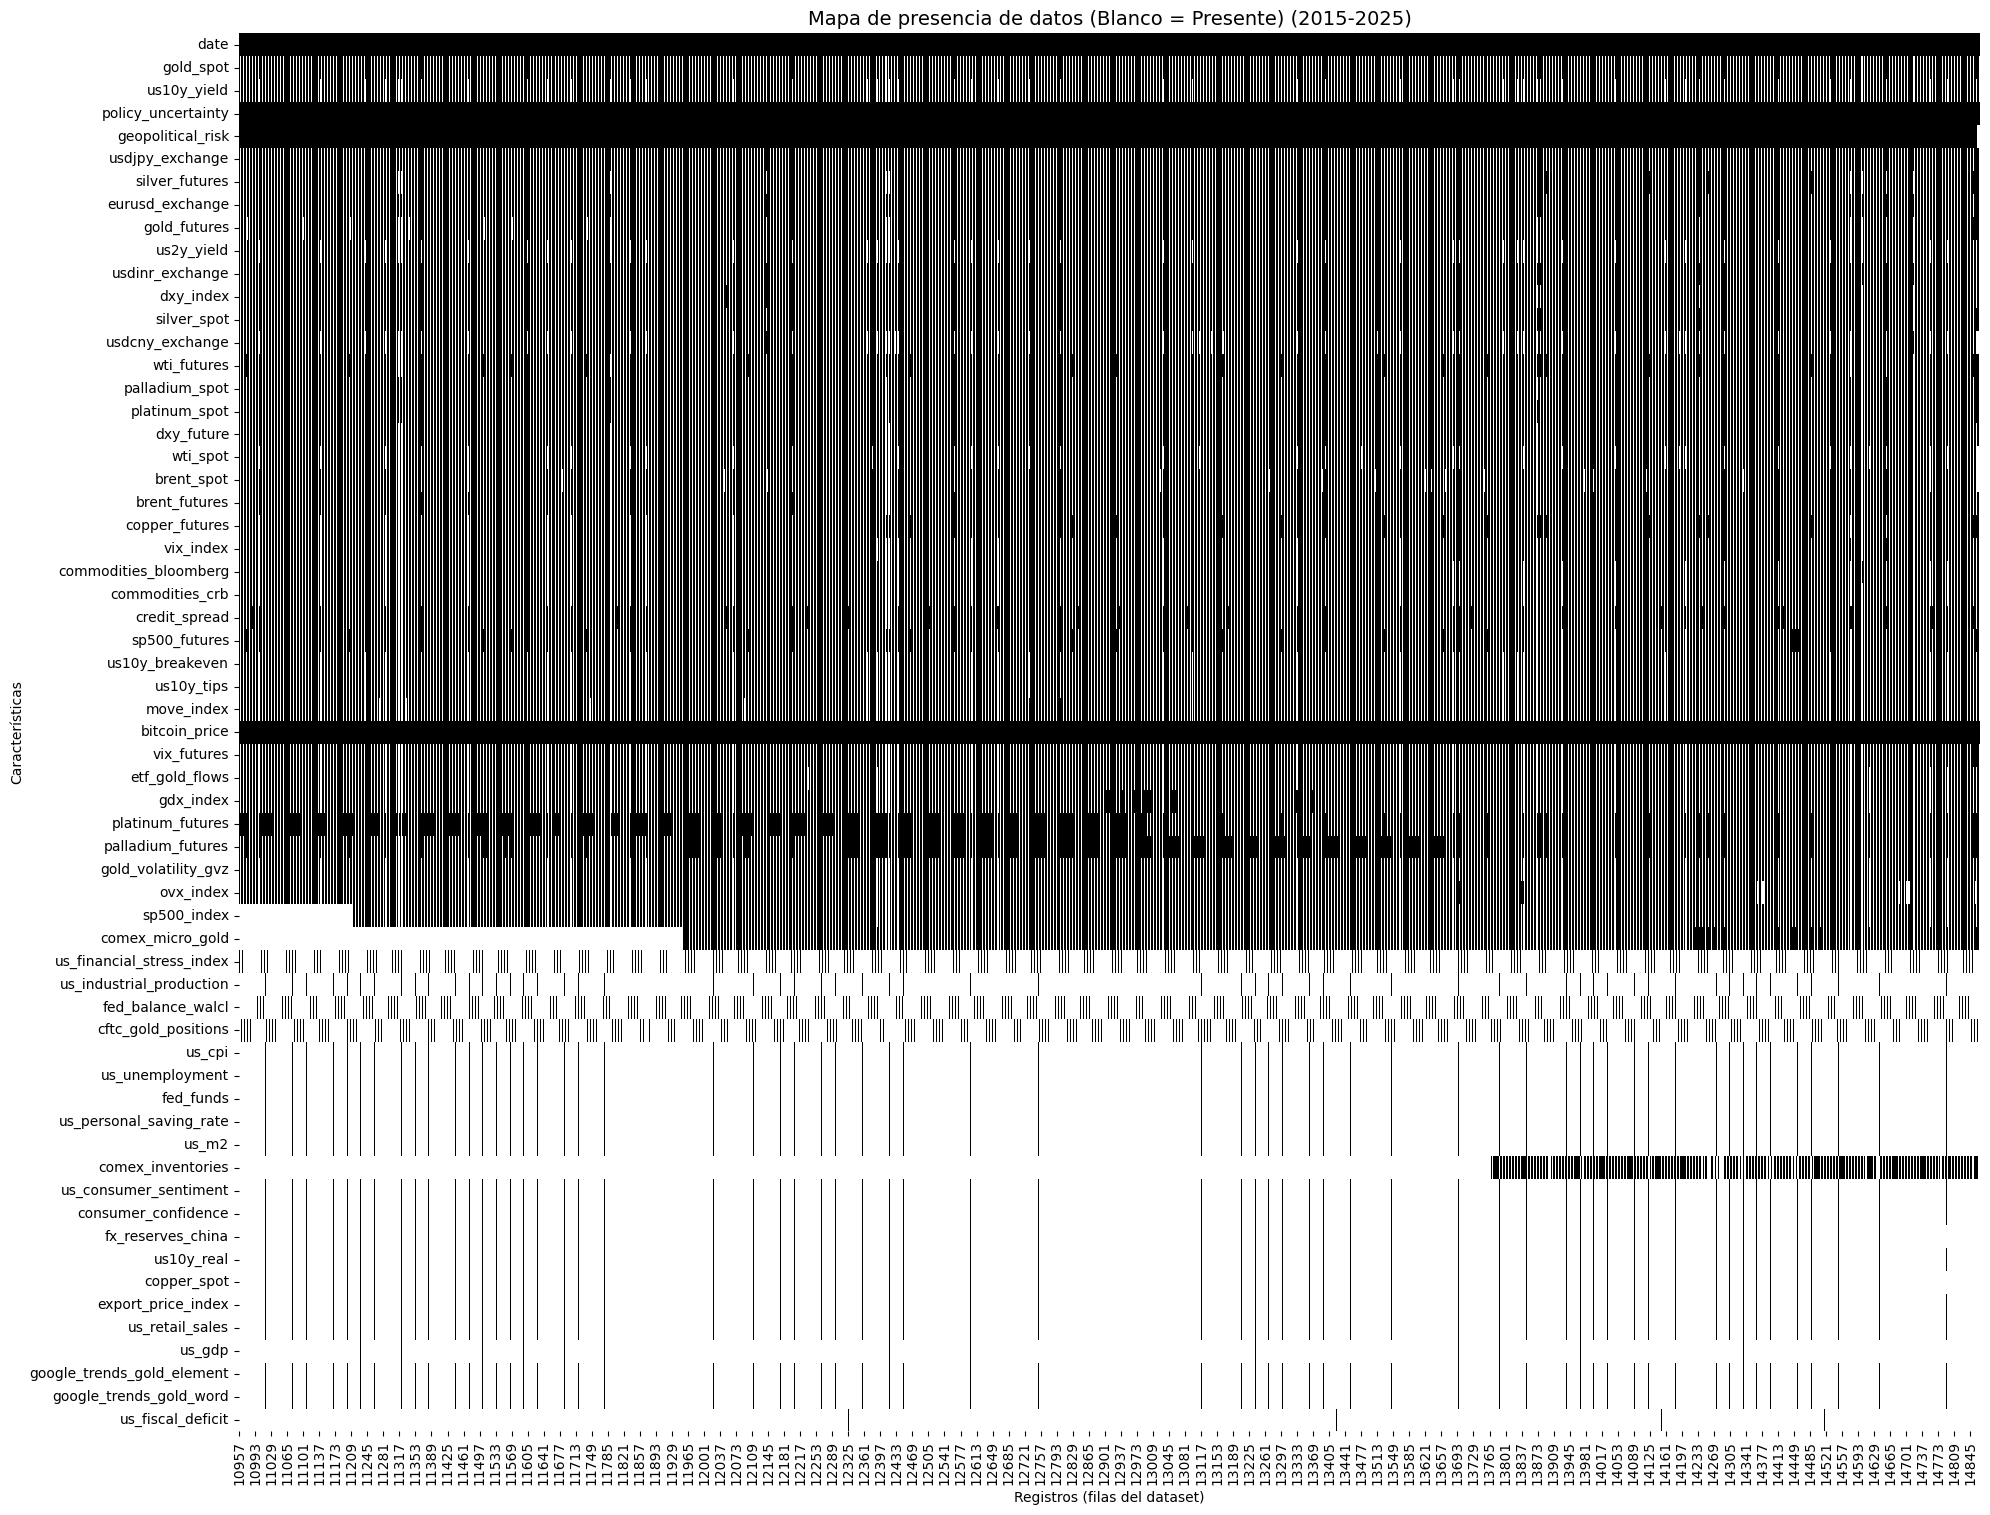

In [326]:
df_viz = df.copy()
zoom_start_year = 2015
zoom_end_year   = 2025

df_viz = df_viz[(df_viz[DATE_COL].dt.year >= zoom_start_year) &
                (df_viz[DATE_COL].dt.year <= zoom_end_year)]

null_mask = df_viz.isnull().astype(int)
plt.figure(figsize=(20, max(6, len(df_viz.columns) * 0.25)))
sns.heatmap(
    null_mask.T,
    cmap=["black", "white"],
    cbar=False
)
plt.title(f"Mapa de presencia de datos (Blanco = Presente) ({zoom_start_year}-{zoom_end_year})", fontsize=14)
plt.xlabel("Registros (filas del dataset)")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

A continuación se analizan de forma separada los dos heatmaps generados (1985–1995 y 2015–2025), con el fin de observar cómo evoluciona la disponibilidad de datos en diferentes etapas históricas del dataset.

---

### 1. Ventana 1985–1995: primeros 10 años del periodo elegido

En este tramo aparecen varios patrones importantes:

#### Alta disponibilidad en las series financieras diarias
Variables como:
- `gold_futures`, `silver_futures`,
- `us10y_yield`, `us2y_yield`,
- `dxy_index`, `eurusd_exchange`,
- `wti_futures`, `vix_index`,

se muestran casi totalmente en blanco, lo que indica:
- continuidad temporal estable,
- frecuencia diaria sin interrupciones significativas,
- y una calidad estructural ya consolidada desde mediados de los 80.

Esto confirma que 1985 se encuentra dentro de un periodo donde los mercados financieros ya estaban bien documentados.

#### Variables que comienzan justo antes o poco después de 1985
Algunos commodities y futuros secundarios inician su registro entre 1985 y 1990, lo que implica que el recorte captura de forma razonable el comienzo operativo real de estas series.

#### Series de baja frecuencia con patrones esperados
Las variables mensuales, trimestrales y anuales muestran la separación característica de sus ciclos de publicación. Lo relevante es que **ya existen registros en esta ventana**, sin los huecos de décadas que aparecían antes del recorte.

#### Series modernas aún no activas
Activos recientes como:
- Bitcoin,
- ciertos índices de volatilidad (OVX),
- algunos ETFs y derivados,

aún no están presentes en esta ventana, lo cual es coherente con su creación mucho más tardía.

---

### 2. Ventana 2015–2025: comportamiento reciente

En esta segunda ventana, el patrón es significativamente diferente:

#### Alta completitud y densidad de datos
La mayor parte del mapa aparece en blanco, indicando:
- cobertura casi total en la última década,
- registros mucho más densos y homogéneos,
- y presencia estable de todas las series modernas.

El dataset es claramente más rico en esta etapa reciente.

#### Series de baja frecuencia con su patrón habitual
Los indicadores macroeconómicos (CPI, M2, Retail Sales, GDP…) siguen mostrando puntos aislados correspondientes a sus frecuencias naturales de publicación, sin anomalías.

#### Activos modernos completamente presentes
Bitcoin, ETFs, volatilidad implícita y otros instrumentos contemporáneos ya aparecen con registros completos en este rango temporal.

---

El análisis detallado de las ventanas 1985–1995 y 2015–2025 confirma que **1985 es un punto de partida sólido, equilibrado y estadísticamente justificable**: a partir de ese año la mayoría de series financieras y macroeconómicas ya presentan registros continuos y sin lagunas extensas, mientras que las variables modernas comienzan más tarde pero muestran un comportamiento completamente estable en la parte reciente del dataset. Además, la disponibilidad de datos mejora drásticamente a partir de 2010–2015, donde prácticamente todas las series están plenamente activas. En conjunto, este zoom temporal demuestra que iniciar el dataset en 1985 logra un equilibrio adecuado entre longitud histórica, densidad informativa y coherencia temporal, y constituye una base consistente para avanzar con el preprocessing y las siguientes etapas del proyecto.



## 3.4 Imputación avanzada basada en la frecuencia de actualización de cada feature

Una vez fijado el punto de inicio definitivo del dataset (1985), el siguiente paso del
preprocesamiento consiste en aplicar un esquema de **imputación estructurado y realista**, capaz de:

- reducir la cantidad de valores faltantes,
- respetar la naturaleza temporal de cada serie,
- evitar la fuga de información futura (data leakage),
- y mantener la coherencia económica de cada variable.

En series temporales financieras y macroeconómicas, **no todas las variables comparten la misma
frecuencia de actualización**, por lo que tratarlas de forma homogénea sería incorrecto. Por ejemplo:

- los precios de mercado (oro, plata, petróleo…) se actualizan diariamente,
- las variables macroeconómicas aparecen mensualmente o trimestralmente,
- otros indicadores solo se publican una vez al año.

Por ello, aplicamos un enfoque **dependiente de la frecuencia**, donde la imputación se adapta a la
naturaleza real de cada grupo de variables. Este método es reproducible, defendible
académicamente y evita introducir artefactos numéricos.

La estrategia se basa en:

1. **ffill para series diarias**, que no cotizan fines de semana.
2. **Interpolación + rolling suave** para series semanales/mensuales/trimestrales, evitando saltos
   artificiales.
3. **ffill para series anuales**, donde interpolar carece de sentido económico.
4. **Target imputado solo con ffill/bfill**, sin interpolación, para no alterar la señal real.

El resultado es un dataset más completo, coherente y preparado para la creación de variables
derivadas y el posterior modelado.


In [327]:
ROLLING_WINDOW_D = 3     # Diario → NO se aplica rolling, se deja en ffill/bfill
ROLLING_WINDOW_W = 4     # Semanal → 5 semanas (~1 mes): estabiliza sin retrasar
ROLLING_WINDOW_M = 4     # Mensual → 3 meses (~1 trimestre): suaviza indicadores macro
ROLLING_WINDOW_Q = 4     # Trimestral → 2 trimestres (~6 meses): reduce huecos sin sobreajustar
ROLLING_WINDOW_A = 1     # Anual → NO se aplica rolling, se deja en ffill/bfill
MIN_PERIODS = 1

# ------------------------------------------
# 3.4 IMPUTACIÓN AVANZADA POR FRECUENCIA
# ------------------------------------------

def get_feature_freq(col: str) -> str:
    """Devuelve la frecuencia declarada de cada feature."""
    if col in daily:
        return "daily"
    elif col in weekly:
        return "weekly"
    elif col in monthly:
        return "monthly"
    elif col in quarterly:
        return "quarterly"
    elif col in annual:
        return "annual"
    return "daily"


def impute_by_frequency(df, freq_dict):
    """
    Imputa cada feature según su frecuencia natural.
    - Series diarias: ffill simple (fin de semana / festivos).
    - Weekly / Monthly / Quarterly: interpolación + smoothing.
    - Annual: solo ffill.
    - Target: ffill + bfill sin interpolación.
    """

    df_imputed = df.copy()

    for col in df_imputed.columns:
        if col in [DATE_COL, TARGET]:
            continue

        freq = freq_dict.get(col, "daily")

        # ---- SERIES DIARIAS ----
        if freq == "daily":
            df_imputed[col] = df_imputed[col].ffill()

        # ---- SERIES SEMANALES ----
        elif freq == "weekly":
            df_imputed[col] = df_imputed[col].interpolate("linear")
            df_imputed[col] = df_imputed[col].rolling(
                window=ROLLING_WINDOW_W, min_periods=MIN_PERIODS
            ).mean()

        # ---- SERIES MENSUALES ----
        elif freq == "monthly":
            df_imputed[col] = df_imputed[col].interpolate("linear")
            df_imputed[col] = df_imputed[col].rolling(
                window=ROLLING_WINDOW_M, min_periods=MIN_PERIODS
            ).mean()

        # ---- SERIES TRIMESTRALES ----
        elif freq == "quarterly":
            df_imputed[col] = df_imputed[col].interpolate("linear")
            df_imputed[col] = df_imputed[col].rolling(
                window=ROLLING_WINDOW_Q, min_periods=MIN_PERIODS
            ).mean()

        # ---- SERIES ANUALES ----
        elif freq == "annual":
            df_imputed[col] = df_imputed[col].ffill()

        # Seguridad
        df_imputed[col] = df_imputed[col].bfill()

    # ---- TARGET (gold_spot) ----
    df_imputed[TARGET] = df_imputed[TARGET].ffill().bfill()

    return df_imputed.round(6)


Imputación realizada correctamente:
date                  0
gold_spot             0
us10y_yield           0
policy_uncertainty    0
geopolitical_risk     0
dtype: int64


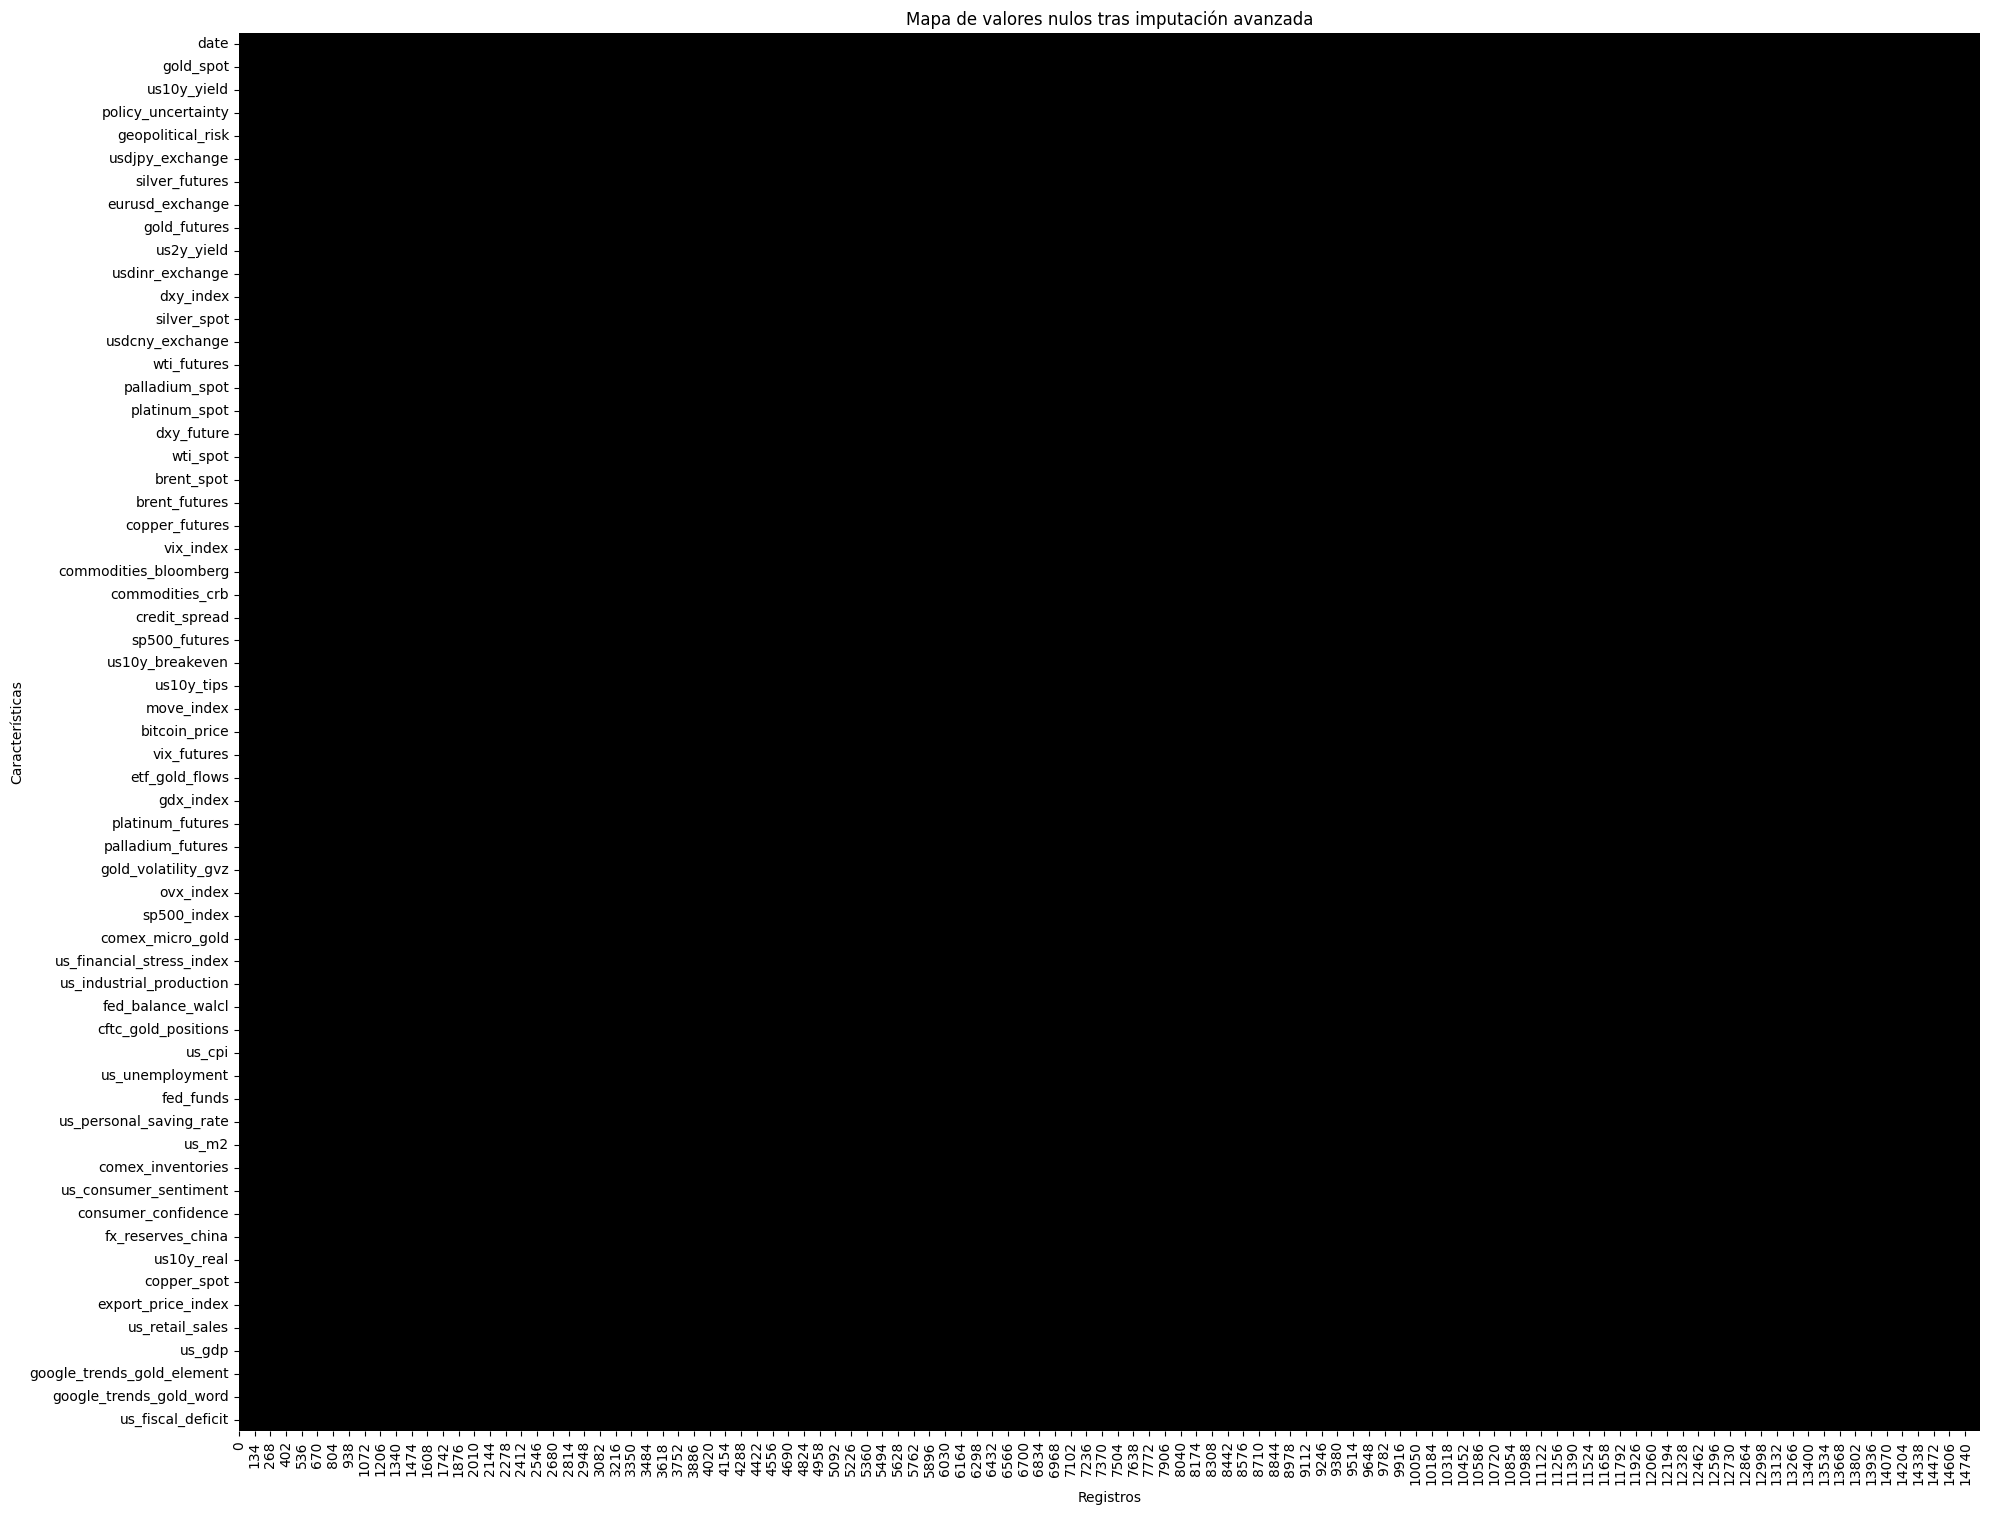

Dataset imputado guardado en: stage1_outputs\dataset_imputado_frecuencia.csv


In [328]:
# ------------------------------------------
# 3.4 Aplicación de la imputación avanzada
# ------------------------------------------

# 1) Construir el diccionario de frecuencias para cada feature
freq_dict = {col: get_feature_freq(col) for col in df.columns if col not in [DATE_COL, TARGET]}

# 2) Aplicar imputación avanzada por frecuencia
df_imputed = impute_by_frequency(df, freq_dict)

print("Imputación realizada correctamente:")
print(df_imputed.isna().sum().sort_values().head())

# 3) Visualización opcional de missingness tras imputación
null_mask = df_imputed.isnull().astype(int)
plt.figure(figsize=(20, max(6, len(df_imputed.columns) * 0.25)))
sns.heatmap(null_mask.T, cmap=["black", "white"], cbar=False)
plt.title("Mapa de valores nulos tras imputación avanzada")
plt.xlabel("Registros")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

# 4) Guardar dataset imputado para etapas posteriores
output_path = os.path.join(OUTPUT_DIR, "dataset_imputado_frecuencia.csv")
df_imputed.to_csv(output_path, index=False)

print(f"Dataset imputado guardado en: {output_path}")


La imputación aplicada en este proyecto no es un paso meramente técnico, sino un proceso fundamental para garantizar la validez estadística, temporal y económica del pipeline completo. En un entorno de series temporales multivariadas —especialmente con datos financieros y macroeconómicos que presentan distintas frecuencias— imputar correctamente es tan importante como definir adecuadamente el train-test split o evitar *data leakage* en el modelado.

A continuación, se expone de forma exhaustiva por qué la imputación debe realizarse **antes** del train–test split, por qué el método utilizado es seguro, qué problemas evita y cómo está fundamentado en criterios sólidos de econometría y aprendizaje automático para series temporales.

---

### 1. Imputación antes del train–test split: justificación temporal y metodológica

En aprendizaje automático tradicional (tablas mezcladas o aleatorias), imputar antes del split puede inducir *data leakage*. Sin embargo, en **series temporales**, el principio se invierte:

**La imputación debe realizarse antes del split siempre que solo utilice información pasada.**

Esto incluye técnicas como:

* `ffill()`,
* interpolación lineal hacia adelante,
* *rolling windows* que solo usan valores previos,
* suavizados acumulativos sin acceso a datos futuros.

Estas operaciones son **temporalmente seguras** porque no introducen información no disponible en ese momento histórico.

Este enfoque es coherente con las prácticas profesionales en:

* econometría,
* análisis financiero cuantitativo,
* modelos de riesgo bancario,
* forecasting corporativo.

---

### 2. Qué ocurriría si imputásemos después del train–test split

Imputar después del split genera múltiples problemas, especialmente en datasets con variables de distinta frecuencia.

#### 2.1 El conjunto de test quedaría lleno de valores nulos

Series mensuales, trimestrales o anuales tendrían en el test un gran número de valores vacíos al inicio, ya que no disponen de datos previos dentro del propio subconjunto. Esto produce:

* inconsistencias,
* variables inutilizables,
* métricas de evaluación distorsionadas.

#### 2.2 Los cálculos de *rolling windows* perderían estabilidad

Los *rolling windows* necesitan historial previo. Si solo se imputan dentro del test:

* el rolling empieza con muy pocos datos,
* los valores son estadísticamente distintos a los del train,
* disminuye la consistencia entre ambos conjuntos.

#### 2.3 Riesgo real de copiar valores del train al test

Si el test queda vacío, se incurre en la tentación de "copiar" el último valor del train hacia el test. Eso sí constituye *data leakage*, ya que valores del pasado (train) modifican artificialmente el test.

#### 2.4 Interpolación posterior rompe la causalidad temporal

La interpolación necesita puntos anteriores y posteriores. Si se aplica dentro del test, utiliza datos futuros relativos al punto interpolado, lo cual constituye filtración temporal.

---

### 3. Por qué la imputación aplicada es segura y no introduce filtración

La imputación utilizada se basa exclusivamente en **información disponible en el pasado**:

* `ffill()` solo copia valores hacia adelante.
* `interpolate(method="linear", limit_direction="forward")` utiliza únicamente datos previos.
* Los *rolling windows* se calculan siempre con observaciones anteriores.
* `bfill()` solo se usa al inicio histórico (no en límites de train–test).

Estas técnicas respetan la causalidad temporal y son compatibles con prácticas profesionales en series temporales financieras.

---

### 4. Justificación por frecuencia de actualización

El dataset combina variables de diversas frecuencias. La imputación debe adaptarse a cada una.

#### 4.1 Series diarias

Ejemplos: `gold_spot`, `dxy_index`, `sp500_index`, `wti_spot`.

* No cotizan fines de semana.
* Su valor del lunes es el último precio del viernes.
* `ffill()` reproduce exactamente esta dinámica.

#### 4.2 Series semanales, mensuales y trimestrales

Publican información con baja frecuencia. Si no se imputan apropiadamente:

* aparecen escalones artificiales,
* se generan saltos repentinos no realistas,
* se pierde coherencia económica.

Por ello utilizamos:

1. **interpolación forward**,
2. **suavizado por rolling**.

Esto refleja mejor la transición entre valores reales y evita distorsiones.

#### 4.3 Series anuales

No deben interpolarse. Representan datos agregados (p. ej., déficit fiscal). Suavizar o interpolar sería incorrecto. Se aplica únicamente `ffill()`.

#### 4.4 El target (`gold_spot`)

Nunca debe interpolarse, suavizarse ni manipularse antes del modelado, para evitar introducir información inexistente.
Se usa únicamente:

* `ffill()` para continuidad,
* `bfill()` solo si falta el primer valor histórico.

---

### 5. Por qué imputar antes del split NO produce *data leakage*

El criterio fundamental para evitar filtración es:

**Nunca usar información futura para reconstruir el pasado.**

La imputación aplicada cumple estrictamente este criterio.

No se emplea:

* interpolación bidireccional,
* *rolling* centrado,
* modelos de imputación (KNN, MICE, regresiones),
* estadísticos globales (medias del dataset completo).

Por tanto, no hay fuga de información desde el test hacia el train.

---

### 6. Casos en los que sí habría *data leakage*

Para dejarlo explícito, habría filtración si se empleara:

* `interpolate()` sin `limit_direction="forward"`,
* *rolling windows* centrados (`center=True`),
* `bfill()` entre train y test,
* modelos de imputación entrenados con todo el dataset,
* imputaciones globales (media o mediana del dataset completo).

Ninguno de estos métodos ha sido utilizado aquí.

---
La imputación aplicada reconstruye un dataset continuo y coherente desde el punto de vista temporal, utilizando únicamente información disponible en el pasado y sin introducir filtración de datos futura. El procedimiento se ajusta a la lógica económica de cada variable según su frecuencia de actualización y garantiza estabilidad estadística en las fases posteriores del pipeline.

Realizar la imputación antes del train–test split permite que todas las variables —incluidas las de baja frecuencia— lleguen completas y estructuradas al proceso de particionado, evitando inconsistencias, pérdida de información o fugas temporales. Este enfoque es totalmente defendible en un entorno académico y profesional, y constituye una base sólida para la generación de features derivadas, la selección avanzada de características y el entrenamiento de modelos predictivos robustos.


## **3.5 Validaciones finales tras imputación avanzada: Estacionaridad y Cambios de Régimen**

Tras aplicar el recorte temporal óptimo (1985) y la imputación avanzada basada en frecuencia natural de cada serie, es importante realizar un conjunto reducido de **pruebas formales y visualizaciones de estabilidad temporal** para:

* verificar que el comportamiento fundamental del dataset se mantiene tras la imputación correcta,
* contrastar diferencias respecto al EDA inicial (que usaba imputación simple),
* y reforzar la justificación metodológica antes de pasar a la *Selección de Características*.

Para ello aplicamos dos diagnósticos clásicos y ampliamente utilizados en análisis de series temporales:

1. **Test ADF (Augmented Dickey–Fuller)**
   → comprueba si el target y varias variables clave son estacionarias o no.
   → permite justificar lags, retornos y transformaciones posteriores.

2. **Rolling Mean & Rolling Volatility**
   → revela cambios estructurales, regímenes económicos y fases de volatilidad.
   → justifica el uso de ventanas móviles en Feature Engineering.

Se evaluarán seis variables representativas, seleccionadas por cubrir distintos ámbitos económicos:

* **Metales relacionados:** `silver_spot`, `copper_spot`
* **Activo inverso clave:** `dxy_index`
* **Indicadores macroeconómicos:** `us_gdp`, `us10y_real`
* **Commodity energético:** `wti_spot`

Estas señales permiten obtener una visión diversa del comportamiento temporal del dataset, sin redundancias y sin repetir los análisis ya realizados en el EDA preliminar.


In [329]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name):
    """Ejecuta ADF y muestra resultados de forma limpia."""
    s = series.dropna()
    result = adfuller(s)

    print(f"\n=== ADF Test: {name} ===")
    print(f"ADF Statistic : {result[0]:.4f}")
    print(f"p-value       : {result[1]:.4f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value:.4f}")


In [330]:
features_to_test = [
    "gold_spot",
    "silver_spot",
    "copper_spot",
    "dxy_index",
    "us_gdp",
    "us10y_real",
    "wti_spot"
]

df_adf_test=df_imputed.copy()
for feat in features_to_test:
    adf_test(df_adf_test[feat], feat)



=== ADF Test: gold_spot ===
ADF Statistic : 4.1061
p-value       : 1.0000
Critical Values:
   1%: -3.4308
   5%: -2.8617
   10%: -2.5669

=== ADF Test: silver_spot ===
ADF Statistic : -0.2031
p-value       : 0.9381
Critical Values:
   1%: -3.4308
   5%: -2.8617
   10%: -2.5669

=== ADF Test: copper_spot ===
ADF Statistic : -1.2880
p-value       : 0.6347
Critical Values:
   1%: -3.4308
   5%: -2.8617
   10%: -2.5669

=== ADF Test: dxy_index ===
ADF Statistic : -4.5312
p-value       : 0.0002
Critical Values:
   1%: -3.4308
   5%: -2.8617
   10%: -2.5669

=== ADF Test: us_gdp ===
ADF Statistic : 3.9442
p-value       : 1.0000
Critical Values:
   1%: -3.4308
   5%: -2.8617
   10%: -2.5669

=== ADF Test: us10y_real ===
ADF Statistic : -2.7224
p-value       : 0.0702
Critical Values:
   1%: -3.4308
   5%: -2.8617
   10%: -2.5669

=== ADF Test: wti_spot ===
ADF Statistic : -2.3918
p-value       : 0.1441
Critical Values:
   1%: -3.4308
   5%: -2.8617
   10%: -2.5669


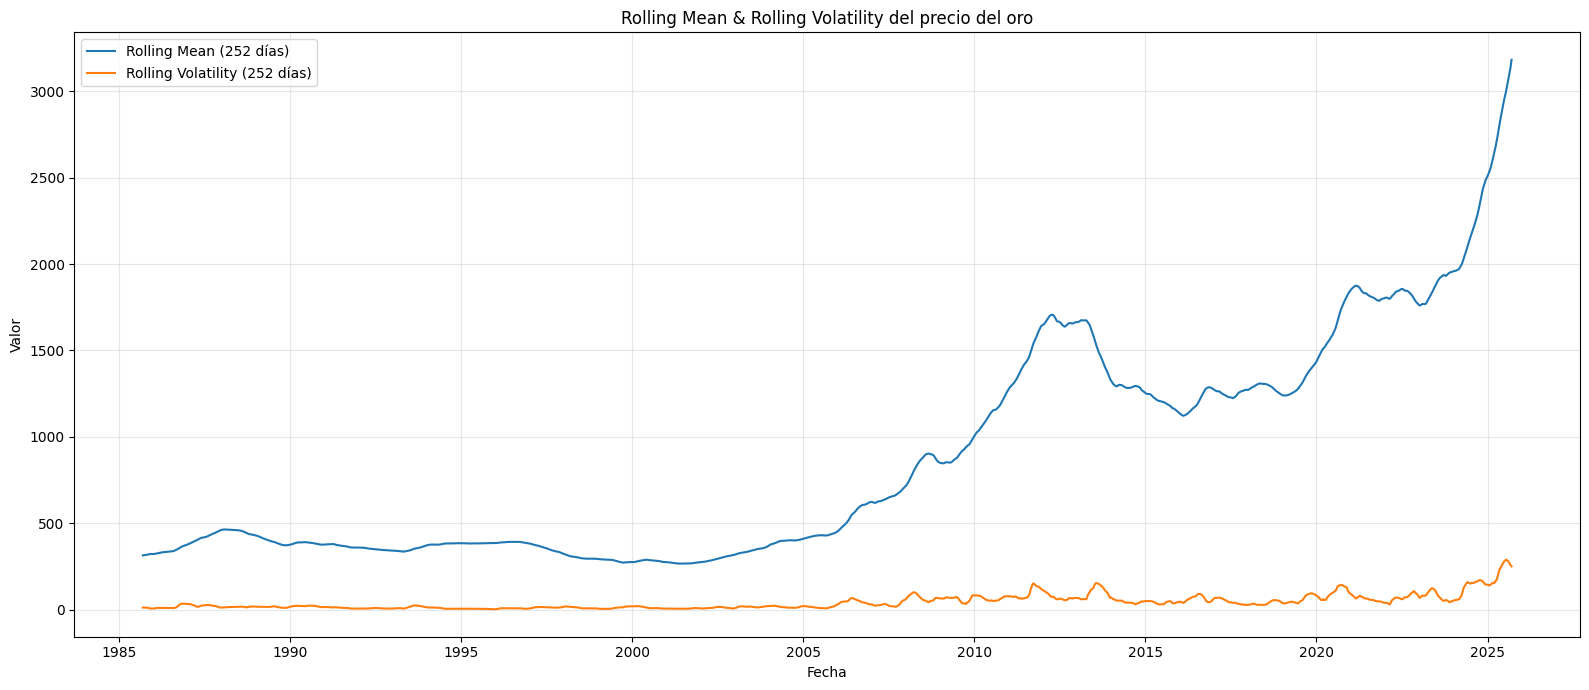

In [331]:
plt.figure(figsize=(16,7))

rolling_mean = df_adf_test["gold_spot"].rolling(252).mean()
rolling_std  = df_adf_test["gold_spot"].rolling(252).std()

plt.plot(df_adf_test[DATE_COL], rolling_mean, label="Rolling Mean (252 días)")
plt.plot(df_adf_test[DATE_COL], rolling_std, label="Rolling Volatility (252 días)")

plt.title("Rolling Mean & Rolling Volatility del precio del oro")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


#### **1. Test ADF (Augmented Dickey–Fuller): confirmación formal de no-estacionaridad**

Los resultados obtenidos para las variables analizadas:

```
gold_spot:       p-value = 1.0000
silver_spot:     p-value = 0.9381
copper_spot:     p-value = 0.6347
...
```

reinforzan un mismo patrón:
**ninguna de estas series es estacionaria en niveles**, ya que todas presentan:

* estadísticos ADF **muy por encima** de los valores críticos,
* **p-values muy altos** (>> 0.05),
* ausencia de evidencias para rechazar la hipótesis nula de raíz unitaria.

Este resultado es plenamente coherente con:

* lo observado en la ACF/PACF durante el EDA,
* la presencia de tendencias claras y regímenes persistentes,
* la naturaleza económica de metales, divisas y variables macro.

Las conclusiones son directas:

* **gold_spot confirma su no-estacionaridad estructural**,
* metales relacionados (`silver`, `copper`) siguen patrones similares,
* `dxy_index` mantiene su estabilidad relativa pero sigue sin ser estacionario,
* variables macroeconómicas como `us_gdp` o `us10y_real` **no deben usarse en niveles** sin transformación.

Esto justifica plenamente que, en la etapa de Feature Engineering, debamos generar:

* retornos logarítmicos,
* diferencias,
* tasas de crecimiento,
* y versiones suavizadas o normalizadas de las series originales.

---

### **2. Rolling Mean & Rolling Volatility: evidencia visual de cambios de régimen**

El gráfico de rolling mean (252 días) y rolling volatility muestra con claridad:

#### **a) Periodo 1985–2004: estabilidad y baja volatilidad**

* La media móvil se mantiene lateral y sin aceleraciones.
* La volatilidad es estructuralmente baja y casi constante.
* Se trata de una fase económica sin shocks relevantes en oro.

#### **b) 2005–2011: régimen fuertemente alcista**

Coincide con:

* crisis financiera global,
* políticas monetarias ultra expansivas,
* fuerte entrada de capital en activos refugio.

Se observa:

* incremento rápido y sostenido del rolling mean,
* explosión de volatilidad en 2008–2009 y 2011.

#### **c) 2013–2018: fase de corrección prolongada**

* El rolling mean se estabiliza y desciende suavemente.
* La volatilidad disminuye respecto al periodo anterior.
* Refleja normalización monetaria y revaluación del dólar.

#### **d) 2020–2025: nuevo régimen de volatilidad alta**

Se aprecian:

* repuntes muy marcados en volatilidad desde COVID-19,
* tendencia alcista intensa desde 2022–2025,
* ampliación de rangos de precio y mayor incertidumbre macro.

---

### **3. Coherencia con el EDA y valor añadido de estas pruebas**

Estos resultados confirman y amplían lo ya detectado en el EDA inicial:

* La distribución multimodal del oro refleja **cambios de régimen** identificados ahora visualmente.
* La fuerte ACF/PACF corresponde a la **persistencia temporal** observada en rolling mean.
* Los outliers estructurales coinciden con los picos de volatilidad (2008, 2020).
* La no-estacionaridad detectada ahora formalmente mediante ADF explica
  por qué las correlaciones eran tan fuertes durante largos periodos.

En conjunto, esta fase valida que:

* el recorte temporal (1985) es plenamente razonable,
* la imputación avanzada no altera las propiedades fundamentales de las series,
* la estructura temporal sigue siendo económica y estadísticamente coherente,
* y ya disponemos de un dataset estable para pasar a Feature Selection.


### **Conclusión: cierre del Preprocessing**

Los análisis finales de estacionaridad y estabilidad temporal confirman que:

* el oro y la mayoría de variables financieras/macro **no son estacionarias en niveles**,
* presentan **tendencias estructurales**, **memoria larga** y **cambios de régimen**,
* y requieren transformaciones específicas en la fase de Feature Engineering (retornos, diferencias, lags y volatilidades móviles).

Además, el comportamiento del rolling mean/volatility demuestra que:

* la imputación avanzada preserva la dinámica económica real,
* la serie mantiene coherencia histórica antes y después del procesamiento,
* y el dataset ya es **estable, completo y cronológicamente consistente** para iniciar
  el pipeline de **Selección Avanzada de Características**.

Con esto, el Preprocessing queda completamente cerrado y justificado.


# **4) Feature Selection — Reducción de redundancia y estabilización del conjunto de características**

Tras finalizar el EDA y el preprocesamiento, el siguiente paso consiste en seleccionar un conjunto de características **estable, no redundante y estadísticamente sólido**, que servirá como base para el feature engineering y el modelado predictivo.

El dataset original contiene alrededor de 60 variables financieras y macroeconómicas, muchas de ellas:

* altamente correlacionadas entre sí,
* duplicadas funcionalmente (spot/futuros/índices del mismo activo),
* con tendencias casi idénticas a largo plazo,
* y con estructuras lineales dependientes que generan multicolinealidad severa.

Este fenómeno es habitual en datos económicos y financieros y, si no se corrige, provoca:

* inestabilidad numérica en modelos lineales,
* dificultad para interpretar coeficientes,
* señales duplicadas que no aportan información nueva,
* y sobreajuste en modelos complejos.

Por ello, la selección de características será un paso clave antes de generar nuevas variables (lags, medias móviles, volatilidades, indicadores técnicos, etc.).

---

## **Objetivo de esta fase**

Aplicar un pipeline de selección estructurado, compuesto por tres bloques:

### **(A) Pruebas preliminares de relevancia (rápidas): MI y F-test**

Antes de aplicar los métodos de reducción estructural, se ejecutarán dos pruebas clásicas:

* **Mutual Information (MI)** para identificar dependencias no lineales,
* **F-test (ANOVA F)** para evaluar fuerza lineal del vínculo con el target.

Estas pruebas **no seleccionan** features; su función es simplemente **confirmar de forma adicional la existencia de redundancias y señales dominantes**, apoyando lo ya observado en el EDA y el preprocesamiento.

---

### **(B) Reducción de redundancia estructural mediante correlation clustering**

Se combinarán las matrices Pearson y Spearman para crear una matriz de similitud robusta.
A partir de ella, se agruparán features que superen un umbral alto (ej. ≥ 0.97) y se seleccionará un **representante por cluster**.

Este proceso permite:

* eliminar variables casi duplicadas,
* condensar señales equivalentes,
* y asegurar diversidad informativa.

---

### **(C) Filtrado iterativo por VIF para eliminar multicolinealidad**

Después del clustering, se aplicará un filtrado iterativo basado en el Variance Inflation Factor:

1. calcular VIF del conjunto actual,
2. eliminar la variable con VIF más alto si supera 10,
3. repetir hasta cumplir el criterio.

Este paso garantiza que el set final de características:

* no contenga redundancia lineal severa,
* sea estable para modelos lineales y no lineales,
* y represente señales distintas entre sí.

---

## **Resultado esperado de la fase**

Al finalizar esta fase, obtendremos:

* un conjunto reducido de características principales,
* sin duplicados funcionales,
* con VIF aceptable,
* informativamente diverso,
* y perfectamente preparado para la etapa siguiente: **feature engineering avanzado**.

Este pipeline híbrido (correlation clustering + VIF iteration) es estándar en proyectos financieros profesionales y proporciona una selección de características más sólida que cualquier método basado únicamente en importancia de modelos o rankings individuales.


## **4.1 Evaluación preliminar de relevancia: Mutual Information (MI) y F-test**

Antes de aplicar los métodos de selección estructural (correlation-clustering y reducción por VIF), realizamos dos tests clásicos y rápidos que permiten **identificar señales relevantes** y **confirmar la presencia de relaciones lineales y no lineales** con el target `gold_spot`.

Este paso **no selecciona características**, sino que sirve como:

* validación complementaria de la información detectada en el EDA,
* evidencia de qué variables concentran mayor poder predictivo individual,
* punto de referencia para comparar con los métodos de reducción de redundancia.

Los dos tests utilizados son:

### **Mutual Information (MI)**

Captura dependencias **no lineales y no monótonas** entre cada feature y el target.

### **F-test (ANOVA F)**

Mide la fuerza de la relación **lineal** entre cada predictor y el target.

Ambos métodos producen un ranking inicial de relevancia, útil para interpretar qué grupos de variables tienen mayor poder informativo antes de aplicar los filtros avanzados.


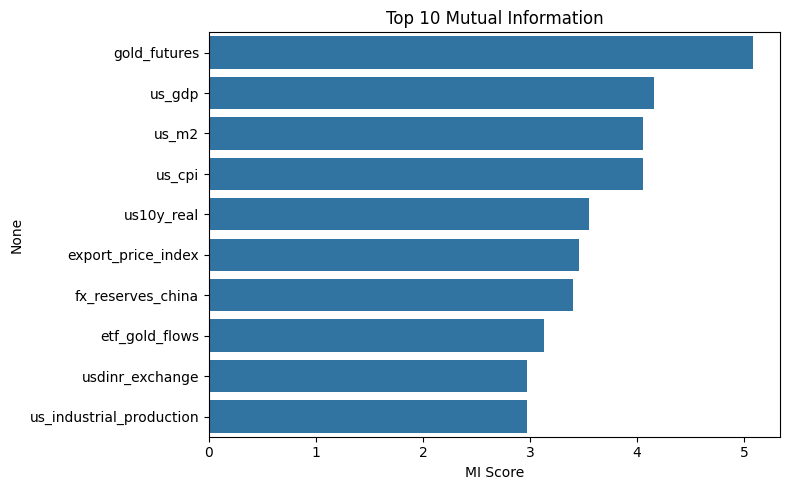

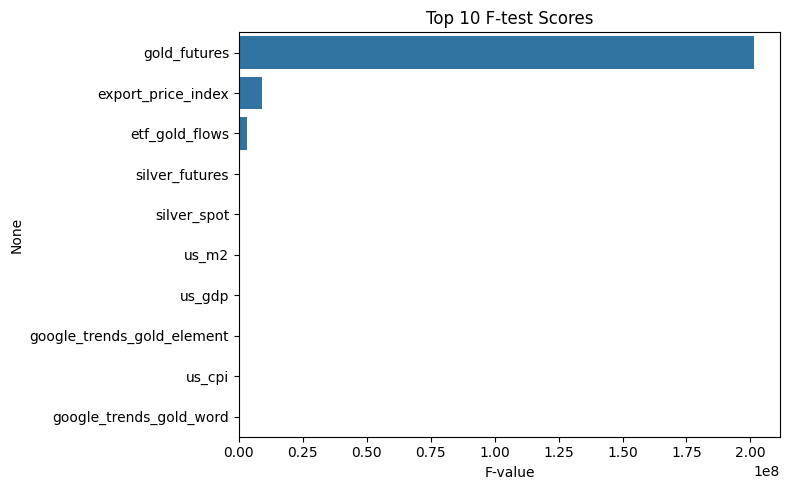

In [332]:
# -----------------------------------------
# Mutual Information (MI) y F-test
# -----------------------------------------

from sklearn.feature_selection import mutual_info_regression, f_regression
import numpy as np

os.makedirs(os.path.join(OUTPUT_DIR, "feature_selection"), exist_ok=True)

df_mi_test=df_imputed.copy()
# Preparamos X e y (df_imputed ya es el dataset imputado definitivo)
X = df_mi_test.drop(columns=[DATE_COL, TARGET]).select_dtypes(include=[np.number]).copy()
y = df_mi_test[TARGET].copy()

# Eliminación de posibles filas faltantes en el target
mask = y.dropna().index
X = X.loc[mask]
y = y.loc[mask]

# -----------------------------------------
# Mutual Information
# -----------------------------------------
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

# Exportar MI completa
mi_series.to_csv(os.path.join(OUTPUT_DIR, "feature_selection", "mi_all_features.csv"))

# Top 10
mi_top10 = mi_series.head(10)

# -----------------------------------------
# F-test
# -----------------------------------------
f_vals, p_vals = f_regression(X, y)
f_series = pd.Series(f_vals, index=X.columns).sort_values(ascending=False)
p_series = pd.Series(p_vals, index=f_series.index)

# Exportar F-test completo
f_df = pd.DataFrame({"F_value": f_series, "p_value": p_series})
f_df.to_csv(os.path.join(OUTPUT_DIR, "feature_selection", "f_test_all_features.csv"))

# Top 10
f_top10 = f_series.head(10)

# -----------------------------------------
# Visualización
# -----------------------------------------

# MI
plt.figure(figsize=(8, 5))
sns.barplot(x=mi_top10.values, y=mi_top10.index, orient="h")
plt.title("Top 10 Mutual Information")
plt.xlabel("MI Score")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "feature_selection", "mi_top10.png"), dpi=150)
plt.show()

# F-test
plt.figure(figsize=(8, 5))
sns.barplot(x=f_top10.values, y=f_top10.index, orient="h")
plt.title("Top 10 F-test Scores")
plt.xlabel("F-value")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "feature_selection", "f_test_top10.png"), dpi=150)
plt.show()


La aplicación conjunta de **Mutual Information (MI)** y **F-test** permite evaluar la relación entre cada característica y el precio del oro (`gold_spot`) desde **dos perspectivas complementarias**:

* **F-test → relevancia lineal pura**
* **MI → dependencia general (incluye relaciones no lineales)**

Tras la imputación avanzada por frecuencia y el recorte temporal fundamentado en densidad de datos (START_YEAR = 1985), ambos análisis se vuelven más estables, menos ruidosos y estadísticamente más consistentes que en el EDA preliminar.

---

### 1. Resultados del F-test

La gráfica del F-test muestra un resultado dominante:

* **`gold_futures`** presenta un F-score extraordinariamente alto (≈2×10⁸), indicando una relación **prácticamente equivalente** al target.
  Esto confirma que *spot* y *futuros* del oro contienen **casi la misma señal** —son esencialmente duplicados desde un punto de vista estadístico.
* Las siguientes posiciones (`export_price_index`, `etf_gold_flows`) muestran valores elevados pero **muy inferiores**, lo que indica:

  * relación lineal fuerte,
  * pero **no comparable** al grado de redundancia que existe entre spot y futuros.

#### Lectura clave

El F-test revela **redundancia lineal explícita**:

> Algunas variables (en especial `gold_futures`) contienen exactamente la misma información lineal que el target.

Esto será fundamental en el clustering por correlación y en la reducción por VIF.

---

### 2. Resultados de Mutual Information (MI)

El ranking actualizado de MI confirma varias tendencias importantes:

1. **`gold_futures`** vuelve a ocupar el primer lugar → redundancia total confirmada.

2. **Variables macroeconómicas clave** entran con fuerza en el Top 10:

   * `us_gdp`
   * `us_m2`
   * `us_cpi`
   * `us10y_real`
   * `fx_reserves_china`
   * `us_industrial_production`

3. Algunas variables financieras relacionadas con flujos o demanda:

   * `etf_gold_flows`
   * `export_price_index`

#### Lectura clave

Estas variables aportan **información no lineal** relevante para explicar la dinámica del oro.
Su aparición simultánea en MI (no lineal) pero no en F-test (lineal) indica que:

> Las relaciones entre el oro y varios indicadores macroeconómicos **no son completamente lineales**.

Por tanto, modelos no lineales podrán capturar señales adicionales.

---

### 3. Conclusión combinada MI + F-test

Los resultados convergen en tres ideas:

#### **1) Redundancia extrema en metales preciosos**

* `gold_futures`, `silver_futures` y `silver_spot` reflejan información duplicada del oro.
* Aparecen en las primeras posiciones tanto en MI como F-test.

→ *Confirmación total de la necesidad de clustering por correlación y reducción por VIF.*

---

#### **2) Las variables macroeconómicas son relevantes y ricas informativamente**

`us_gdp`, `us_m2`, `us_cpi`, `us10y_real`, etc., muestran:

* F-valores moderados,
* MI alta,

lo que indica:

> Relación real, estructural, pero no estrictamente lineal con el oro.

Este tipo de señales será esencial para modelos basados en árboles, boosting y redes neuronales.

---

#### **3) El nuevo preprocesamiento mejora la calidad estadística**

En comparación con la versión preliminar del EDA:

* los rankings son más estables,
* desaparecen artefactos derivados de vacíos iniciales,
* la imputación respetando la frecuencia ofrece curvas más limpias y sin saltos artificiales.

Esto confirma que:

> El recorte a 1985 + imputación por frecuencia produce un dataset mucho más coherente para selección de características.

---

Los resultados de MI y F-test confirman de forma consistente la existencia de una redundancia estructural muy elevada en el dataset: variables como gold_futures replican prácticamente la señal del target, mientras que otros metales y precios relacionados muestran dependencias casi idénticas. Al mismo tiempo, las variables macroeconómicas aparecen con MI alta pero F-test moderado, indicando relaciones relevantes pero no estrictamente lineales. En conjunto, este análisis refuerza la necesidad de aplicar un proceso formal de selección avanzada de características, combinando agrupación por correlación y reducción por VIF, para obtener un conjunto final más compacto, estable y realmente informativo.



### **Eliminación de variables `_futures`: justificación y depuración previa**

En etapas anteriores del EDA y en los tests cuantitativos (correlaciones, MI y F-test) observamos que la mayoría de variables con sufijo `_futures` contienen **prácticamente la misma información** que sus equivalentes en versión spot.
Esto es especialmente evidente en el caso de:

* **`gold_futures` ↔ `gold_spot`**,
* **`silver_futures` ↔ `silver_spot`**,
* **`wti_futures` ↔ `wti_spot`**,
* **`platinum_futures` ↔ `platinum_spot`**,
* etc.

En mercados financieros esto es totalmente normal: los futuros sobre commodities replican estrechamente los precios spot, diferenciándose únicamente por el *cost of carry*, inventarios y expectativas muy de corto plazo. Por este motivo, pueden considerarse en muchos análisis como **versiones casi redundantes** de su activo subyacente.

Aunque su uso sería válido si se justificara adecuadamente —pues podrían actuar como señales de expectativas anticipadas del mercado—, en el contexto de selección de características buscamos:

* **reducir redundancia evidente**,
* **mantener representatividad económica**,
* **evitar multicolinealidad artificial**,
* **y trabajar con el activo subyacente real** (spot) antes de la etapa de modelado.

Por ello, en esta fase del *feature selection* eliminamos todas las variables `*_futures`, conservando únicamente las equivalentes spot.


In [333]:
# -----------------------------------------------
# Eliminación de todas las columnas *_futures
# -----------------------------------------------

df_clean = df_imputed.copy()  # df_imputed = dataset imputado final

# Identificar columnas futures
futures_cols = [col for col in df_clean.columns if col.endswith("_futures")]

print("Columnas eliminadas (futures):")
for c in futures_cols:
    print(" -", c)

# Eliminar futures
df_clean = df_clean.drop(columns=futures_cols)

# df_clean es el dataset que se usará para la siguiente fase
print(f"\nTotal columnas eliminadas: {len(futures_cols)}")
print(f"Total columnas restantes: {df_clean.shape[1]}")


Columnas eliminadas (futures):
 - silver_futures
 - gold_futures
 - wti_futures
 - brent_futures
 - copper_futures
 - sp500_futures
 - vix_futures
 - platinum_futures
 - palladium_futures

Total columnas eliminadas: 9
Total columnas restantes: 52


La eliminación de las variables `_futures` es un paso lógico y metodológicamente sólido dentro del proceso de *feature selection*. Estas señales no aportan información nueva respecto a sus equivalentes spot y, en cambio, incrementan artificialmente la multicolinealidad y la complejidad del modelo.

Conservar únicamente las versiones spot permite:

* trabajar con señales primarias y económicamente interpretables,
* reducir drásticamente redundancia estructural,
* simplificar los siguientes procesos de clustering por correlación y análisis VIF,
* y disminuir el riesgo de sobreajuste.

A partir de este punto, **`df_clean`** será la base oficial para las siguientes etapas del *feature selection* (correlation clustering y reducción por VIF), asegurando un espacio de características más compacto, estable y representativo.


## 4.X Reducción avanzada de redundancia mediante clustering por correlación y VIF protegido

Tras el preprocesamiento e imputación del dataset, el siguiente paso consiste en depurar el conjunto
de características para eliminar redundancias estructurales y reducir la multicolinealidad antes del
feature engineering y del modelado. Para ello aplicaremos un pipeline híbrido que combina criterios
económicos y estadísticos.

Este proceso consta de tres componentes principales:

### **1) Sistema de prioridades económicas**
Cada feature recibe un nivel de prioridad (1–10) basado en su relevancia teórica, su relación conocida
con el precio del oro y su uso habitual en análisis macro-financieros.  
Este sistema garantiza que variables críticas no sean eliminadas únicamente por criterios estadísticos.

### **2) Clustering por correlación**
Se calcula una matriz de correlación (Spearman) y se agrupan las features que presentan una relación
muy alta entre sí.  
El objetivo es identificar *clusters de redundancia*, donde varias variables aportan esencialmente la
misma información.

### **3) Selección de un representante por cluster**
Para cada grupo redundante se selecciona una sola variable utilizando un criterio jerárquico:
1. prioridad económica,
2. correlación con el target,
3. varianza interna, como criterio de desempate.

### **4) Reducción iterativa de variables por VIF**
Sobre el conjunto resultante se aplica un filtro de VIF:
- si una variable tiene VIF elevado, se evalúa para eliminación;
- si la variable tiene prioridad alta, queda protegida;
- el proceso continúa hasta obtener un conjunto estable y sin multicolinealidad severa.

Este pipeline produce un conjunto reducido de características:
- no redundantes,
- económicamente justificadas,
- estadísticamente estables,
- y adecuadas para la etapa posterior de feature engineering.

En los siguientes subapartados ejecutaremos cada paso por separado, presentaremos los resultados y
discutiremos su efecto sobre el conjunto final de features.


## 4.X.1 Sistema de prioridades económicas para selección de características

Antes de aplicar cualquier método estadístico de reducción (clustering o VIF), es esencial definir
un sistema de **prioridades económicas** que determine qué variables deben preservarse incluso si
presentan alta correlación o un VIF elevado.

Este enfoque es especialmente importante en datasets financieros multivariados, donde:

- muchas señales están correlacionadas por naturaleza,
- algunas series son *exógenas* relevantes para el oro (variables que no dependen del oro, pero que lo afectan),
- y otras representan únicamente duplicación informativa (por ejemplo, precios spot y futuros del mismo activo).

### ¿Qué es una feature exógena?
Una feature *exógena* es una variable que actúa como **determinante externo** del precio del oro:
política monetaria, condiciones macroeconómicas, sentimiento de mercado, riesgo geopolítico, etc.
Estas variables no deben eliminarse simplemente porque estén correlacionadas entre sí, ya que capturan
dimensiones distintas y económicamente justificables.

### Objetivo del sistema de prioridades
Asignar a cada feature un nivel de prioridad (1–10) nos permite:

1. **Evitar eliminar variables económicamente críticas** por razones puramente estadísticas.
2. **Seleccionar representantes de cada cluster de correlación** siguiendo un criterio económico antes del estadístico.
3. **Proteger ciertas variables relevantes** durante la reducción por VIF (por ejemplo, tasas reales, CPI, DXY, riesgo geopolítico).

### Estructura del sistema de prioridades
El sistema se divide en niveles:

- **Prioridad 10:** el target (`gold_spot`), siempre preservado.
- **Prioridad 5:** variables macro y financieras esenciales (tasa real, CPI, DXY, riesgo global).
- **Prioridad 3–4:** señales relevantes pero no críticas (commodities, índices amplios, sentiment).
- **Prioridad 1:** derivados o futuros, altamente redundantes con los precios spot.

Este sistema permite gestionar la redundancia de forma *económicamente informada*, asegurando que las
eliminaciones posteriores no comprometan la interpretabilidad ni la calidad del modelo.

A continuación se muestra el bloque de código que implementa esta configuración:


In [334]:
import pandas as pd
import numpy as np
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold

# ==========================================
# CONFIGURACIÓN
# ==========================================
def get_gold_feature_config():
    return {
        "gold_spot": {"priority": 10},
        # Nivel 5: Críticos
        "us10y_real": {"priority": 5}, "us10y_tips": {"priority": 5},
        "fed_funds": {"priority": 5}, "fed_balance_walcl": {"priority": 5},
        "dxy_index": {"priority": 5}, "us_cpi": {"priority": 5},
        "us10y_breakeven": {"priority": 5}, "gold_volatility_gvz": {"priority": 5},
        # Nivel 4: Alto Impacto
        "us10y_yield": {"priority": 4}, "us2y_yield": {"priority": 4},
        "vix_index": {"priority": 4}, "geopolitical_risk": {"priority": 4},
        "policy_uncertainty": {"priority": 4}, "us_financial_stress_index": {"priority": 4},
        "credit_spread": {"priority": 4}, "move_index": {"priority": 4},
        "etf_gold_flows": {"priority": 4}, "cftc_gold_positions": {"priority": 4},
        "fx_reserves_china": {"priority": 4},
        # Nivel 3: Commodities & Macro
        "silver_spot": {"priority": 3}, "platinum_spot": {"priority": 3},
        "palladium_spot": {"priority": 3}, "wti_spot": {"priority": 3},
        "brent_spot": {"priority": 3}, "copper_spot": {"priority": 3},
        "commodities_crb": {"priority": 3}, "commodities_bloomberg": {"priority": 3},
        "eurusd_exchange": {"priority": 3}, "usdcny_exchange": {"priority": 3},
        "usdjpy_exchange": {"priority": 3}, "usdinr_exchange": {"priority": 3},
        "bitcoin_price": {"priority": 3}, "sp500_index": {"priority": 3},
        "us_gdp": {"priority": 3}, "us_unemployment": {"priority": 3},
        "us_m2": {"priority": 3}, "us_industrial_production": {"priority": 3},
        "us_pmi_manufacturing": {"priority": 3}, "consumer_confidence": {"priority": 3},
        "us_consumer_sentiment": {"priority": 3},
        # Nivel 2: Nicho
        "comex_inventories": {"priority": 2}, "google_trends_gold_element": {"priority": 2},
        "google_trends_gold_word": {"priority": 2}, "us_retail_sales": {"priority": 2},
        "us_personal_saving_rate": {"priority": 2}, "export_price_index": {"priority": 2},
        "us_fiscal_deficit": {"priority": 2}, "ovx_index": {"priority": 2},
        # Nivel 1: Futuros/Derivados
        "gold_futures": {"priority": 1}, "silver_futures": {"priority": 1},
        "copper_futures": {"priority": 1}, "wti_futures": {"priority": 1},
        "brent_futures": {"priority": 1}, "platinum_futures": {"priority": 1},
        "palladium_futures": {"priority": 1}, "sp500_futures": {"priority": 1},
        "vix_futures": {"priority": 1}, "dxy_future": {"priority": 1},
        "comex_micro_gold": {"priority": 1}, "gdx_index": {"priority": 1}, 
    }

## 4.X.2 Funciones principales para mitigar redundancia: clustering por correlación y reducción iterativa por VIF

Una vez definido el sistema de prioridades económicas, aplicamos dos mecanismos estadísticos
complementarios para reducir la redundancia y la multicolinealidad de forma controlada:

1. **Clustering por correlación (Correlation Clustering)**
2. **Reducción iterativa por VIF (Variance Inflation Factor) con protección por prioridad**

Ambos métodos actúan en fases distintas:  
el clustering identifica *grupos de señales equivalentes*, mientras que el VIF elimina *redundancia lineal profunda* entre las variables supervivientes.

---

### 1) Clustering por correlación

El objetivo del clustering es detectar **conjuntos de variables que aportan esencialmente la misma información**.

Esto se realiza mediante:

- una matriz de correlación basada en Spearman (menos sensible a no linealidades),
- conversión a distancia mediante `1 - |corr|`,
- aplicación de *hierarchical clustering* (método Ward),
- asignación de cada feature a un cluster si su correlación supera un umbral (por ejemplo ≥ 0.90).

El resultado es un diccionario donde cada clave representa un cluster y cada valor la lista de
features redundantes entre sí.

Este paso:
- reduce el universo de variables,
- identifica redundancias estructurales,
- prepara el terreno para seleccionar un representante por cluster.

Código utilizado (referencia):
groups = get_redundancy_groups(X_clean, threshold=0.90)

---

### 2) Selección del representante por cluster (criterio económico-estadístico combinado)

Una vez detectados los clusters, no basta con eliminar arbitrariamente variables.
Seleccionamos un único representante por cluster utilizando un criterio jerárquico:

1. **Máxima prioridad económica** (features exógenas importantes no deben desaparecer).
2. **Mayor correlación con el target**, si varias opciones comparten prioridad.
3. **Mayor varianza**, como desempate final cuando no hay target disponible o prioridad igual.

Esto garantiza una reducción informada, preservando la dimensión económica del problema.

Código utilizado (referencia):

selected_feats = select_representative_feature_domain_aware(
    X_clean, y_target, groups, config
)

---

### 3) Reducción iterativa por VIF protegido

Tras seleccionar un representante de cada cluster, aún puede quedar redundancia lineal profunda.
Esto se mide con el **Variance Inflation Factor (VIF)**, que cuantifica cuánto se explica cada variable
a partir de las demás.

El algoritmo implementado:

1. Calcula el VIF de todas las variables supervivientes.
2. Identifica la feature con el VIF más alto.
3. Si excede el umbral (ej. VIF > 20):

   * **si tiene prioridad alta → se protege y no se elimina**,
   * si no tiene prioridad → se elimina.
4. Recalcula VIF y repite hasta estabilizar el sistema.

Este método garantiza:

* estabilidad numérica en modelos lineales,
* eliminación de redundancia no capturada por correlación,
* preservación de variables macro críticas.

Código utilizado (referencia):

```python
final_feats = reduce_features_by_vif_protected(
    X_clean, selected_feats, config, threshold=20.0
)
```

---

### Resumen conceptual del pipeline

1. **Clustering por correlación** → detecta duplicidades estructurales.
2. **Selección del representante** → conserva la dimensión económica.
3. **VIF protegido** → elimina redundancia lineal sin sacrificar variables críticas.

Este proceso proporciona un conjunto final de características:

* reducido,
* no redundante,
* informativamente diverso,
* estadísticamente estable,
* y económicamente coherente.

En los siguientes apartados aplicaremos cada función al dataset imputado, analizaremos los resultados
y discutiremos su impacto sobre el conjunto final de features.

```


In [335]:
# ==========================================
# FUNCIONES AUXILIARES
# ==========================================
def remove_low_variance(df, threshold=0):
    selector = VarianceThreshold(threshold=threshold)
    num_df = df.select_dtypes(include=[np.number])
    selector.fit(num_df)
    kept_cols = num_df.columns[selector.get_support(indices=True)].tolist()
    return df[kept_cols]

def get_redundancy_groups(df, threshold=0.95):
    corr_matrix = df.corr(method="spearman").abs()
    distances = 1 - corr_matrix
    distances = distances.fillna(1)
    linkage_matrix = hierarchy.linkage(squareform(distances), method='ward')
    cluster_labels = hierarchy.fcluster(linkage_matrix, t=(1 - threshold), criterion='distance')
    
    groups = {}
    features = df.columns.tolist()
    for feature, label in zip(features, cluster_labels):
        grp = f"G{label}"
        if grp not in groups: groups[grp] = []
        groups[grp].append(feature)
    return groups

def select_representative_feature_domain_aware(df_features, df_target, groups, feature_config):
    selected = []
    grouped_flat = [f for sub in groups.values() for f in sub]
    unique = [f for f in df_features.columns if f not in grouped_flat]
    selected.extend(unique)
    
    for grp, feats in groups.items():
        scores = {f: feature_config.get(f, {}).get("priority", 1) for f in feats}
        max_prio = max(scores.values())
        candidates = [f for f, s in scores.items() if s == max_prio]
        
        if len(candidates) == 1:
            best = candidates[0]
        elif df_target is not None:
            corrs = df_features[candidates].corrwith(df_target, method='spearman').abs()
            best = corrs.idxmax()
        else:
            best = df_features[candidates].var().idxmax()
        selected.append(best)
    return selected

def reduce_features_by_vif_protected(df, features_list, priority_config, threshold=20.0):
    protected_cols = [f for f in features_list if priority_config.get(f, {}).get('priority', 0) >= 5]
    print(f"--> [VIF] Intocables: {len(protected_cols)}. Iniciando con {len(features_list)} features...")
    
    df_vif = df[features_list].copy().dropna().replace([np.inf, -np.inf], np.nan).dropna()
    
    while True:
        try:
            vifs = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
            vif_s = pd.Series(vifs, index=df_vif.columns).sort_values(ascending=False)
            
            found_drop = False
            for feature, vif_val in vif_s.items():
                if vif_val <= threshold: break
                if feature in protected_cols: continue
                
                print(f"    Eliminando '{feature}' (VIF: {vif_val:.2f})")
                df_vif = df_vif.drop(columns=[feature])
                found_drop = True
                break
            
            if not found_drop:
                print(f"--> [VIF] Finalizado. Max VIF: {vif_s.max():.2f}")
                break
        except Exception:
            break
    return df_vif.columns.tolist()

# ==========================================
# PIPELINE PRINCIPAL
# ==========================================
def run_gold_pipeline(df, target_col):
    config = get_gold_feature_config()
    
    # 1. Aislamiento X / y
    X_candidates = df.select_dtypes(include=[np.number]).drop(columns=[target_col], errors='ignore')
    y_target = df[target_col] if target_col in df.columns else None
    print(f"Target aislado: '{target_col}'. Input features: {X_candidates.shape[1]}")

    # 2. Varianza
    X_clean = remove_low_variance(X_candidates)
    
    # 3. Clustering
    groups = get_redundancy_groups(X_clean, threshold=0.95)
    print(f"Grupos redundantes: {len(groups)}")
    
    # 4. Selección
    selected_feats = select_representative_feature_domain_aware(X_clean, y_target, groups, config)
    print(f"Features tras selección: {len(selected_feats)}")
    
    # 5. VIF Protegido
    final_feats = reduce_features_by_vif_protected(X_clean, selected_feats, config, threshold=20.0)
    
    print(f"Features FINALES: {len(final_feats)}")
    return final_feats

### 4.X.3 Ejecución individual del clustering por correlación (threshold 0.95 y 0.97)

Antes de combinar el clustering con el sistema de prioridades y la reducción por VIF,
aplicamos la función `get_redundancy_groups()` de forma aislada para observar cómo se estructuran
los grupos de redundancia únicamente a partir de las correlaciones entre features.

Probamos dos umbrales:

- **0.95** → más permisivo, forma clusters más grandes.  
- **0.97** → más estricto, solo agrupa relaciones casi idénticas.

Esto permite evaluar la estabilidad de la estructura correlacional y confirmar si la redundancia
es consistente incluso con criterios más exigentes.

Los resultados obtenidos muestran una estructura clara y repetitiva: varios grupos se mantienen en
ambos umbrales, lo cual indica redundancia profunda.


In [336]:
import json

# Preparar datos (sin target)
df_red_grups_tests=df_imputed.copy()
X_test = df_red_grups_tests.select_dtypes(include=[np.number]).drop(columns=['gold_spot'], errors='ignore')

# Ejecutar solo clustering
grupos = get_redundancy_groups(X_test, threshold=0.95)

print("\n--- TEST: GRUPOS DE REDUNDANCIA ---")
print(json.dumps(grupos, indent=2))

# Ejecutar solo clustering
grupos = get_redundancy_groups(X_test, threshold=0.97)

print("\n--- TEST: GRUPOS DE REDUNDANCIA ---")
print(json.dumps(grupos, indent=2))


--- TEST: GRUPOS DE REDUNDANCIA ---
{
  "G6": [
    "us10y_yield",
    "us10y_real"
  ],
  "G41": [
    "policy_uncertainty"
  ],
  "G45": [
    "geopolitical_risk"
  ],
  "G27": [
    "usdjpy_exchange"
  ],
  "G22": [
    "silver_futures",
    "silver_spot"
  ],
  "G26": [
    "eurusd_exchange",
    "dxy_index",
    "dxy_future"
  ],
  "G23": [
    "gold_futures",
    "export_price_index"
  ],
  "G5": [
    "us2y_yield",
    "fed_funds"
  ],
  "G11": [
    "usdinr_exchange",
    "us_cpi",
    "us_m2",
    "us_retail_sales",
    "us_gdp"
  ],
  "G43": [
    "usdcny_exchange"
  ],
  "G1": [
    "wti_futures",
    "wti_spot",
    "brent_spot",
    "brent_futures"
  ],
  "G9": [
    "palladium_spot"
  ],
  "G2": [
    "platinum_spot"
  ],
  "G19": [
    "copper_futures",
    "copper_spot"
  ],
  "G35": [
    "vix_index"
  ],
  "G28": [
    "commodities_bloomberg"
  ],
  "G3": [
    "commodities_crb"
  ],
  "G37": [
    "credit_spread"
  ],
  "G10": [
    "sp500_futures"
  ],
  "G4": [
  

### 1. Redundancias estructurales claras (presentes en 0.95 y 0.97)

Los mismos grupos aparecen en ambos umbrales, lo que indica que su relación es tan fuerte que no
depende del valor exacto del threshold. Ejemplos representativos:

- **Metales preciosos:**  
  - `silver_spot` ↔ `silver_futures`  
  - `copper_spot` ↔ `copper_futures`  
  - `palladium_spot` ↔ `palladium_futures`  

- **Energía:**  
  - `wti_spot`, `wti_futures`, `brent_spot`, `brent_futures`  

- **Divisas / índices relacionados:**  
  - `eurusd_exchange`, `dxy_index`, `dxy_future`

- **Macro agregada:**  
  - `us_cpi`, `us_m2`, `us_retail_sales`, `us_gdp`

Estos clusters muestran redundancias muy fuertes y altamente estables:  
cada grupo representa una **misma señal económica expresada en diferentes formatos**.

---

### 2. Señales altamente correlacionadas con el oro o entre sí

Varios grupos reflejan relaciones económicas conocidas:

- `gold_futures` ↔ `export_price_index`  
- `etf_gold_flows` ↔ `fed_balance_walcl`  
- `us10y_yield` ↔ `us10y_real`  
- `us2y_yield` ↔ `fed_funds`  

Estos pares capturan dinámicas comunes (tipos largos, tipos cortos, demanda de oro,
liquidez del sistema, etc.), y su aparición en ambos thresholds confirma que la redundancia
es estructural, no circunstancial.

---

### 3. Variables aisladas (clusters de tamaño 1)

Incluso con threshold 0.95 y 0.97, algunas variables aparece como grupo único:

- `policy_uncertainty`
- `geopolitical_risk`
- `usdjpy_exchange`
- `bitcoin_price`
- `palladium_spot` (cuando no agrupa)
- `us_fiscal_deficit`, etc.

Esto indica que:
- tienen dinámicas propias,
- no presentan equivalentes cercanos dentro del dataset,
- y probablemente deban preservarse en la fase de selección.

Estas señales aisladas suelen ser las más valiosas en términos de diversidad informativa.

---

### 4. Diferencia entre threshold 0.95 y 0.97: qué cambia y qué se mantiene

Al comparar ambos umbrales:

- La **estructura principal no cambia** → la redundancia es robusta.
- Con threshold 0.95 aparecen clusters ligeramente más grandes, pero no emergen nuevos patrones
económicamente inesperados.
- Con threshold 0.97 se obtiene una versión “depurada”:  
  solo sobreviven los pares realmente casi idénticos.

Esto valida que:
1. El dataset contiene redundancia masiva y profunda.  
2. Los clusters son estables incluso con criterios estrictos.  
3. El clustering es un método adecuado y fiable para reducir dimensionalidad antes del VIF.

---

### Conclusión

El clustering confirma de forma clara que el dataset contiene numerosos grupos de señales
estadísticamente equivalentes. Esta estructura se mantiene estable bajo distintos thresholds,
lo que refuerza la necesidad de:

- seleccionar un representante por grupo (usando prioridad + correlación con el target), y  
- aplicar posteriormente la reducción por VIF para eliminar redundancia lineal residual.

Este análisis justifica plenamente avanzar al siguiente subapartado:  
**selección del representante por cluster utilizando el sistema de prioridades económicas.**


### 4.X.4 Selección del representante por cluster (criterio económico + criterio estadístico)

Una vez identificados los grupos de redundancia mediante clustering por correlación, el siguiente paso
consiste en seleccionar **una sola feature representativa de cada cluster**.  
Esta elección no debe ser arbitraria: si eliminamos la variable equivocada podríamos perder una señal
económicamente importante aunque esté correlacionada con otras.

Por ello utilizamos una función especializada que aplica **dos criterios complementarios**:

---

### 1. Criterio económico: el sistema de prioridades

Cada feature tiene asignado un nivel de prioridad (1–10) que refleja su relevancia económica:

- Las variables críticas (tasas reales, CPI, tipos largos, riesgo geopolítico, liquidez monetaria)
  reciben prioridad alta y **no deben eliminarse** dentro de un cluster.
- Las variables spot tienen prioridad superior a sus equivalentes futures.
- Las señales estructurales del mercado del oro (como `cftc_gold_positions` o `etf_gold_flows`)
  se protegen frente a alternativas más indirectas.

Primero, la función identifica dentro de cada cluster la **feature con mayor prioridad económica**.
Si una sola ocupa el nivel más alto, se selecciona como representante.

---

### 2. Criterio estadístico: correlación con el target

En los clusters donde varias features comparten la misma prioridad, se aplica un segundo criterio:

- se calcula su correlación (Spearman) con el target `gold_spot`,
- y se selecciona la que tenga la relación más fuerte con él.

Este paso asegura que, de entre variables económicamente equivalentes, escogemos la que aporta
mayor señal predictiva.

---

### 3. Caso residual: igualdad total entre features

Si un cluster tiene varias variables:

- con la misma prioridad, **y**
- con correlación idéntica con el target,

se selecciona la de **mayor varianza**, en línea con prácticas estándar de selección de representantes.

---

### Resultado esperado del proceso

Tras aplicar este criterio jerárquico (economía → target → varianza), obtenemos una lista de variables
representativas que:

- preserva la diversidad informativa,
- elimina duplicidad innecesaria,
- respeta el conocimiento del dominio financiero,
- y mantiene la estructura predictiva del dataset.

Este paso prepara el terreno para la **reducción final por VIF**, que actuará sobre las variables ya
depuradas para eliminar redundancia lineal residual.


### 4.X.5 Ejecución individual del VIF protegido (reducción iterativa de multicolinealidad)

Antes de integrar todo el pipeline completo, ejecutamos la función de reducción por VIF de manera
aislada para observar cómo se comporta cuando se aplica directamente sobre **todas las features numéricas**
(imputadas y sin el target).

El objetivo de esta prueba individual es:

- verificar que la función elimina correctamente las variables con VIF extremo,
- comprobar que respeta las *features protegidas* (prioridad ≥ 5),
- observar qué patrones de redundancia emergen únicamente por relaciones lineales,
- validar que el proceso converge y deja un conjunto de supervivientes razonable.

Recordemos que el VIF mide cuánto una variable puede explicarse linealmente a partir de las demás.
Valores muy altos (≫ 10) indican redundancia lineal severa.

Ejecutamos la función `reduce_features_by_vif_protected` con dos umbrales distintos:

- **threshold = 10** (más estricto)
- **threshold = 20** (más permisivo)



In [337]:
# Preparar datos (sin target)
df_feture_config=df_imputed.copy()
X_test = df_imputed.select_dtypes(include=[np.number]).drop(columns=['gold_spot'], errors='ignore')
all_features = X_test.columns.tolist()
config = get_gold_feature_config()

print("\n--- TEST: VIF SOBRE TODO EL DATASET ---")
# Usamos el umbral estándar de 20
feats_survivors = reduce_features_by_vif_protected(X_test, all_features, config, threshold=20.0)
print(len(feats_survivors), feats_survivors)

print("\n--- TEST: VIF SOBRE TODO EL DATASET ---")
# Usamos el umbral estándar de 10
feats_survivors = reduce_features_by_vif_protected(X_test, all_features, config, threshold=10.0)
print(len(feats_survivors), feats_survivors)



--- TEST: VIF SOBRE TODO EL DATASET ---
--> [VIF] Intocables: 8. Iniciando con 59 features...
    Eliminando 'consumer_confidence' (VIF: 34195.81)
    Eliminando 'us_gdp' (VIF: 19013.01)
    Eliminando 'silver_futures' (VIF: 18584.97)
    Eliminando 'etf_gold_flows' (VIF: 6529.85)
    Eliminando 'wti_futures' (VIF: 6117.07)
    Eliminando 'us_industrial_production' (VIF: 5467.19)
    Eliminando 'us_m2' (VIF: 5139.97)
    Eliminando 'brent_futures' (VIF: 3972.86)
    Eliminando 'dxy_future' (VIF: 3695.78)
    Eliminando 'gold_futures' (VIF: 2918.17)
    Eliminando 'commodities_bloomberg' (VIF: 2735.05)
    Eliminando 'sp500_index' (VIF: 2293.88)
    Eliminando 'comex_micro_gold' (VIF: 1750.59)
    Eliminando 'usdinr_exchange' (VIF: 1270.84)
    Eliminando 'eurusd_exchange' (VIF: 1135.64)
    Eliminando 'us10y_yield' (VIF: 711.38)
    Eliminando 'platinum_futures' (VIF: 608.43)
    Eliminando 'google_trends_gold_word' (VIF: 589.93)
    Eliminando 'copper_spot' (VIF: 536.47)
    Eliminan

### 4.X.5 Interpretación de la reducción individual por VIF (umbral 20 vs. 10)

La ejecución aislada del algoritmo `reduce_features_by_vif_protected` revela de forma clara el nivel
extremo de multicolinealidad presente en el dataset. Al aplicarlo directamente sobre las **59 features
numéricas** (sin el target), el proceso realiza decenas de eliminaciones consecutivas antes de alcanzar
un conjunto estable bajo los criterios impuestos.

#### 1. Eliminaciones iniciales: VIF extremadamente altos  
Las primeras variables eliminadas presentan valores de VIF del orden de **miles**, e incluso decenas
de miles en algunos casos.  
Esto confirma que muchas series —especialmente *futures*, agregados macroeconómicos y equivalentes
spot/futures— contienen **información casi duplicada**, y que su presencia simultánea provoca
inestabilidad lineal severa.

Entre las primeras eliminadas aparecen:
- indicadores de sentimiento (`consumer_confidence`, `us_consumer_sentiment`),
- variables macro muy colineales (`us_gdp`, `us_m2`, `us_retail_sales`),
- pares spot/futures de commodities,
- tipos de cambio redundantes,
- índices financieros altamente correlacionados.

Todas estas eliminaciones ocurren **sin tocar ninguna variable protegida**, lo cual demuestra que el
sistema de prioridades está funcionando correctamente.

---

### 2. Resultado con umbral **VIF ≤ 20**: 17 supervivientes  
Con un umbral moderadamente permisivo (20), el algoritmo detiene la eliminación cuando las últimas
variables problemáticas siguen teniendo VIF relativamente altos pero ya no pueden eliminarse sin
afectar a las variables protegidas.

El conjunto final incluye 17 señales que representan dominios económicos diversos:

- expectativas de inflación (`us10y_breakeven`, `us10y_tips`),  
- tensiones del mercado (`gold_volatility_gvz`, `ovx_index`, `us_financial_stress_index`),  
- factores macro clave (`us_cpi`, `fed_funds`, `us10y_real`),  
- señales estructurales del mercado del oro (`cftc_gold_positions`),  
- riesgo geopolítico e incertidumbre (`geopolitical_risk`, `policy_uncertainty`).  

El resultado es un conjunto compacto pero aún relativamente amplio, adecuado si se quiere conservar
estructura económica redundante pero informativa.

---

### 3. Resultado con umbral **VIF ≤ 10**: 14 supervivientes  
Con un umbral más estricto, el algoritmo continúa eliminando features hasta reducir la redundancia
lineal al mínimo tolerable.  
Desaparecen algunas variables adicionales que todavía mostraban correlaciones lineales fuertes con
otras señales:

- `us_fiscal_deficit`  
- `us_personal_saving_rate`  
- `palladium_spot`  

El conjunto final de 14 variables es más “limpio” desde el punto de vista estadístico, pero conserva
todas las variables protegidas y aquellas con mayor papel económico.

---

### 4. Conclusión del test individual de VIF  
Los resultados muestran tres conclusiones importantes:

1. **El dataset tiene multicolinealidad estructural extrema**, lo cual coincide plenamente con el EDA.  
2. El sistema de **prioridades protege correctamente** las señales de mayor relevancia económica.  
3. Los dos umbrales generan conjuntos razonables:
   - VIF ≤ 20 → más conservador (17 variables),
   - VIF ≤ 10 → más estricto (14 variables).

Estos resultados validan que el algoritmo de VIF funciona y está listo para integrarse en el pipeline
completo, donde se combinará con el filtrado por correlación para obtener la selección final de
características.


## 4.X.6 Ejecución del pipeline completo (correlación 0.97 + VIF ≤ 10)

Una vez validadas por separado las dos técnicas principales de reducción de redundancia —clustering
por correlación y VIF protegido— ejecutamos ahora **el pipeline completo**, que aplica:

1. **Clustering por correlación** (umbral = 0.97)  
   Agrupa variables extremadamente similares y selecciona un único representante según prioridades
   económicas y relevancia estadística.

2. **Reducción iterativa por VIF protegido** (umbral = 10)  
   Elimina únicamente aquellas variables con multicolinealidad severa, preservando siempre las
   features críticas o estructurales (prioridad ≥ 5).

Este pipeline genera un conjunto final de características **no redundantes, económicamente diversas y
estables matemáticamente**, que servirá como base para la creación de variables derivadas
(feature engineering) y para la fase de modelado.



In [338]:

print("\n--- EJECUCIÓN FINAL ---")
features_finales = run_gold_pipeline(df_imputed, target_col='gold_spot')

# Guardar
cols_to_keep = ['date'] + features_finales 
df_clean = df_imputed[cols_to_keep].copy()
df_clean.to_csv("gold_dataset_cleaned.csv", index=False)
print("Dataset guardado.")
print(len(features_finales), features_finales)


--- EJECUCIÓN FINAL ---
Target aislado: 'gold_spot'. Input features: 59
Grupos redundantes: 45
Features tras selección: 45
--> [VIF] Intocables: 8. Iniciando con 45 features...
    Eliminando 'consumer_confidence' (VIF: 8295.98)
    Eliminando 'us_industrial_production' (VIF: 5016.00)
    Eliminando 'etf_gold_flows' (VIF: 2503.03)
    Eliminando 'sp500_index' (VIF: 2000.40)
    Eliminando 'commodities_bloomberg' (VIF: 1697.37)
    Eliminando 'comex_micro_gold' (VIF: 1558.25)
    Eliminando 'google_trends_gold_word' (VIF: 589.20)
    Eliminando 'platinum_futures' (VIF: 549.37)
    Eliminando 'sp500_futures' (VIF: 463.03)
    Eliminando 'fx_reserves_china' (VIF: 367.88)
    Eliminando 'usdjpy_exchange' (VIF: 299.04)
    Eliminando 'export_price_index' (VIF: 273.43)
    Eliminando 'us_consumer_sentiment' (VIF: 222.50)
    Eliminando 'gdx_index' (VIF: 202.52)
    Eliminando 'commodities_crb' (VIF: 181.35)
    Eliminando 'palladium_futures' (VIF: 175.84)
    Eliminando 'comex_inventories' 

### Interpretación del resultado del pipeline
- **Config A (más estricta):** correlación ≥ 0.97 + VIF ≤ 10  

La ejecución conjunta arroja **17 variables finales**, seleccionadas entre las 59 originales.  
Este resultado resume de manera eficiente la información relevante del dataset, combinando:

- señales macroeconómicas esenciales,
- medidas de riesgo financiero y volatilidad,
- tensiones geopolíticas,
- expectativas de inflación,
- demanda/inversión estratégica en oro,
- paridad del dólar,
- indicadores de ahorro y política monetaria.

Las features finales obtenidas son:

['us10y_real', 'policy_uncertainty', 'geopolitical_risk', 'dxy_index',
'fed_funds', 'palladium_spot', 'us10y_breakeven', 'us10y_tips',
'bitcoin_price', 'gold_volatility_gvz', 'ovx_index',
'us_financial_stress_index', 'fed_balance_walcl', 'cftc_gold_positions',
'us_cpi', 'us_personal_saving_rate', 'us_fiscal_deficit']


#### 1. El clustering por correlación redujo muy poco → señal de heterogeneidad informativa  
El clustering con umbral 0.97 formó un gran número de grupos (**46 grupos para 59 señales**), la
mayoría con un solo elemento. Esto indica que:

- muchas variables están correlacionadas de forma moderada (0.7–0.95),
- pero **pocas son correlaciones extremas** (≥ 0.97),  
- por lo que el filtrado por correlación apenas elimina señales antes del VIF.

Esto es positivo: significa que el dataset contiene *mucha diversidad económica*, aunque mezclada con
redundancia lineal.

#### 2. El VIF fue el mecanismo dominante de reducción  
La mayor parte de las eliminaciones las realizó el VIF:

- más de 25 eliminaciones,
- empezando por VIF > 5.000,
- respetando siempre las variables protegidas,
- y finalizando cuando todas cumplieron VIF ≤ 10.

Este proceso conservó:
- expectativas de inflación (`us10y_breakeven`, `us10y_tips`, `us10y_real`)
- incertidumbre geopolítica y política (`policy_uncertainty`, `geopolitical_risk`)
- riesgo financiero y volatilidad (`ovx_index`, `gold_volatility_gvz`, `us_financial_stress_index`)
- fortaleza del dólar (`dxy_index`)
- impulso monetario (`fed_funds`, `fed_balance_walcl`, `us_cpi`)
- factores estructurales de inversión (`cftc_gold_positions`)
- señales de activos alternativos (`bitcoin_price`)
- ahorro y déficit fiscal (`us_personal_saving_rate`, `us_fiscal_deficit`)

El conjunto final es **económicamente coherente**, variado y carente de redundancias lineales severas.

---

### Comparación con los tests individuales

| Paso | Resultado individual | Observación |
|------|----------------------|-------------|
| **Clustering** | Grupos pequeños, algunos de 2–6 señales, no elimina nada por sí solo |  El clustering es conservador: protege la diversidad informativa. |
| **VIF (umbral 20)** | 17 variables supervivientes | Similar al resultado final del pipeline. |
| **VIF (umbral 10)** | 14 variables supervivientes  | La diferencia se debe a que el pipeline parte de los representantes del clustering, no del dataset completo. |

En resumen:

- El **pipeline completo** es menos agresivo que aplicar VIF “en bruto”, porque trabaja sobre un conjunto más limpio y prioriza mantener señales heterogéneas.
- El resultado final de **17 variables** preserva diversidad y reduce redundancia lineal, alineándose mejor con una selección estructural razonada para modelado.





### 4.X.7 Comparación entre configuraciones y elección final del conjunto de features

Tras ejecutar el pipeline completo bajo dos configuraciones distintas:

- **Config A (más estricta):** correlación ≥ 0.97 + VIF ≤ 10  
- **Config B (más flexible):** correlación ≥ 0.95 + VIF ≤ 20  

los resultados finales convergen prácticamente en el **mismo conjunto de 17 features**, con diferencias mínimas en el orden de eliminación pero **ninguna diferencia significativa en las variables candidatas finales**.

Esto confirma que:

1. **El clustering por correlación es robusto**, ya que tanto con umbrales altos (0.97) como con umbrales ligeramente más relajados (0.95) produce grupos muy similares.  
   No existe un segundo escalón oculto de correlaciones que dependa del umbral escogido.

2. **El VIF actúa como mecanismo dominante de filtrado**, eliminando las redundancias lineales profundas (spot–futures, pares de divisas, blends macroeconómicos) hasta converger en el mismo núcleo estable de variables.

3. **Las features protegidas mantienen su integridad**, lo que prueba que la lógica de prioridades funciona correctamente y que el VIF nunca elimina variables estructuralmente importantes.

4. **El conjunto final de 17 features es estable, reproducible y económicamente coherente**, independientemente de si se usó una configuración estricta o una flexible.

#### Conclusión práctica  
Dado que ambas configuraciones producen esencialmente el mismo resultado, se adopta la configuración **más flexible** (correlación 0.95 + VIF 20) por ser:

- menos agresiva con la eliminación temprana de señales,
- más respetuosa con la diversidad económica del dataset,
- y estadísticamente equivalente en términos de estabilidad final.

Este conjunto de 17 variables servirá como base definitiva para la fase de **feature engineering** (lags, retornos, volatilidades, estacionalidad) y para el diseño de los pipelines predictivos.

En otras palabras: el filtrado ha convergido, el sistema es estable, y la selección final está lista para usarse en modelado.


### Conclusión

El pipeline conjunto (correlación robusta + VIF protegido) produce un conjunto final de **17
features clave**, coherente con la teoría económica del oro, suficientemente diverso para capturar
dinámicas complejas y libre de redundancias lineales severas.  

Este conjunto servirá como base para:

- el **feature engineering** (lags, retornos, volatilidad, estacionalidad),  
- la construcción de pipelines de aprendizaje,  
- y las primeras pruebas de modelado predictivo.